# Importing Libraries

In [1]:
# basic pandas dataframe & numpy array handeling library
import pandas as pd
import numpy as np

# data visualization library
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pe

# setting figure style & parameters
sns.set_theme(style='darkgrid',palette='inferno')
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['figure.dpi'] = 350

# ignoring display of warnings 
import warnings
warnings.filterwarnings('ignore')

# class for standardization
from sklearn.preprocessing import StandardScaler

# function for train test split & grid search algorith
from sklearn.model_selection import train_test_split, GridSearchCV

# label encoder class
from sklearn.preprocessing import LabelEncoder

# Imporitng class of Linear, Lasso, Ridge regression Models
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

# Random forest regression model class
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics for regression models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Loading Dataset**

In [2]:
# importing the csv file into a pandas dataframe

df = pd.read_csv('dynamic_pricing.csv')

## DATA DICTIONARY

- Number_of_Riders : The total number of riders for a particular ride.
- Number_of_Drivers	:  The total number of drivers available for a particular ride.
- Location_Category	: The category of the location where the ride is initiated (Rural, Semiurban, urban)
- Customer_Loyalty_Status :The loyalty status of the customer (e.g.Regular , Silver, Gold).
- Number_of_Past_Rides : he number of rides the customer has taken in the past.
- Average_Ratings : The average rating given by customers for previous rides.
- Time_of_Booking : The time of day when the ride is booked (e.g., Morning, Afternoon, Evening, Night).
- Vehicle_Type : The type of vehicle used for the ride (e.g., Premium, Economy).
- Expected_Ride_Duration : The expected duration of the ride in minutes.
- Historical_Cost_of_Ride : The historical cost of the ride based on previous rides.

# Exploratory Data Analysis

**Data Exploration**

In [3]:
# getting first 3 rows of a dataset

df.head(3)

Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76   

   Historical_Cost_of_Ride  
0               284.257273  
1               173.874753  
2               329.795469

In [4]:
#checking information about dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [5]:
# checking for number of rows(1000) & columns(10)

df.shape

(1000, 10)

**checking for null values**

In [6]:
# checking for null values for each variable
df.isna().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

**checking for duplicate values**

In [7]:
# checking for duplicate values

df.duplicated().sum()

0

**getting statisticsl information about data**

In [8]:
# getting statistical information about all the numeric datatype

df.describe().T

count        mean         std        min  \
Number_of_Riders         1000.0   60.372000   23.701506  20.000000   
Number_of_Drivers        1000.0   27.076000   19.068346   5.000000   
Number_of_Past_Rides     1000.0   50.031000   29.313774   0.000000   
Average_Ratings          1000.0    4.257220    0.435781   3.500000   
Expected_Ride_Duration   1000.0   99.588000   49.165450  10.000000   
Historical_Cost_of_Ride  1000.0  372.502623  187.158756  25.993449   

                                25%         50%         75%         max  
Number_of_Riders          40.000000   60.000000   81.000000  100.000000  
Number_of_Drivers         11.000000   22.000000   38.000000   89.000000  
Number_of_Past_Rides      25.000000   51.000000   75.000000  100.000000  
Average_Ratings            3.870000    4.270000    4.632500    5.000000  
Expected_Ride_Duration    59.750000  102.000000  143.000000  180.000000  
Historical_Cost_of_Ride  221.365202  362.019426  510.497504  836.116419

In [9]:
# getting statistical information about all the object datatype

df.describe(include=object).T

count unique      top freq
Location_Category        1000      3    Urban  346
Customer_Loyalty_Status  1000      3   Silver  367
Time_of_Booking          1000      4    Night  276
Vehicle_Type             1000      2  Premium  522

#### exploring each categorical varibale individually

**categorical data distribution**

In [10]:
df['Location_Category'].value_counts()

Urban       346
Rural       332
Suburban    322
Name: Location_Category, dtype: int64

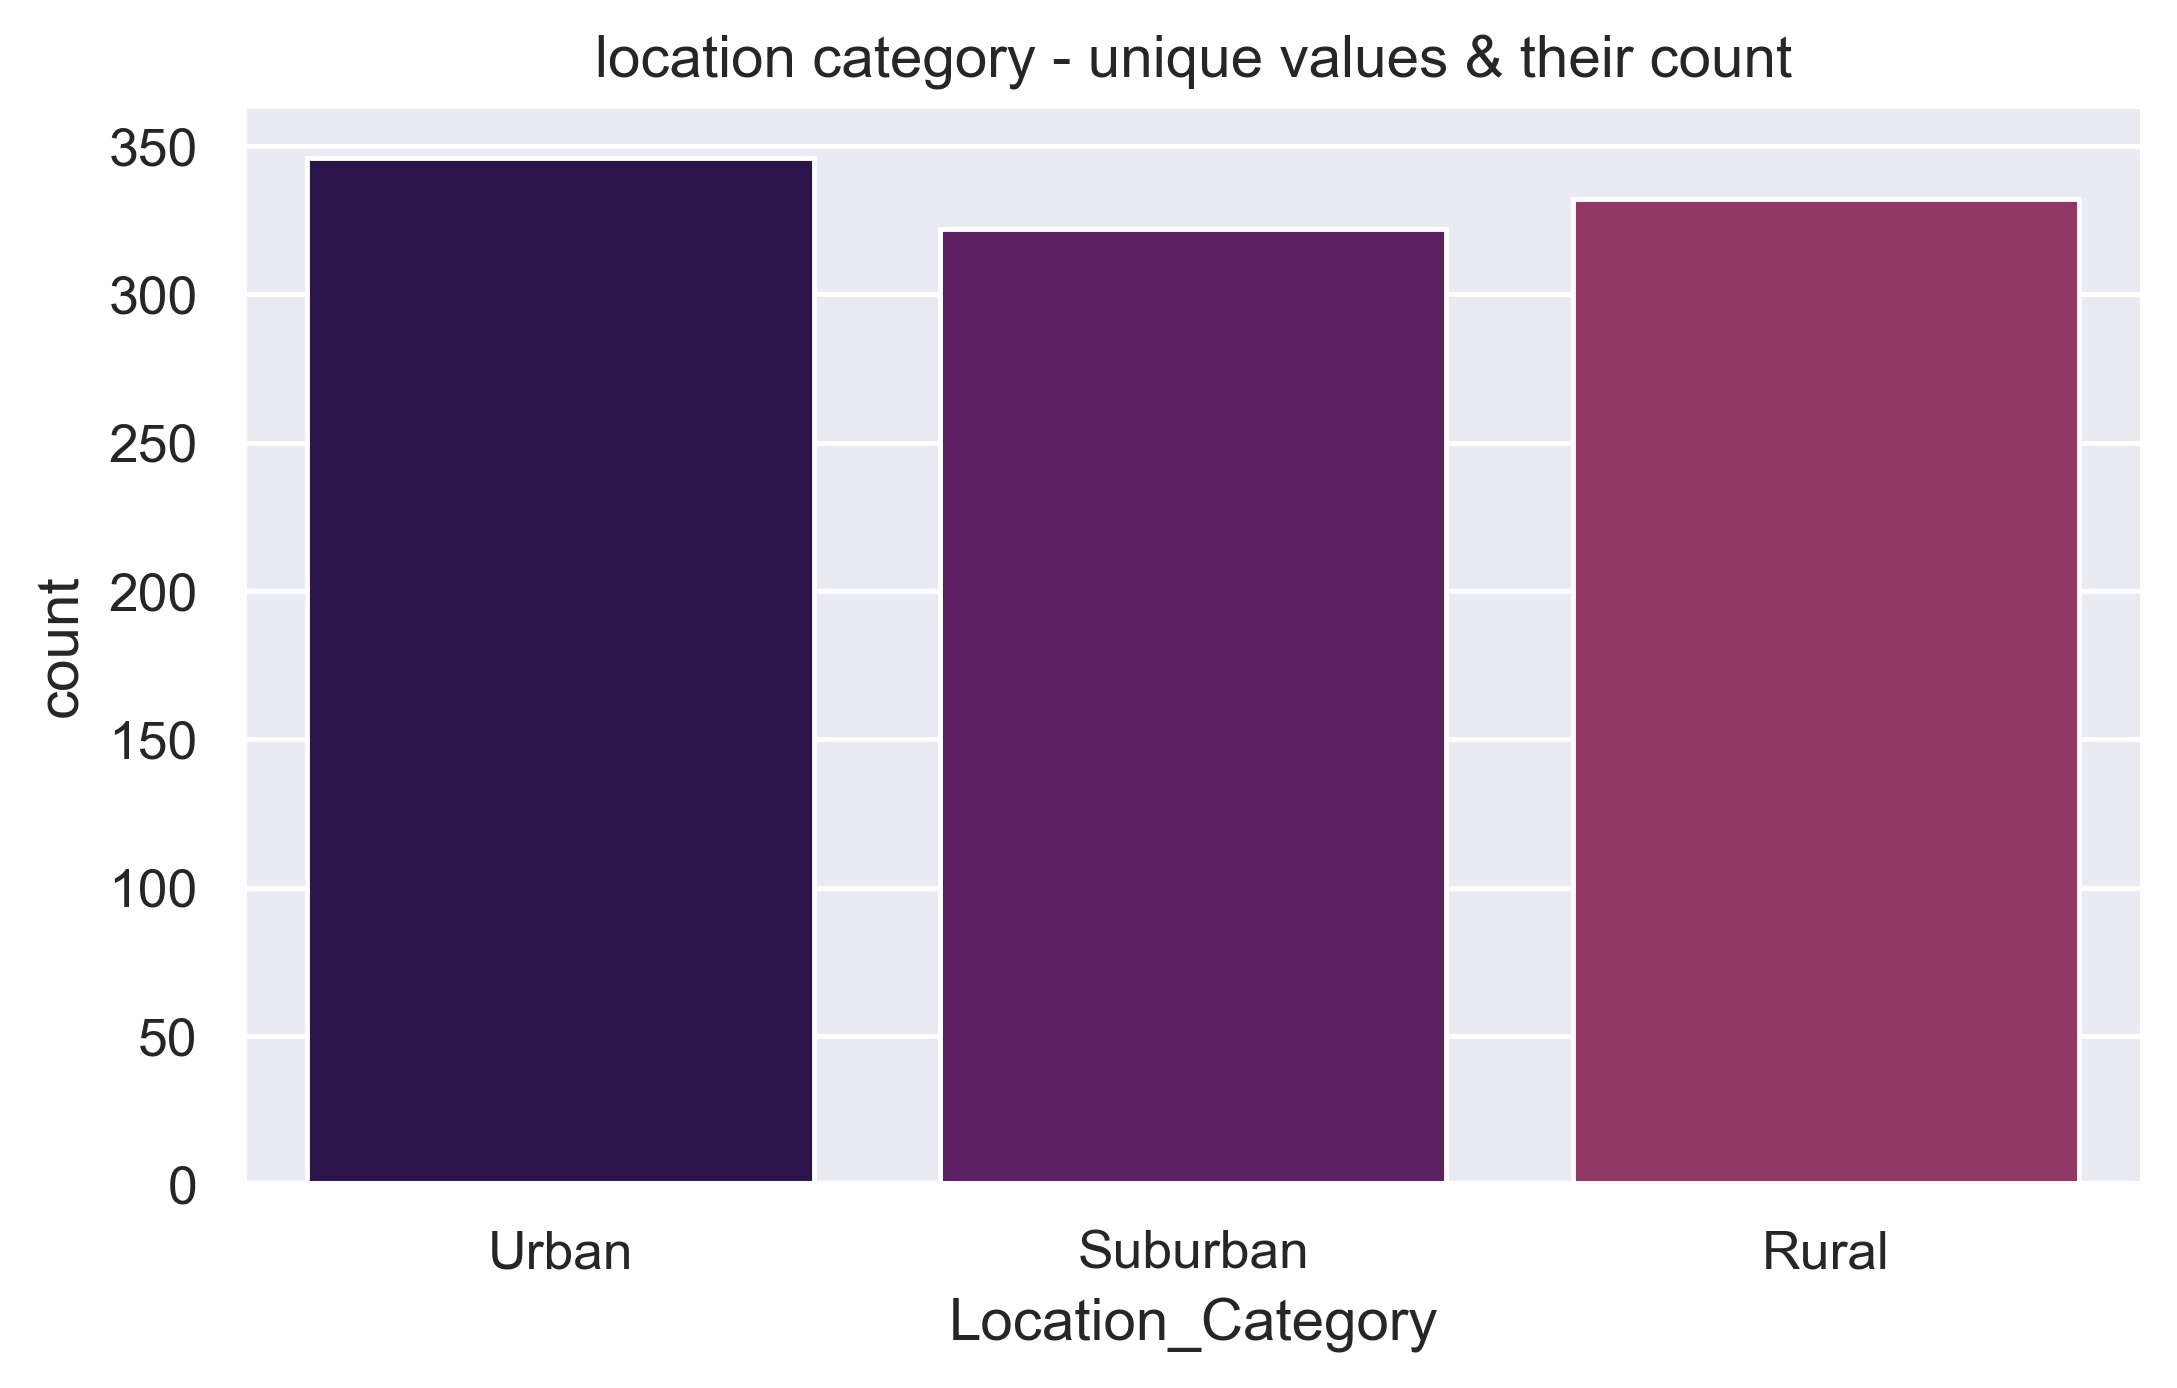

In [11]:
# visualization for unique values & their count in location category column

sns.countplot(data = df, x = 'Location_Category')
plt.title('location category - unique values & their count')
plt.show()

**The distribution of riders across location categories doesn't show a significant difference. The number of riders in each category is fairly balanced, with a slightly higher representation from the urban area**

In [12]:
df['Customer_Loyalty_Status'].value_counts()

Silver     367
Regular    320
Gold       313
Name: Customer_Loyalty_Status, dtype: int64

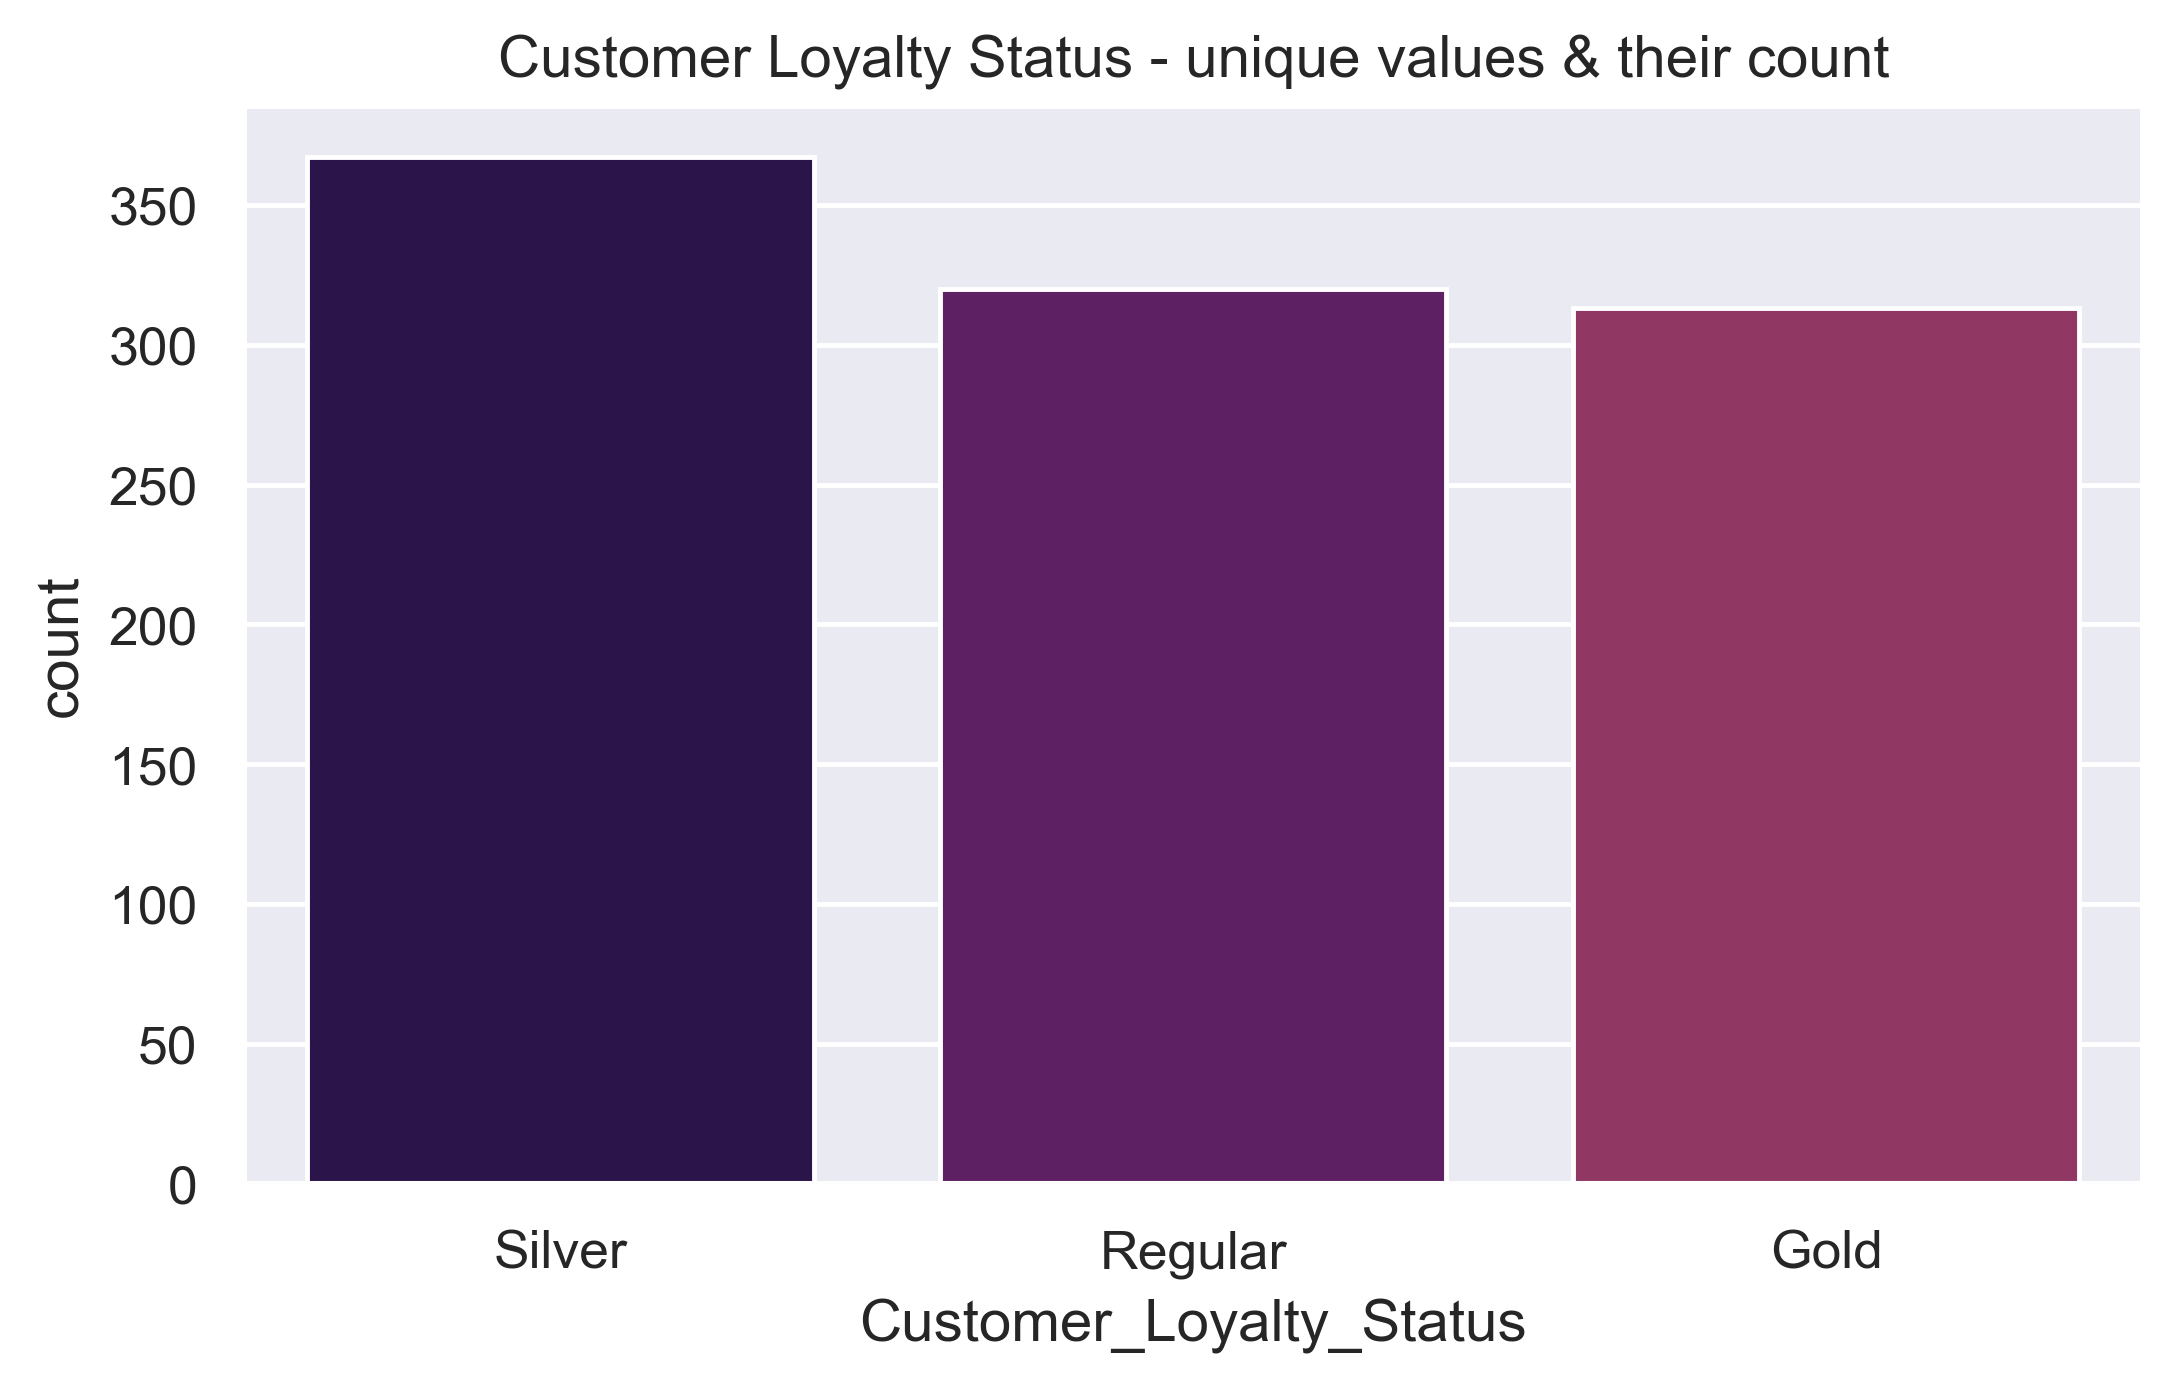

In [13]:
# visualization for unique values & their count in customer loyalty status column

sns.countplot(data = df, x = 'Customer_Loyalty_Status')
plt.title('Customer Loyalty Status - unique values & their count')
plt.show()

**The distribution of riders across all customer loyalty status doesn't show a significant difference. The number of riders in each category is fairly balanced, with a slightly higher representation from the Silver loyalty holders**

In [14]:
df['Time_of_Booking'].value_counts()

Night        276
Afternoon    247
Morning      246
Evening      231
Name: Time_of_Booking, dtype: int64

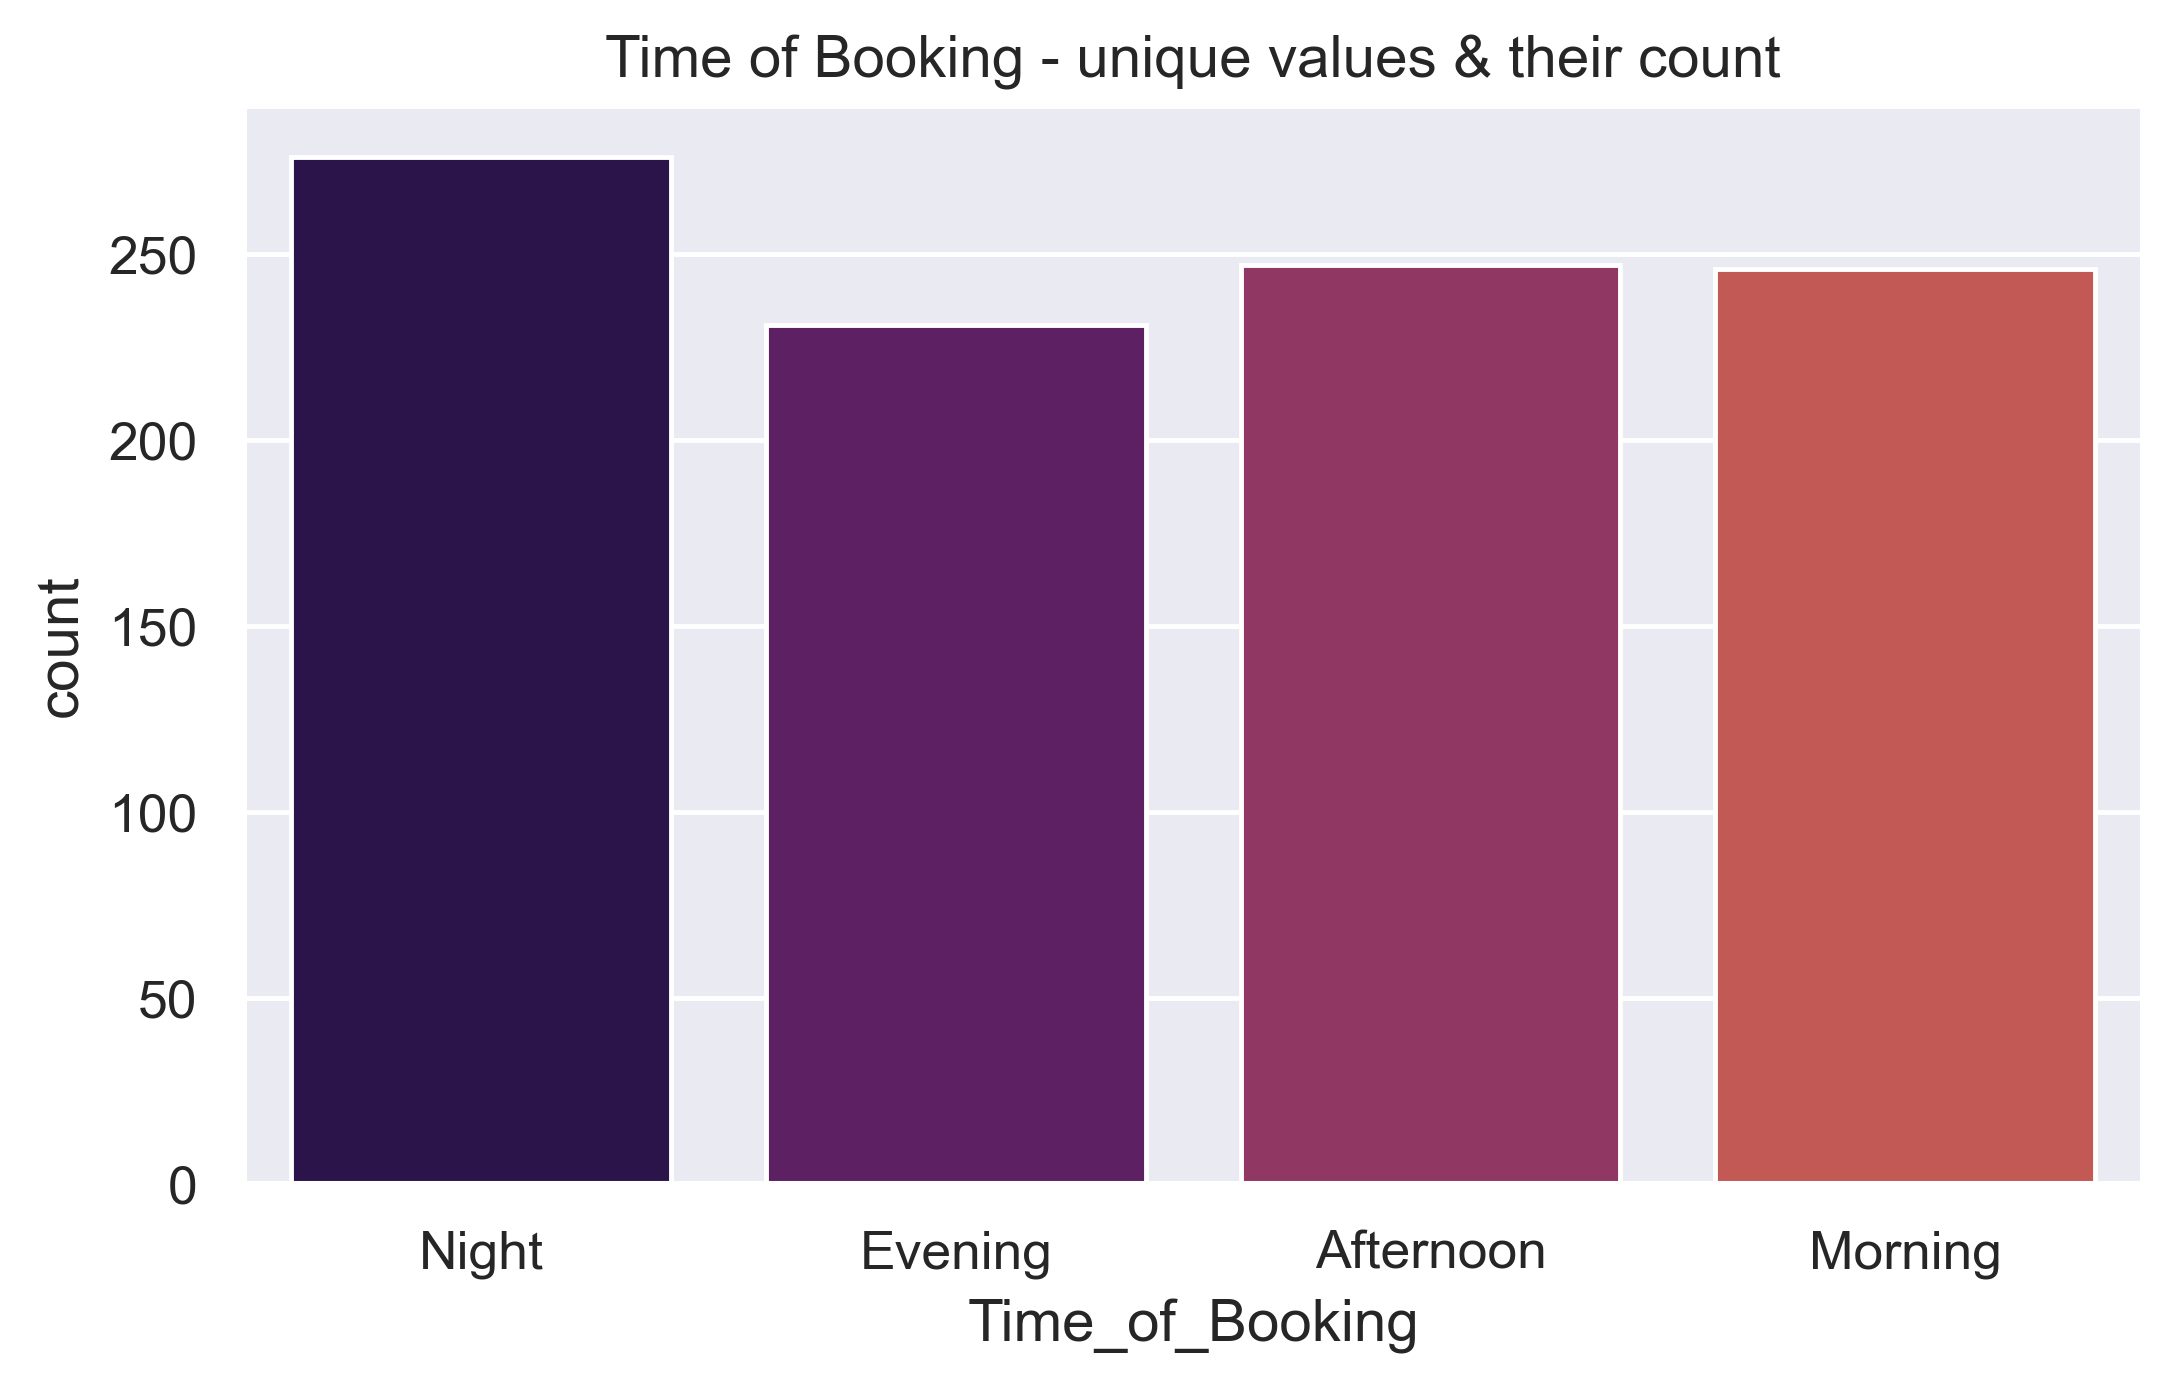

In [15]:
# visualization for unique values & their count in time of booking column

sns.countplot(data = df, x = 'Time_of_Booking')
plt.title('Time of Booking - unique values & their count')
plt.show()

**The rider distribution across different time slots reveals that there is a higher number of riders during the night, followed closely by both the afternoon and morning. In contrast, the evening sees the least number of riders compared to other time slots.**

In [16]:
df['Vehicle_Type'].value_counts()

Premium    522
Economy    478
Name: Vehicle_Type, dtype: int64

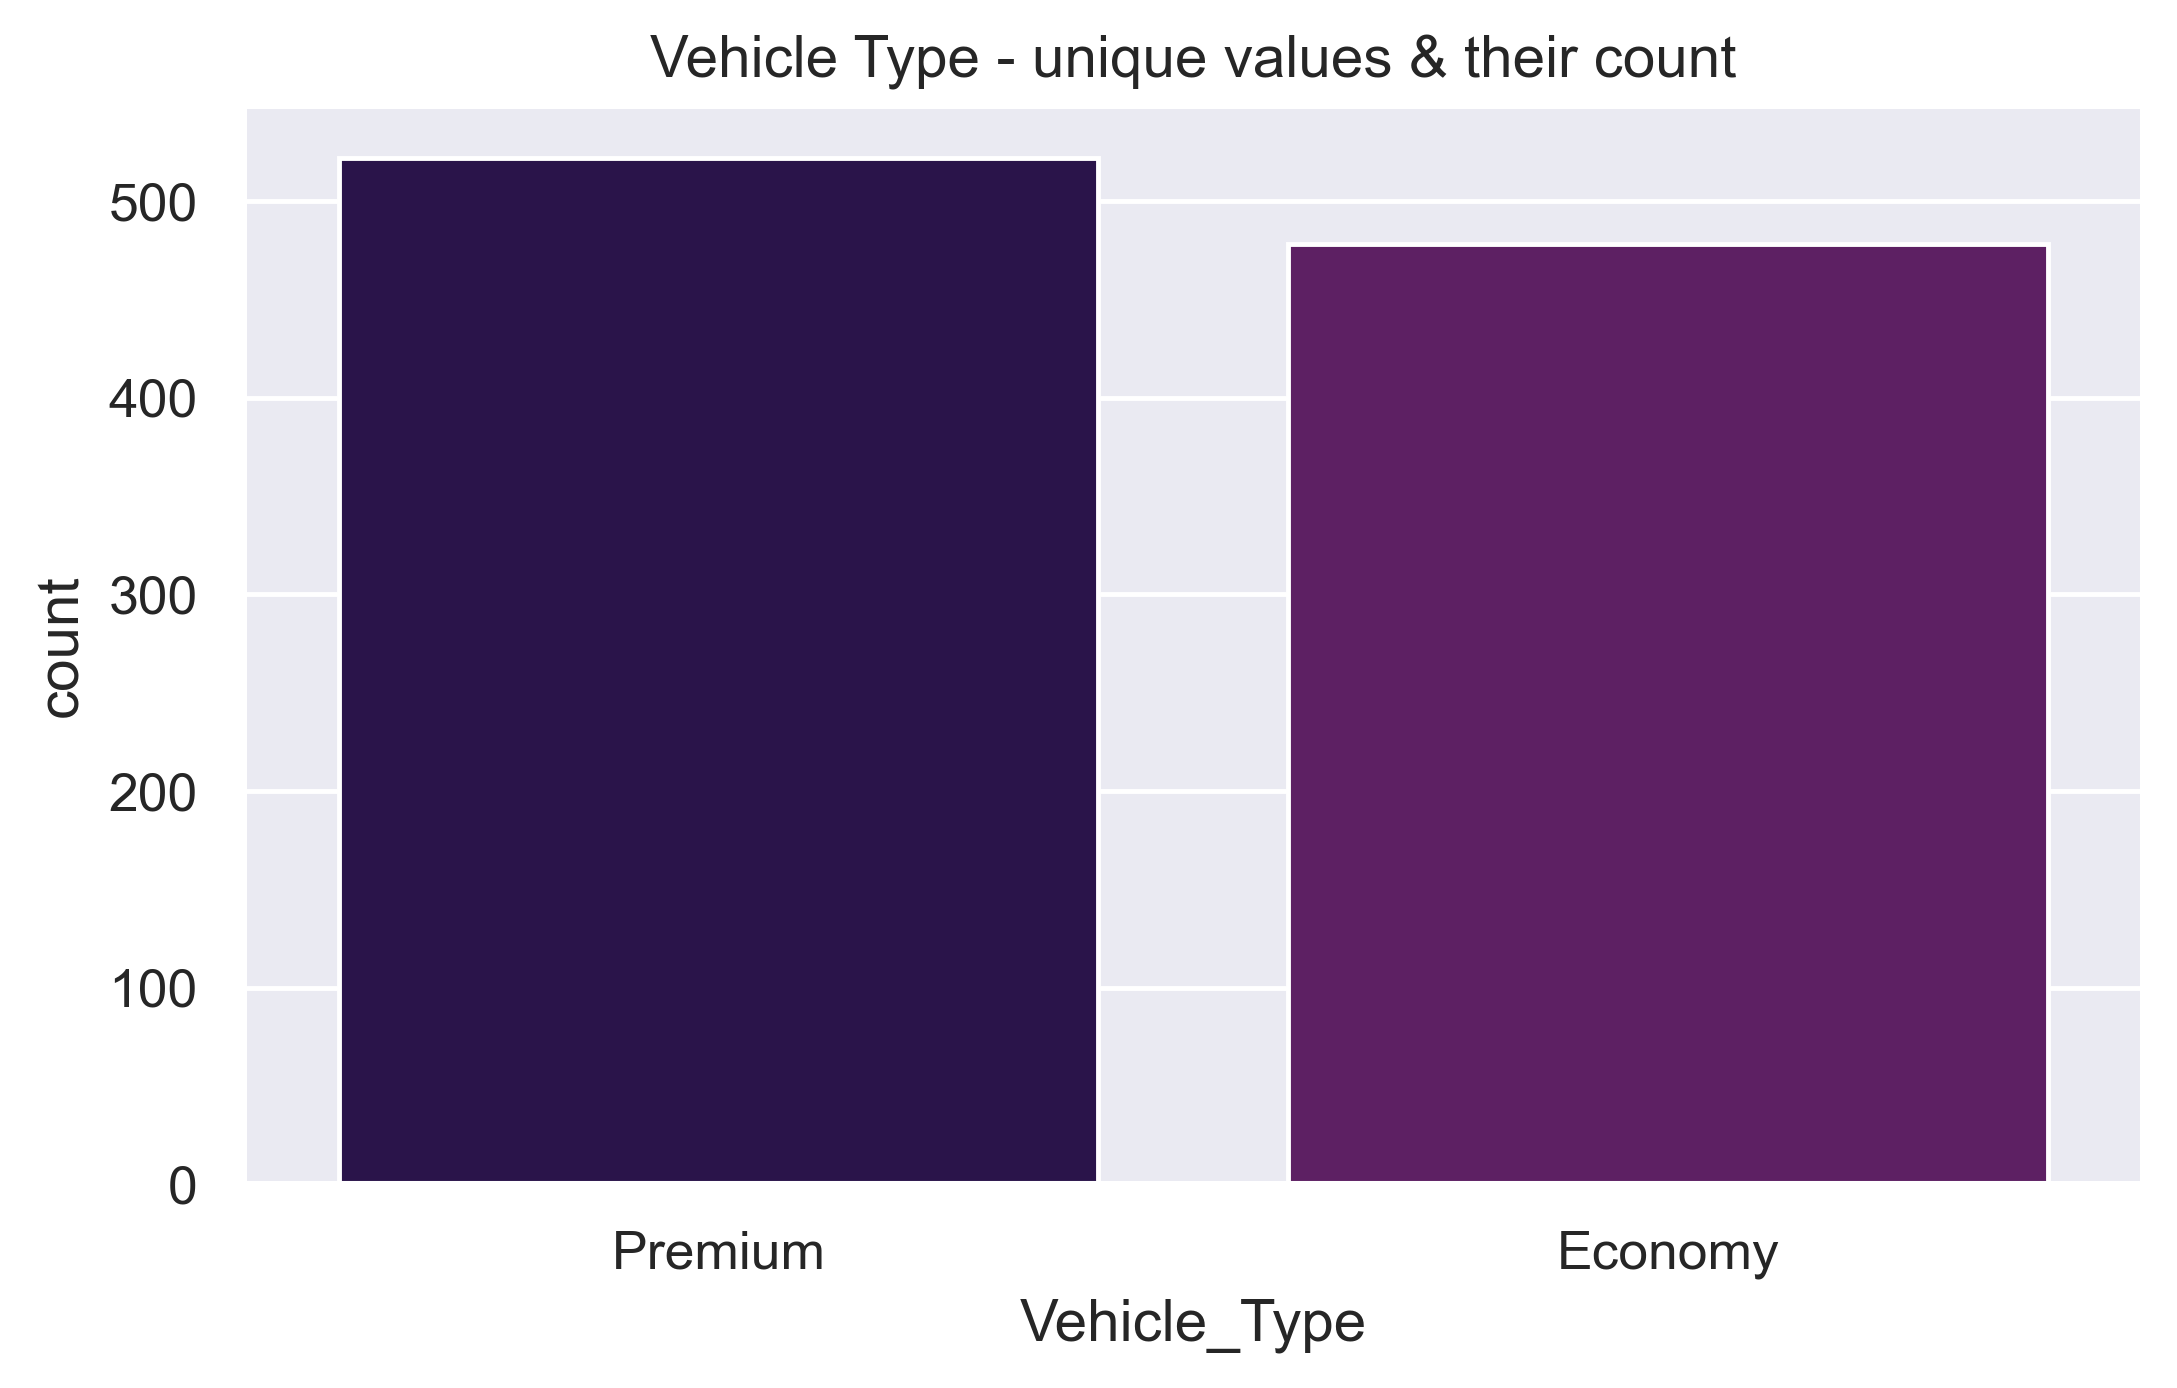

In [17]:
# visualization for unique values & their count in Vehicle_Type column

sns.countplot(data = df, x = 'Vehicle_Type')
plt.title('Vehicle Type - unique values & their count')
plt.show()

**Riders demonstrate a preference for premium vehicle types over economy options, indicating a higher inclination towards premium services when making their vehicle selections**

** numerical Data Distribution**

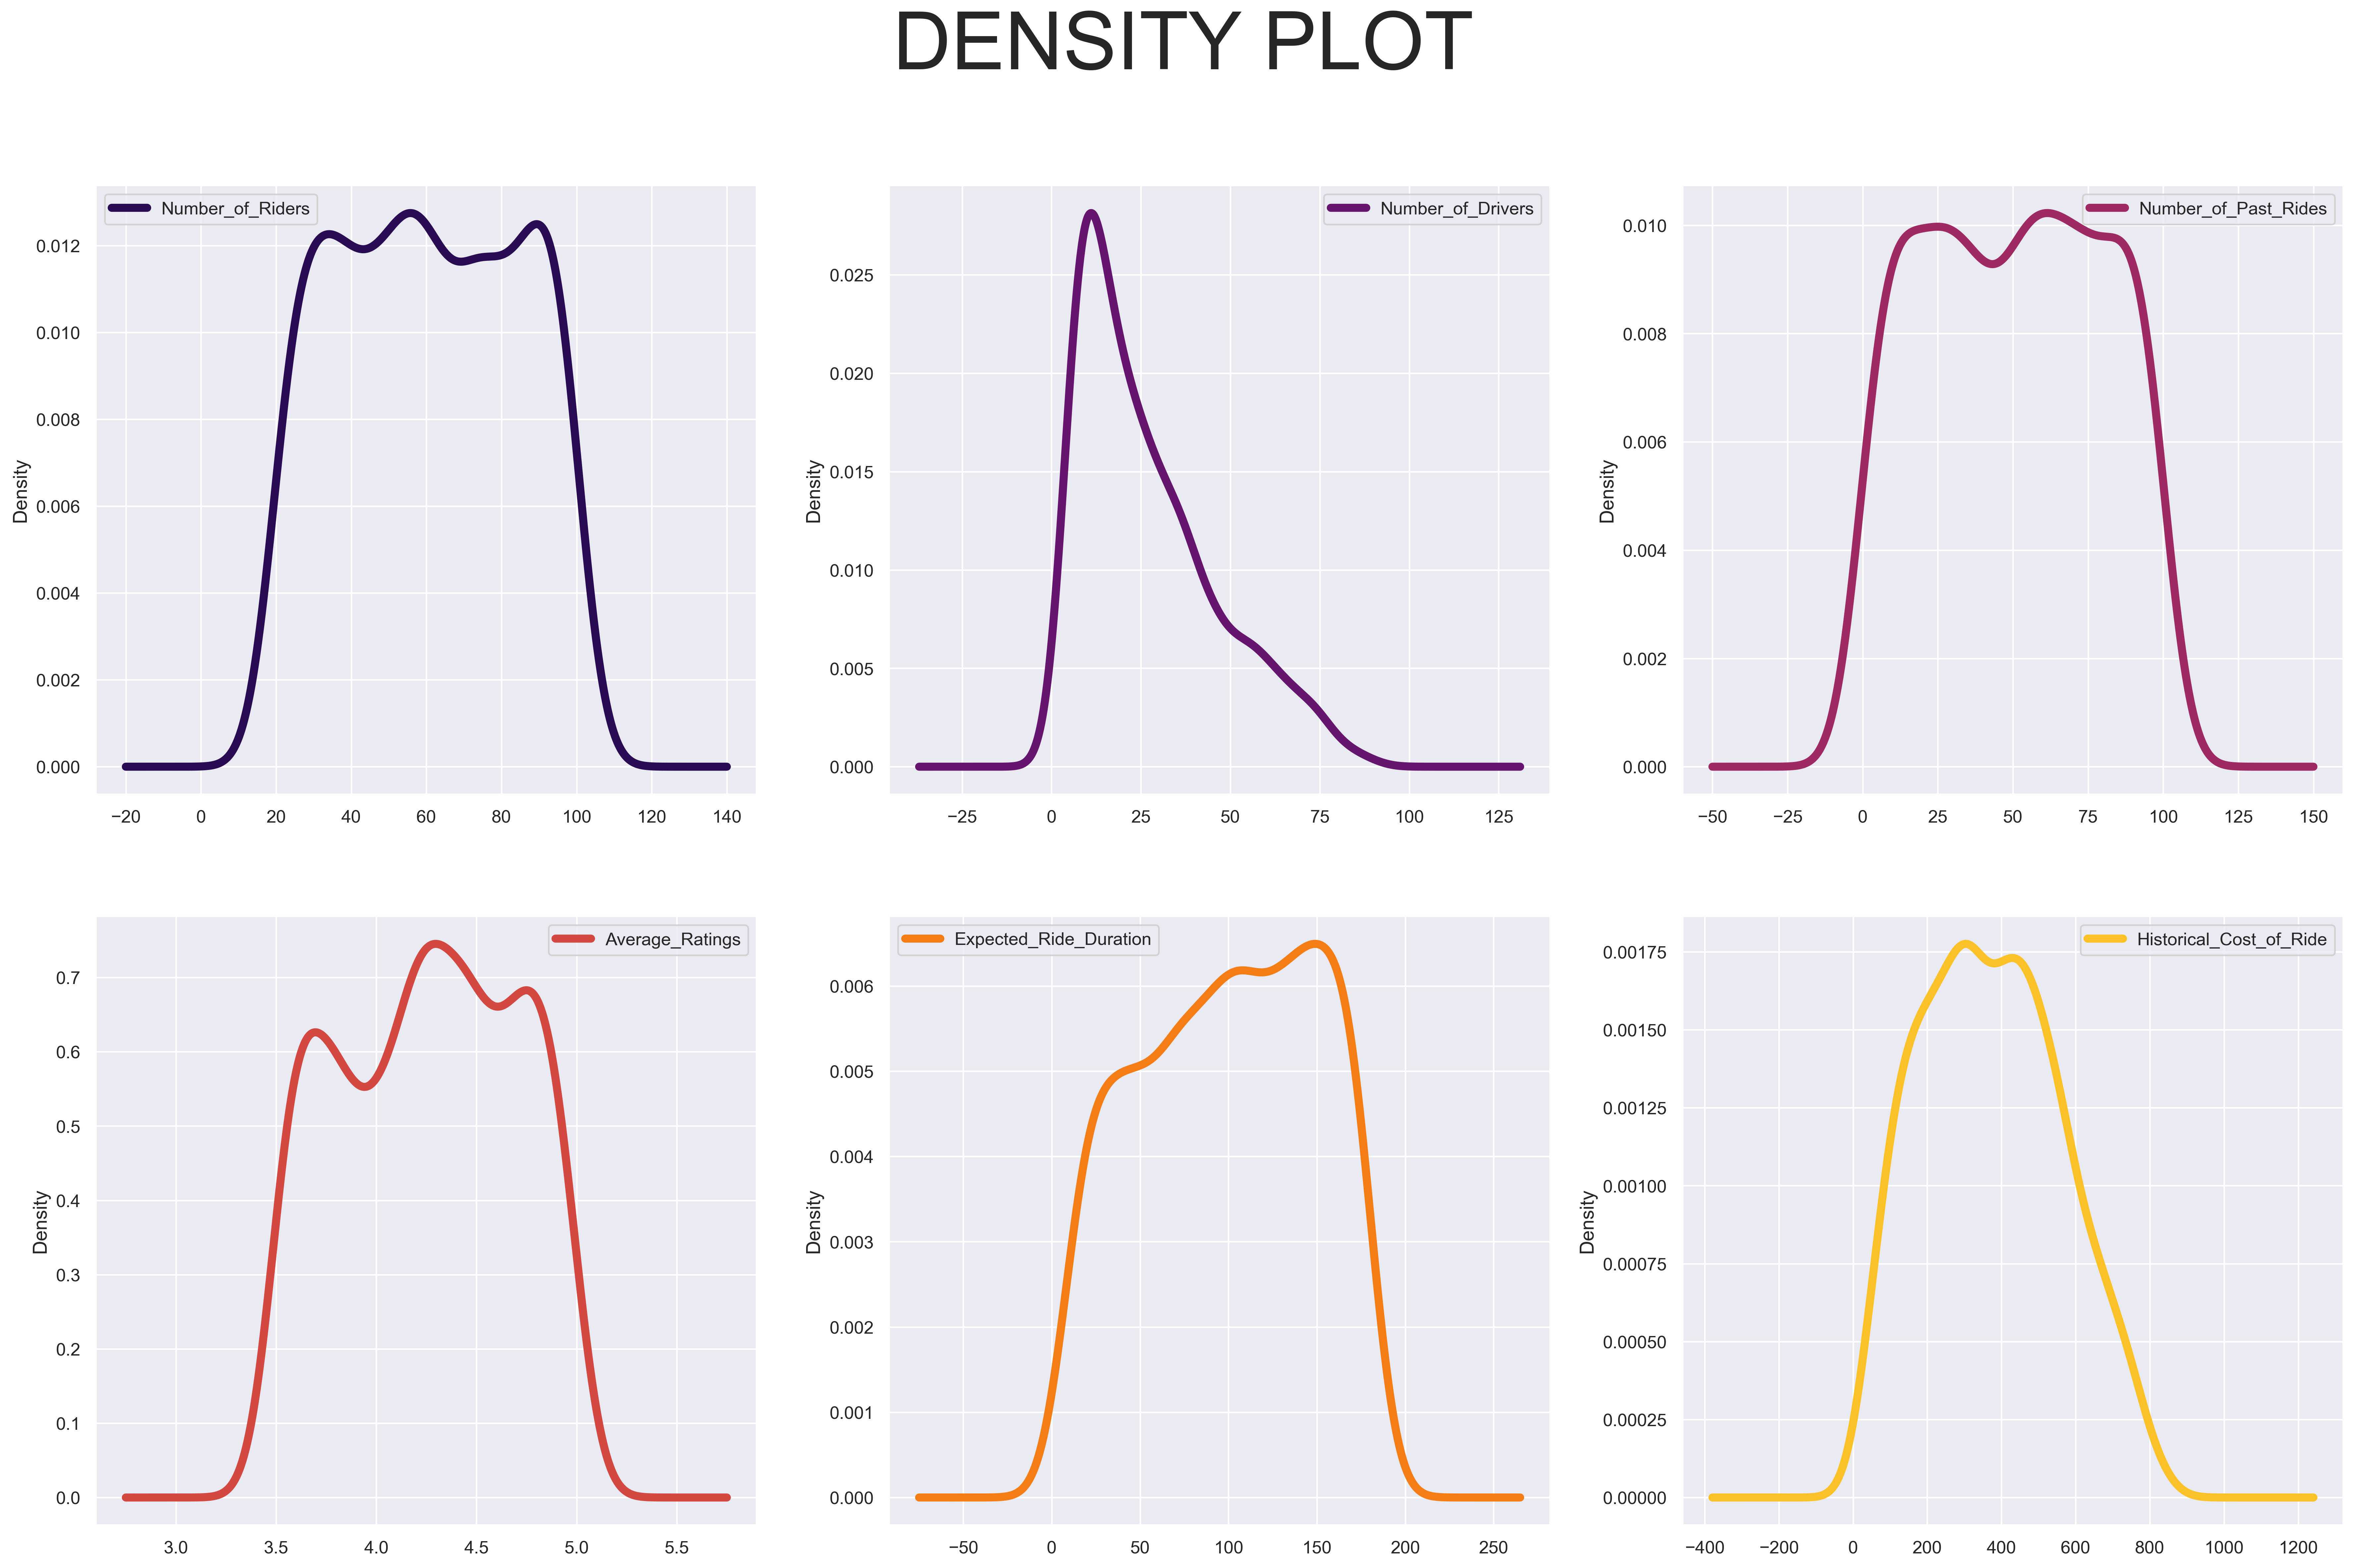

In [18]:
# densitiy plot to visualize distribution of numerical data

df.plot(kind='density', subplots=True, layout=(2,3), sharex=False, figsize=(25, 15), linewidth = 5);
plt.suptitle('DENSITY PLOT', fontsize = 50)
plt.show()

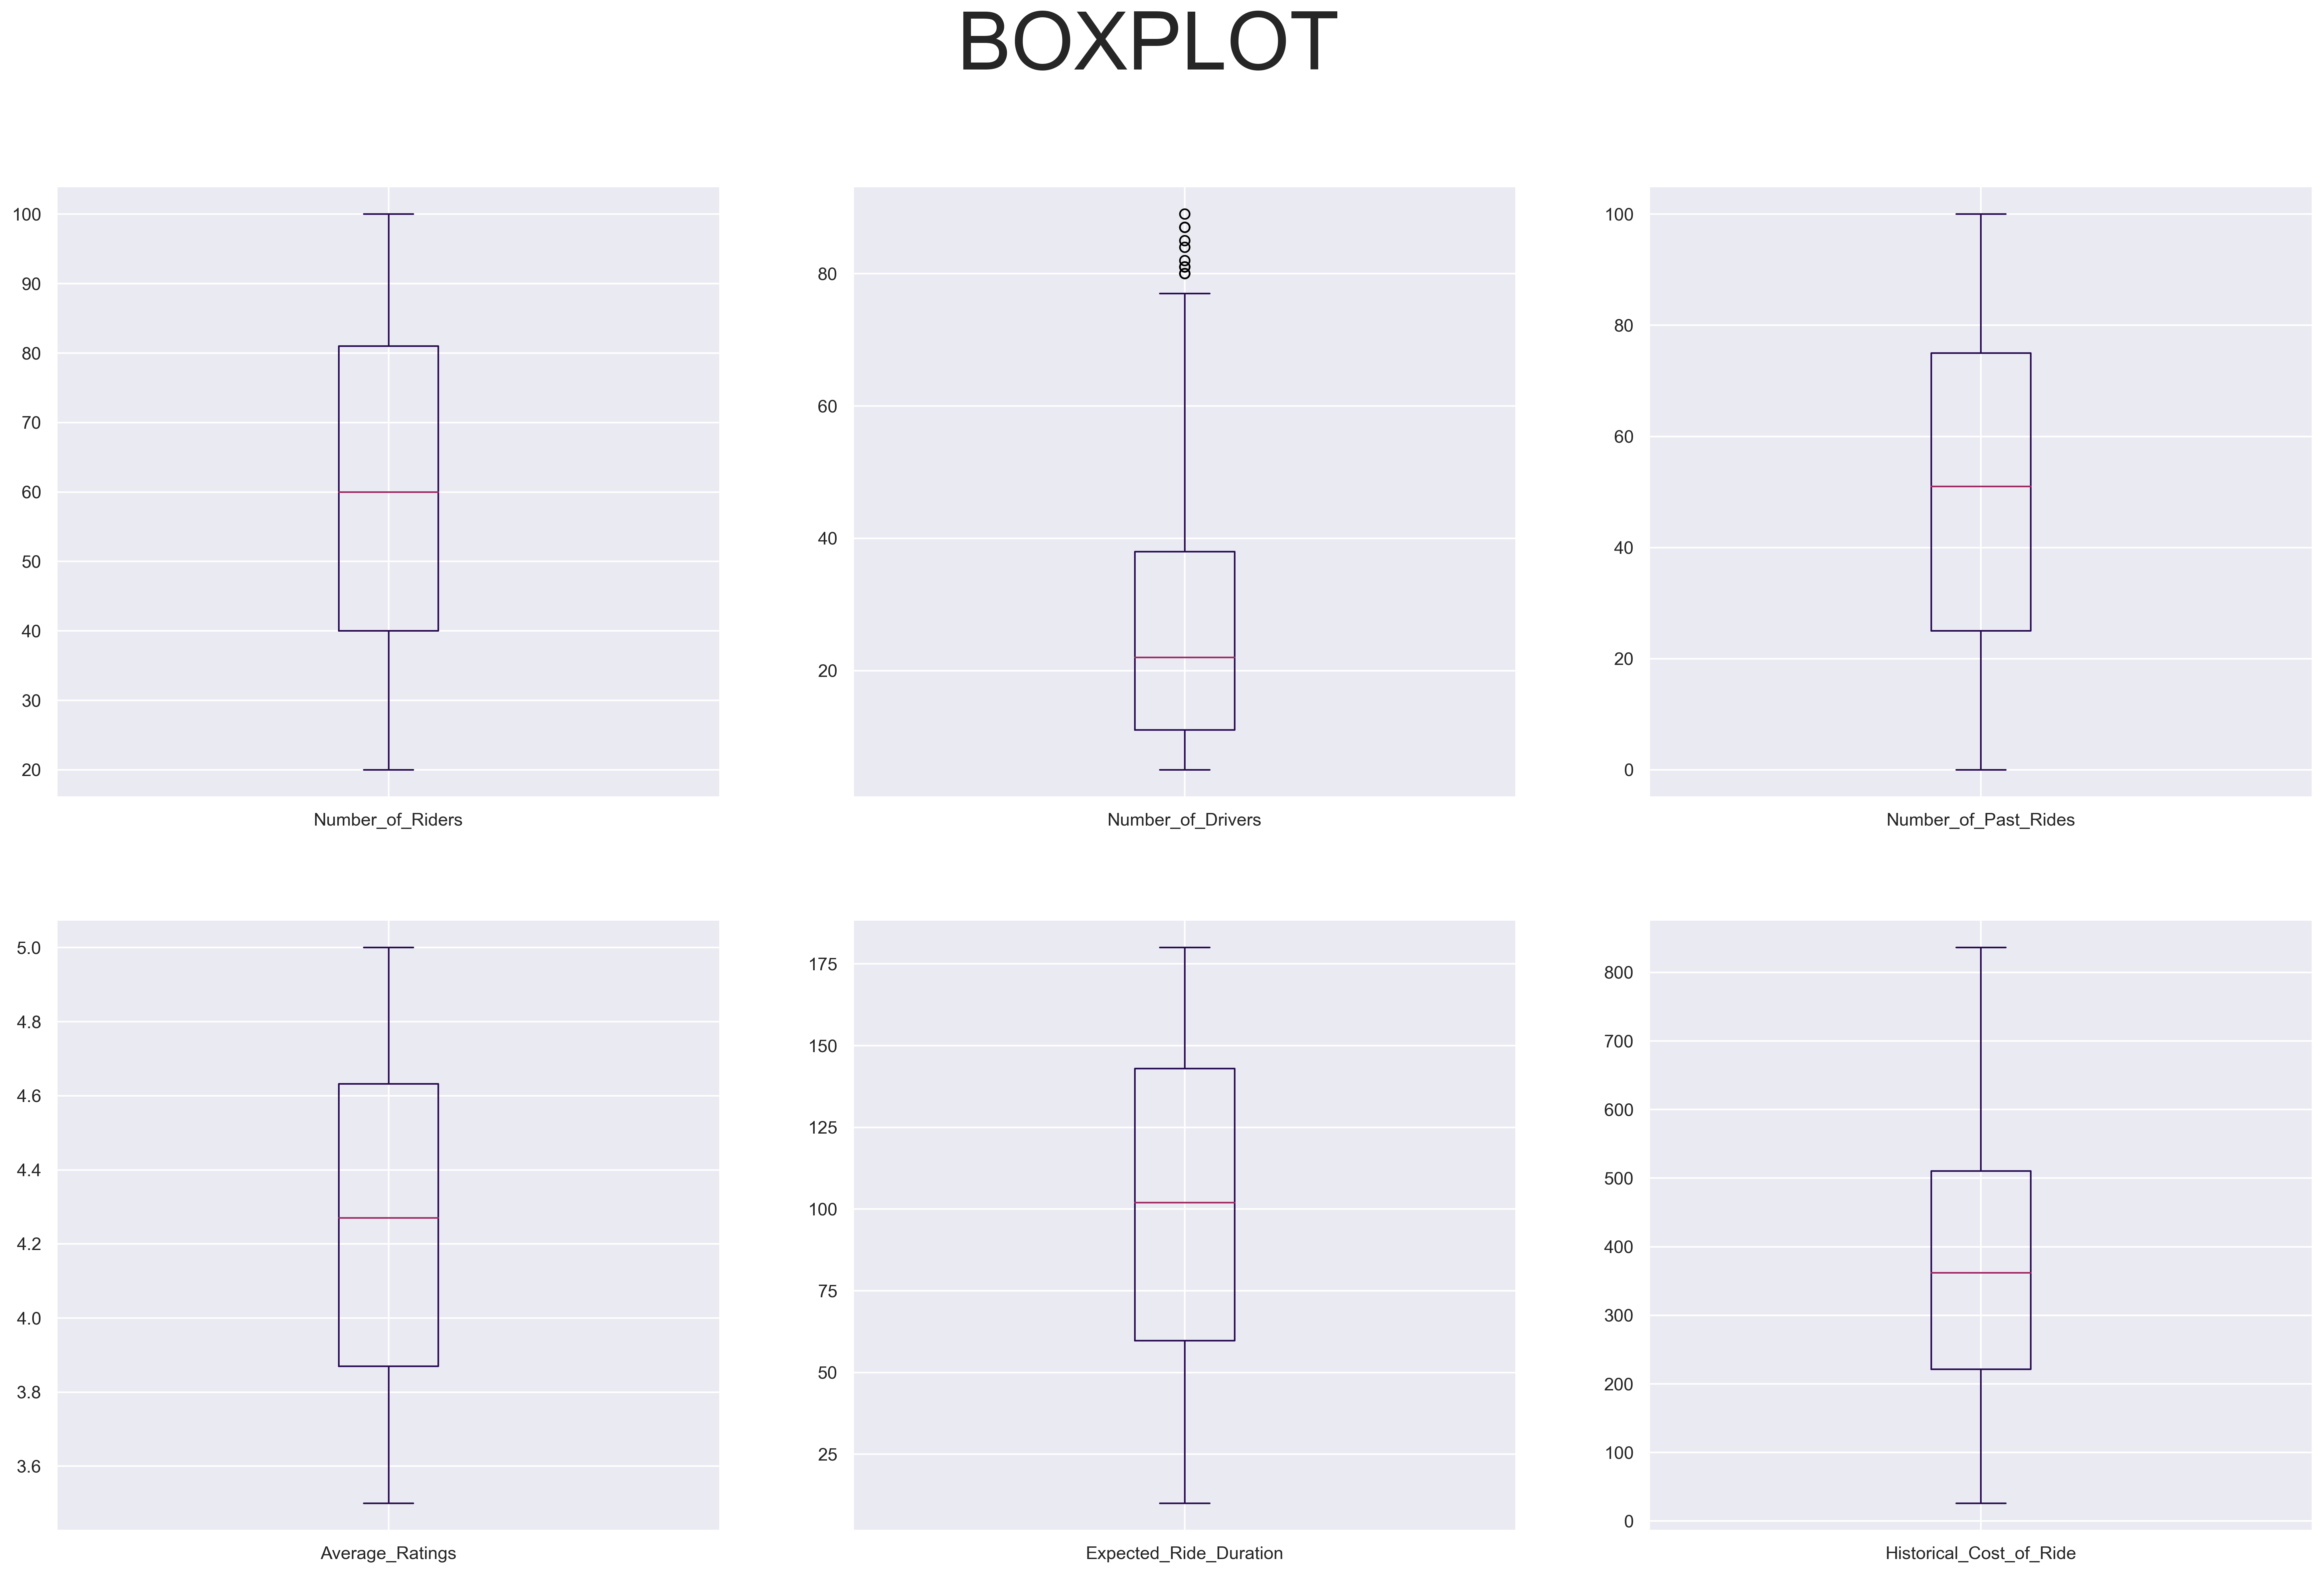

In [19]:
# boxplot of visualize presence of outlier for numerical data

df.plot(kind='box', subplots=True, layout=(2,3), sharex=False, figsize=(25, 15));
plt.suptitle('BOXPLOT', fontsize = 50)
plt.show()

**The data exhibits a sort of normal distribution, with the exception of the 'Number of Driver' column. While there is a small presence of outliers in the 'Number of Driver' column, it is advisable to retain them to assess their impact on the dataset and analyze any potential effects they might have on the overall results.**

# Feature Engineering

The code calculates the demand_multiplier based on the percentile of the 'Number_of_Riders' feature. It assesses whether the current number of riders is high or low compared to the dataset's distribution.
If the number of riders is above the 75th percentile, it calculates the ratio of the number of riders to the 75th percentile value. Otherwise, it calculates the ratio to the 25th percentile value.

In [20]:
# Calculating a demand_multiplier based on percentile for high and low demand of riders
high_demand_percentile = 75
low_demand_percentile = 25

df['demand_multiplier'] = np.where(df['Number_of_Riders'] > np.percentile(df['Number_of_Riders'], high_demand_percentile),
                                     df['Number_of_Riders'] / np.percentile(df['Number_of_Riders'], high_demand_percentile),
                                     df['Number_of_Riders'] / np.percentile(df['Number_of_Riders'], low_demand_percentile))


Similarly, the code calculates the supply_multiplier based on the percentile of the 'Number_of_Drivers' feature. It assesses whether the current number of drivers is high or low compared to the dataset's distribution.
If the number of drivers is above the 75th percentile, it calculates the ratio of the 75th percentile value to the number of drivers. Otherwise, it calculates the ratio to the 25th percentile value.

In [21]:
# Calculating driver_supply_multiplier based on percentile for high and low supply/availability of drivers
high_supply_percentile = 75
low_supply_percentile = 25

df['driver_supply_multiplier'] = np.where(df['Number_of_Drivers'] > np.percentile(df['Number_of_Drivers'], low_supply_percentile),
                                     np.percentile(df['Number_of_Drivers'], high_supply_percentile) / df['Number_of_Drivers'],
                                     np.percentile(df['Number_of_Drivers'], low_supply_percentile) / df['Number_of_Drivers'])

The code defines four threshold values (demand_threshold_high, demand_threshold_low, supply_threshold_high, and supply_threshold_low) to determine when to adjust prices based on demand and supply conditions.
These thresholds help decide whether the demand or supply multiplier is within an acceptable range or needs adjustment.

In [22]:
 #Define price adjustment factors for high and low demand/supply

demand_threshold_high = 1.2  
demand_threshold_low = 0.8 
supply_threshold_high = 0.8  
supply_threshold_low = 1.2 

The final step calculates the adjusted_ride_cost by applying adjustments to the historical ride cost based on both demand and supply factors.
It multiplies the 'Historical_Cost_of_Ride' by the maximum of the demand multiplier and the demand threshold low. This ensures that if demand is lower than the defined threshold, the lower threshold is considered for adjustment.
Similarly, it multiplies the result by the maximum of the supply multiplier and the supply threshold high. This ensures that if supply is higher than the defined threshold, the higher threshold is considered for adjustment.

In [23]:
df['adjusted_riding_cost'] = df['Historical_Cost_of_Ride'] *(
    np.maximum(df['demand_multiplier'], demand_threshold_low) * np.maximum(df['driver_supply_multiplier'], supply_threshold_high))

**The final outcome of this code is a new variable, adjusted_riding_cost, that represents the dynamically adjusted cost for each ride. The adjustments take into account both demand and supply factors, aiming to capture high-demand periods and low-supply scenarios for price increases and vice versa. The adjusted ride cost is a key component of a dynamic pricing strategy that can be used by a ride-sharing company to optimize fares based on real-time market conditions.**

calculates the profit percentage for each ride based on the adjusted ride cost and the historical cost of the ride. It then identifies rides as profitable or loss-making based on whether the profit percentage is positive or negative, respectively. Let's break down the code:

In [24]:
# Calculating the profit percentage for each ride

df['profit_percentage'] = ((df['adjusted_riding_cost'] - df['Historical_Cost_of_Ride']) / df['Historical_Cost_of_Ride']) * 100

# calculating profitable rides

profitable_rides = df[df['profit_percentage'] > 0]

# calculating loss rides
loss_rides = df[df['profit_percentage'] < 0]

In [25]:
df.head()

Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76   
3       Afternoon      Premium                     134   
4       Afternoon      Economy                     149   

   Historical_Cost_of_Ride  demand_multiplier  driver_supply_multiplier  \
0               284.257273           1.111111                  0.844444   
1               173.874753           1.450000                  0.974359   
2               329.795469           1.050000                  1.225806   
3               470.201232           1.098765                  1.357143   
4               579.681422           1.950000                  1.727273   

   adjusted_riding_cost  profit_percentage  
0            266.710528          -6.172840  
1            245.653817          41.282051  
2            424.478684          28.709677  
3            701.155452          49.118166  
4           1952.472427         236.818182

**Outlier Handling**

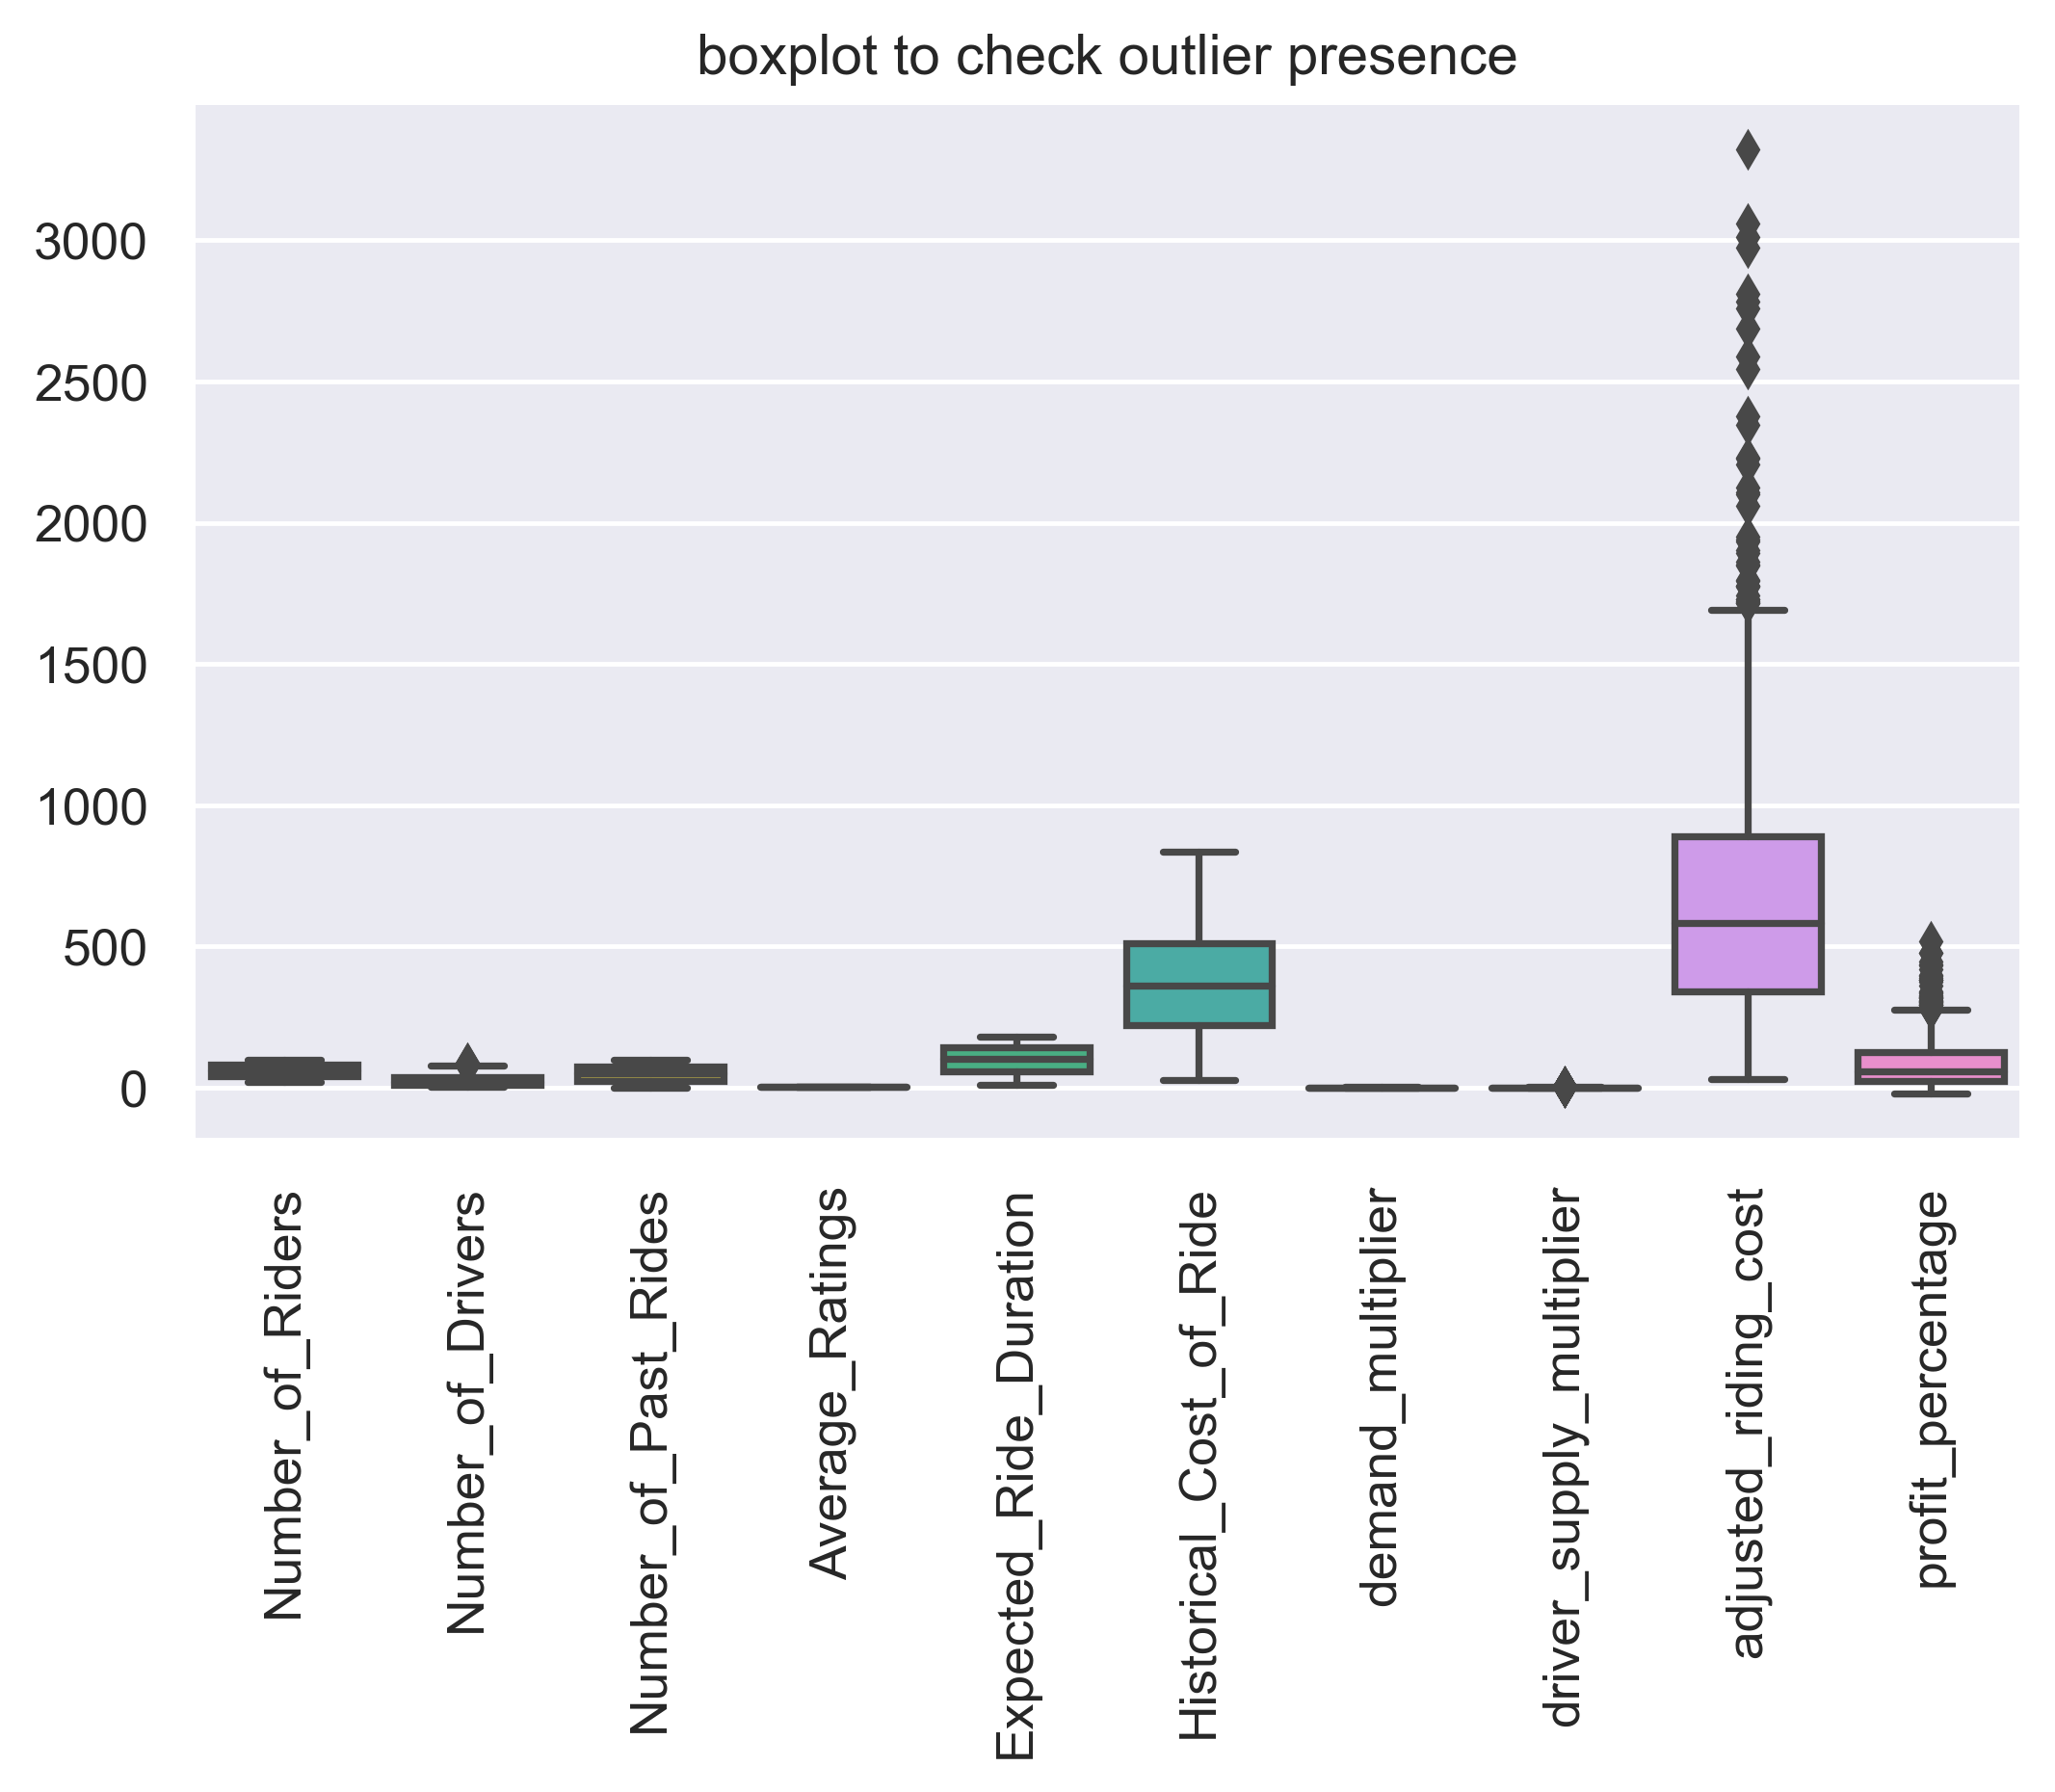

In [26]:
sns.boxplot(data = df)
plt.xticks(rotation = 90)
plt.title('boxplot to check outlier presence')
plt.show()

In [27]:
# creating a function to apply capping technique to handle outliers

def outler_remove(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    df.loc[df[col]>upper,col] = upper

In [28]:
outler_remove(df, 'Number_of_Drivers')
outler_remove(df, 'driver_supply_multiplier')
outler_remove(df, 'adjusted_riding_cost')
outler_remove(df, 'profit_percentage')

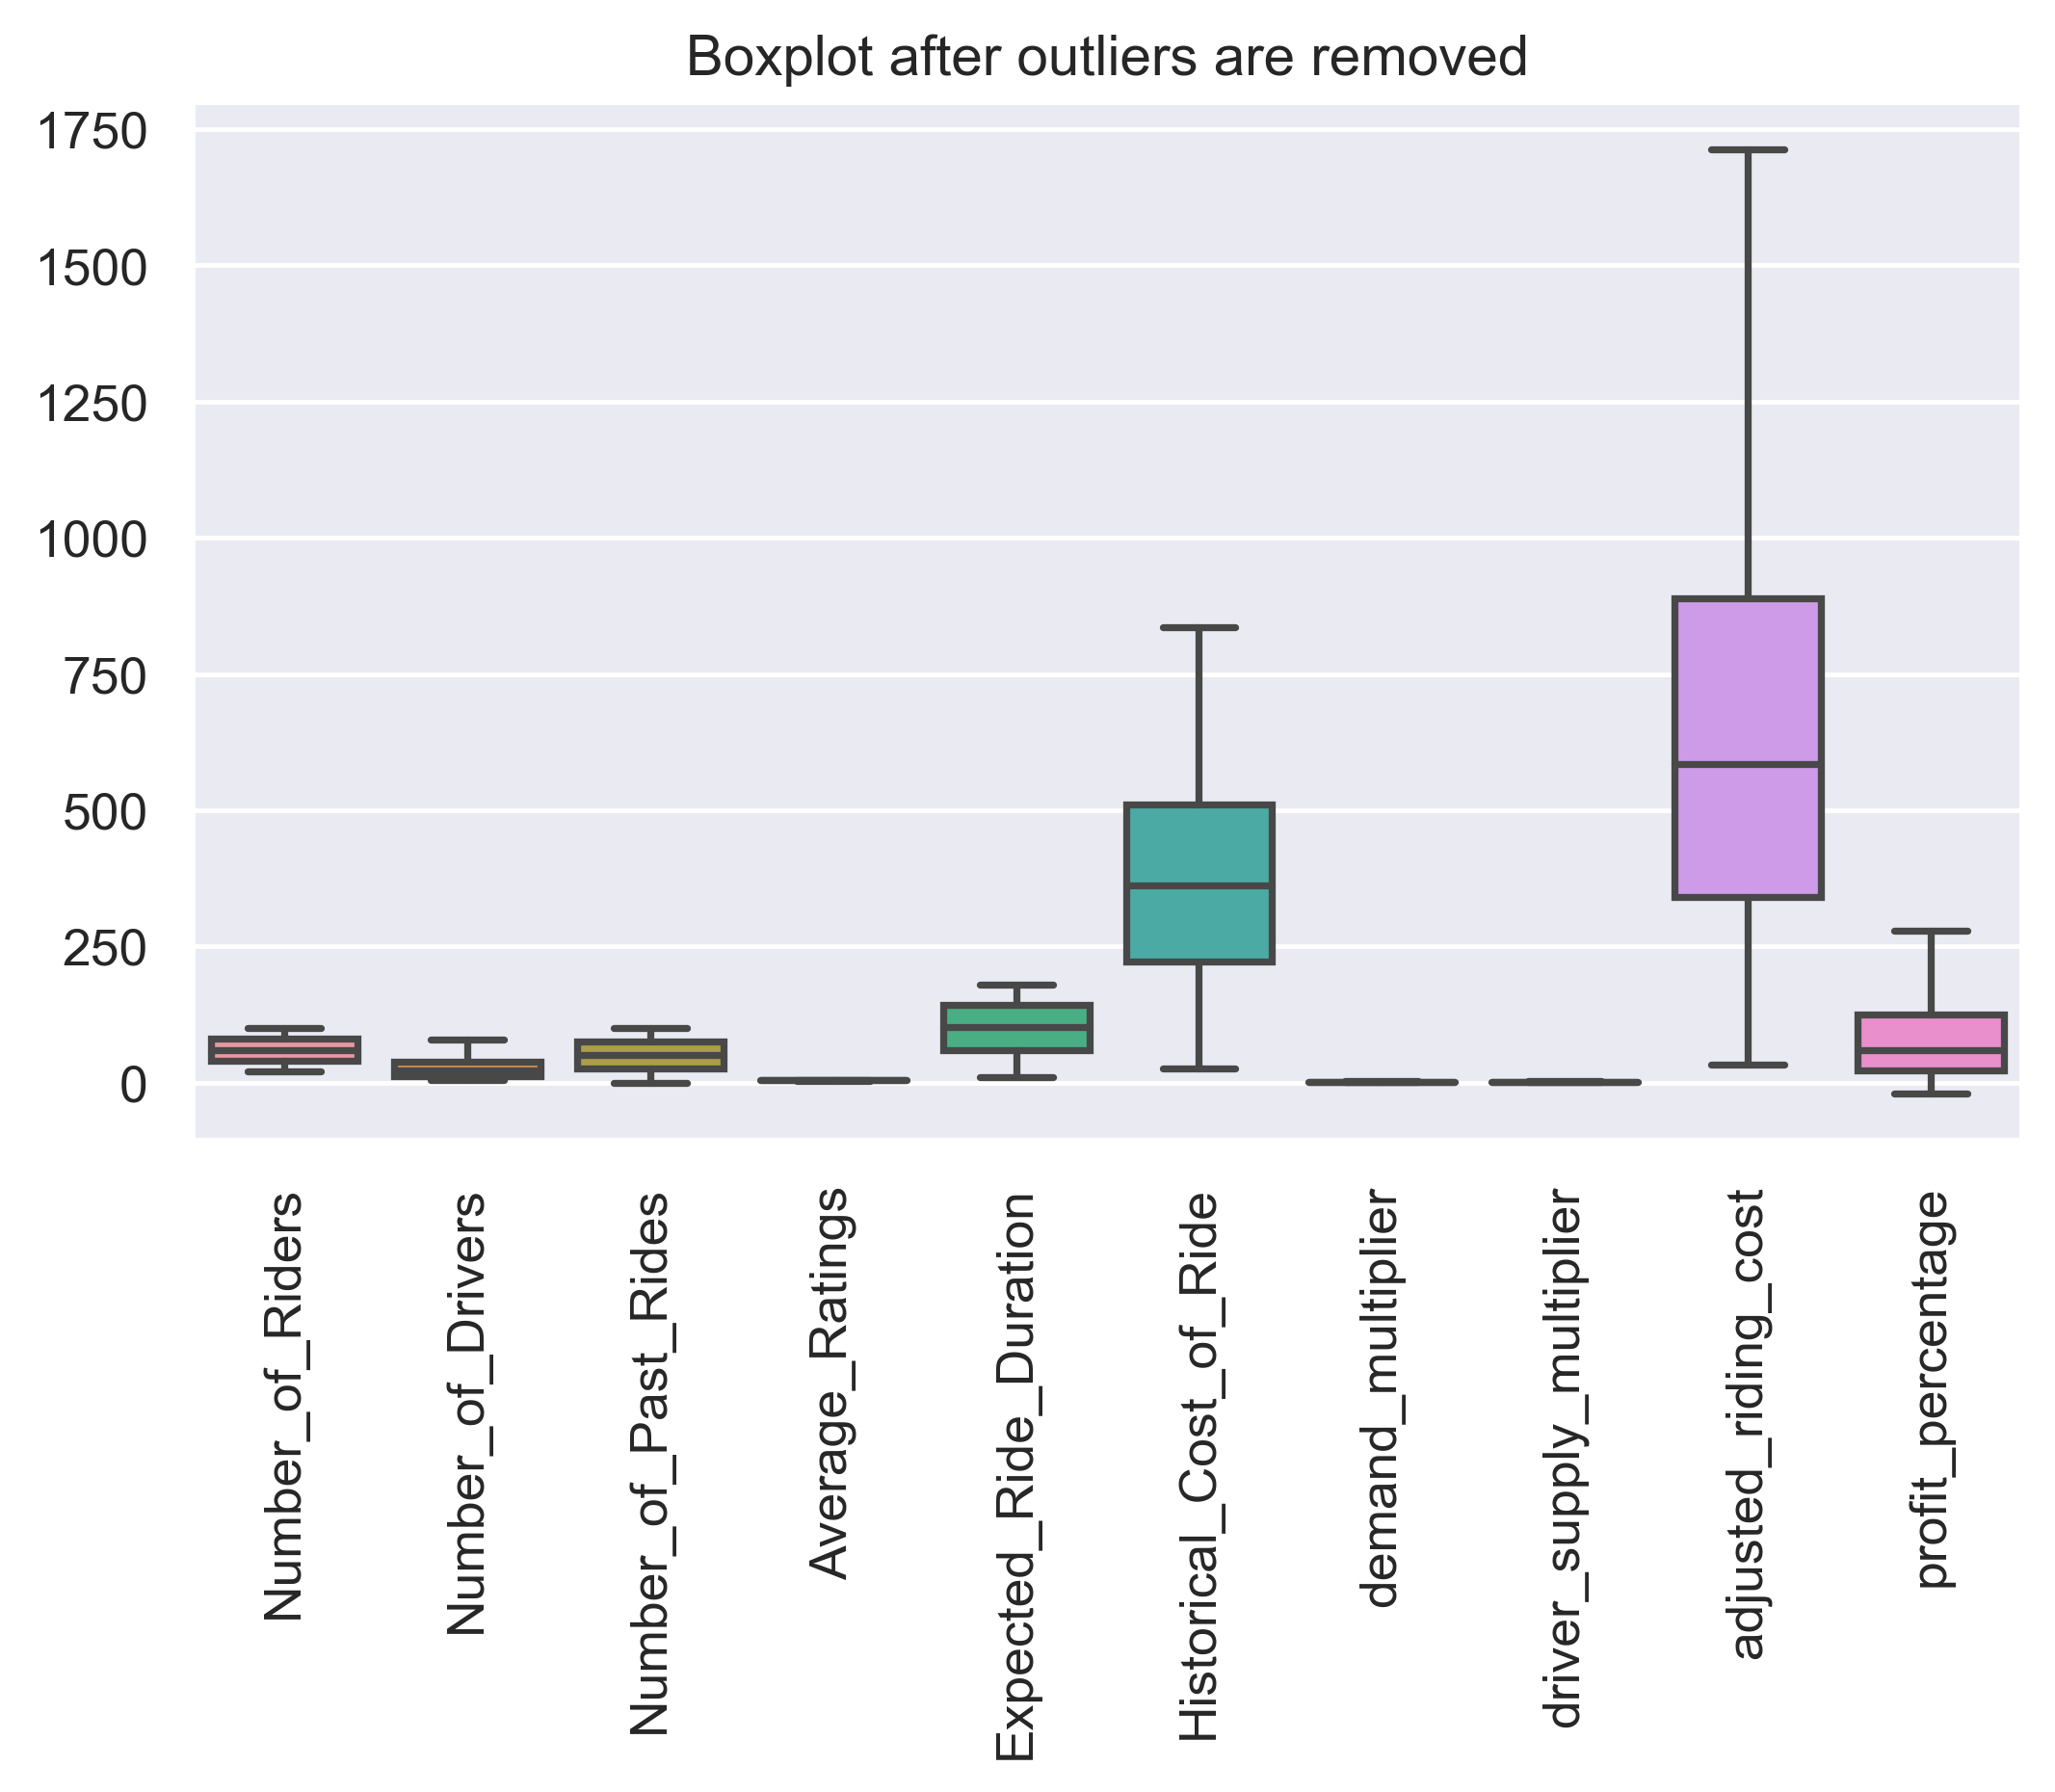

In [29]:
sns.boxplot(data = df)
plt.xticks(rotation = 90)
plt.title('Boxplot after outliers are removed')
plt.show()

### VIsualizations

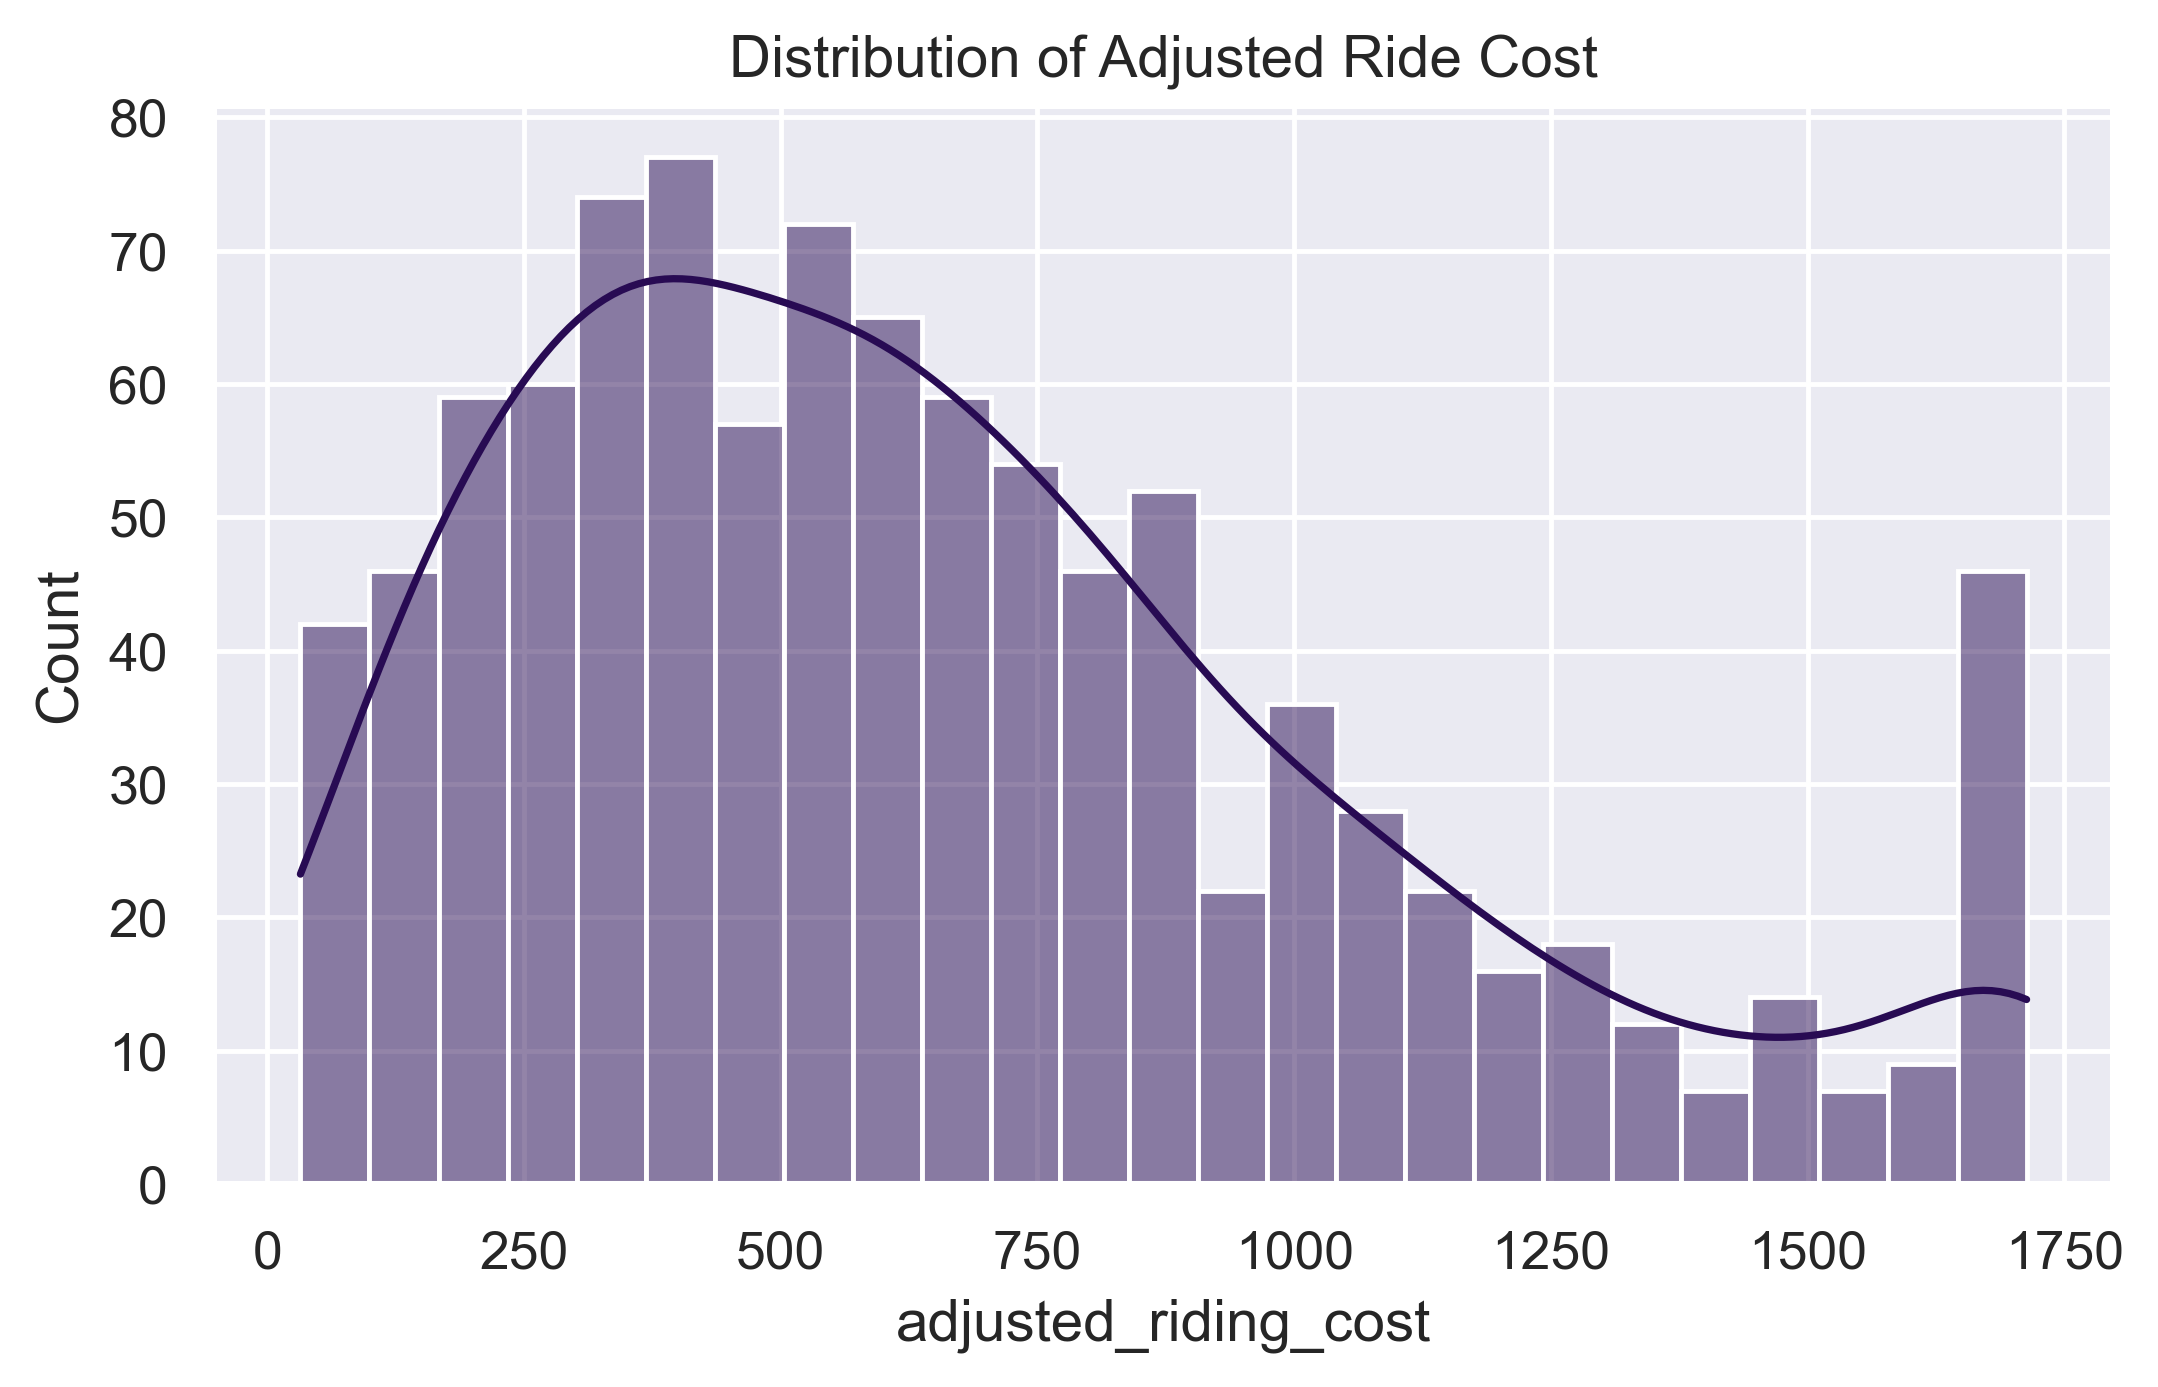

In [30]:
# creating histogram to check for the distribution of newly created adjusted riding cost variable

sns.histplot(data = df, x= 'adjusted_riding_cost', kde=True, bins = 25)
plt.title('Distribution of Adjusted Ride Cost')
plt.show()

**the adjusted riding cost typically falls within the range of 250 to 800 after factoring in dynamic price adjustments. However, there is a noticeable sudden spike around the cost of 1700, which could be attributed to supply and demand factors influencing pricing dynamics.**

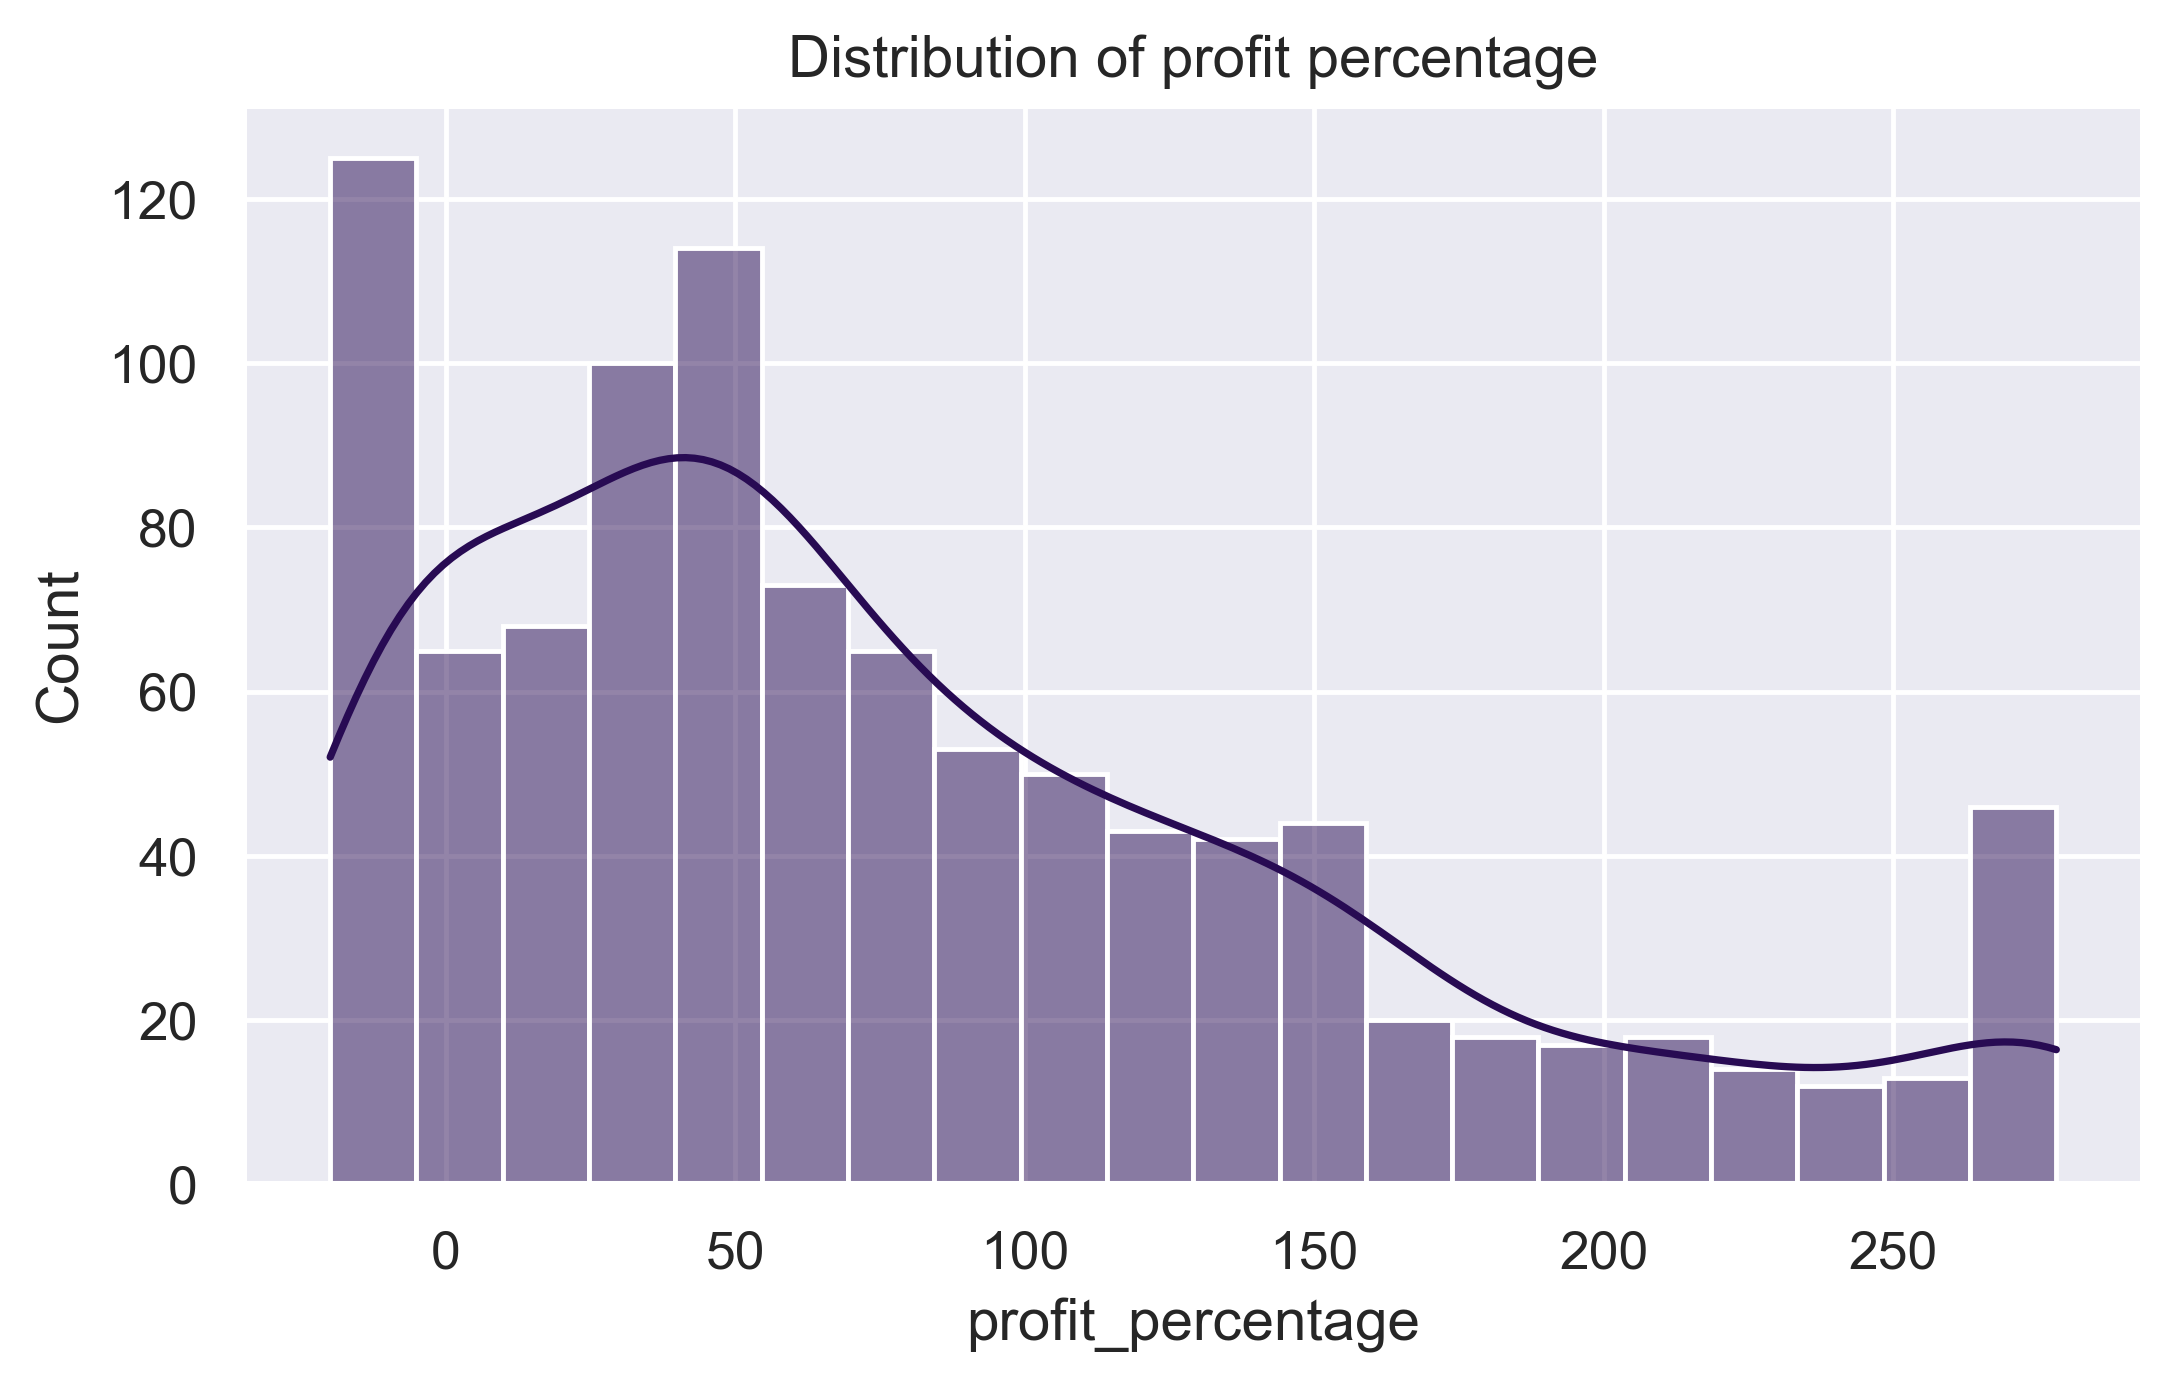

In [31]:
# creating histogram to check for the distribution profit_percentage

sns.histplot(data = df, x= 'profit_percentage', kde=True, bins = 20)
plt.title('Distribution of profit percentage')
plt.show()

**The profit percentage, following dynamic price adjustments influenced by supply and demand factors, spans from 25% to 150%. Notably, there are instances where the profit percentage turns negative, indicating that we incur losses on certain rides despite the dynamic pricing strategy**

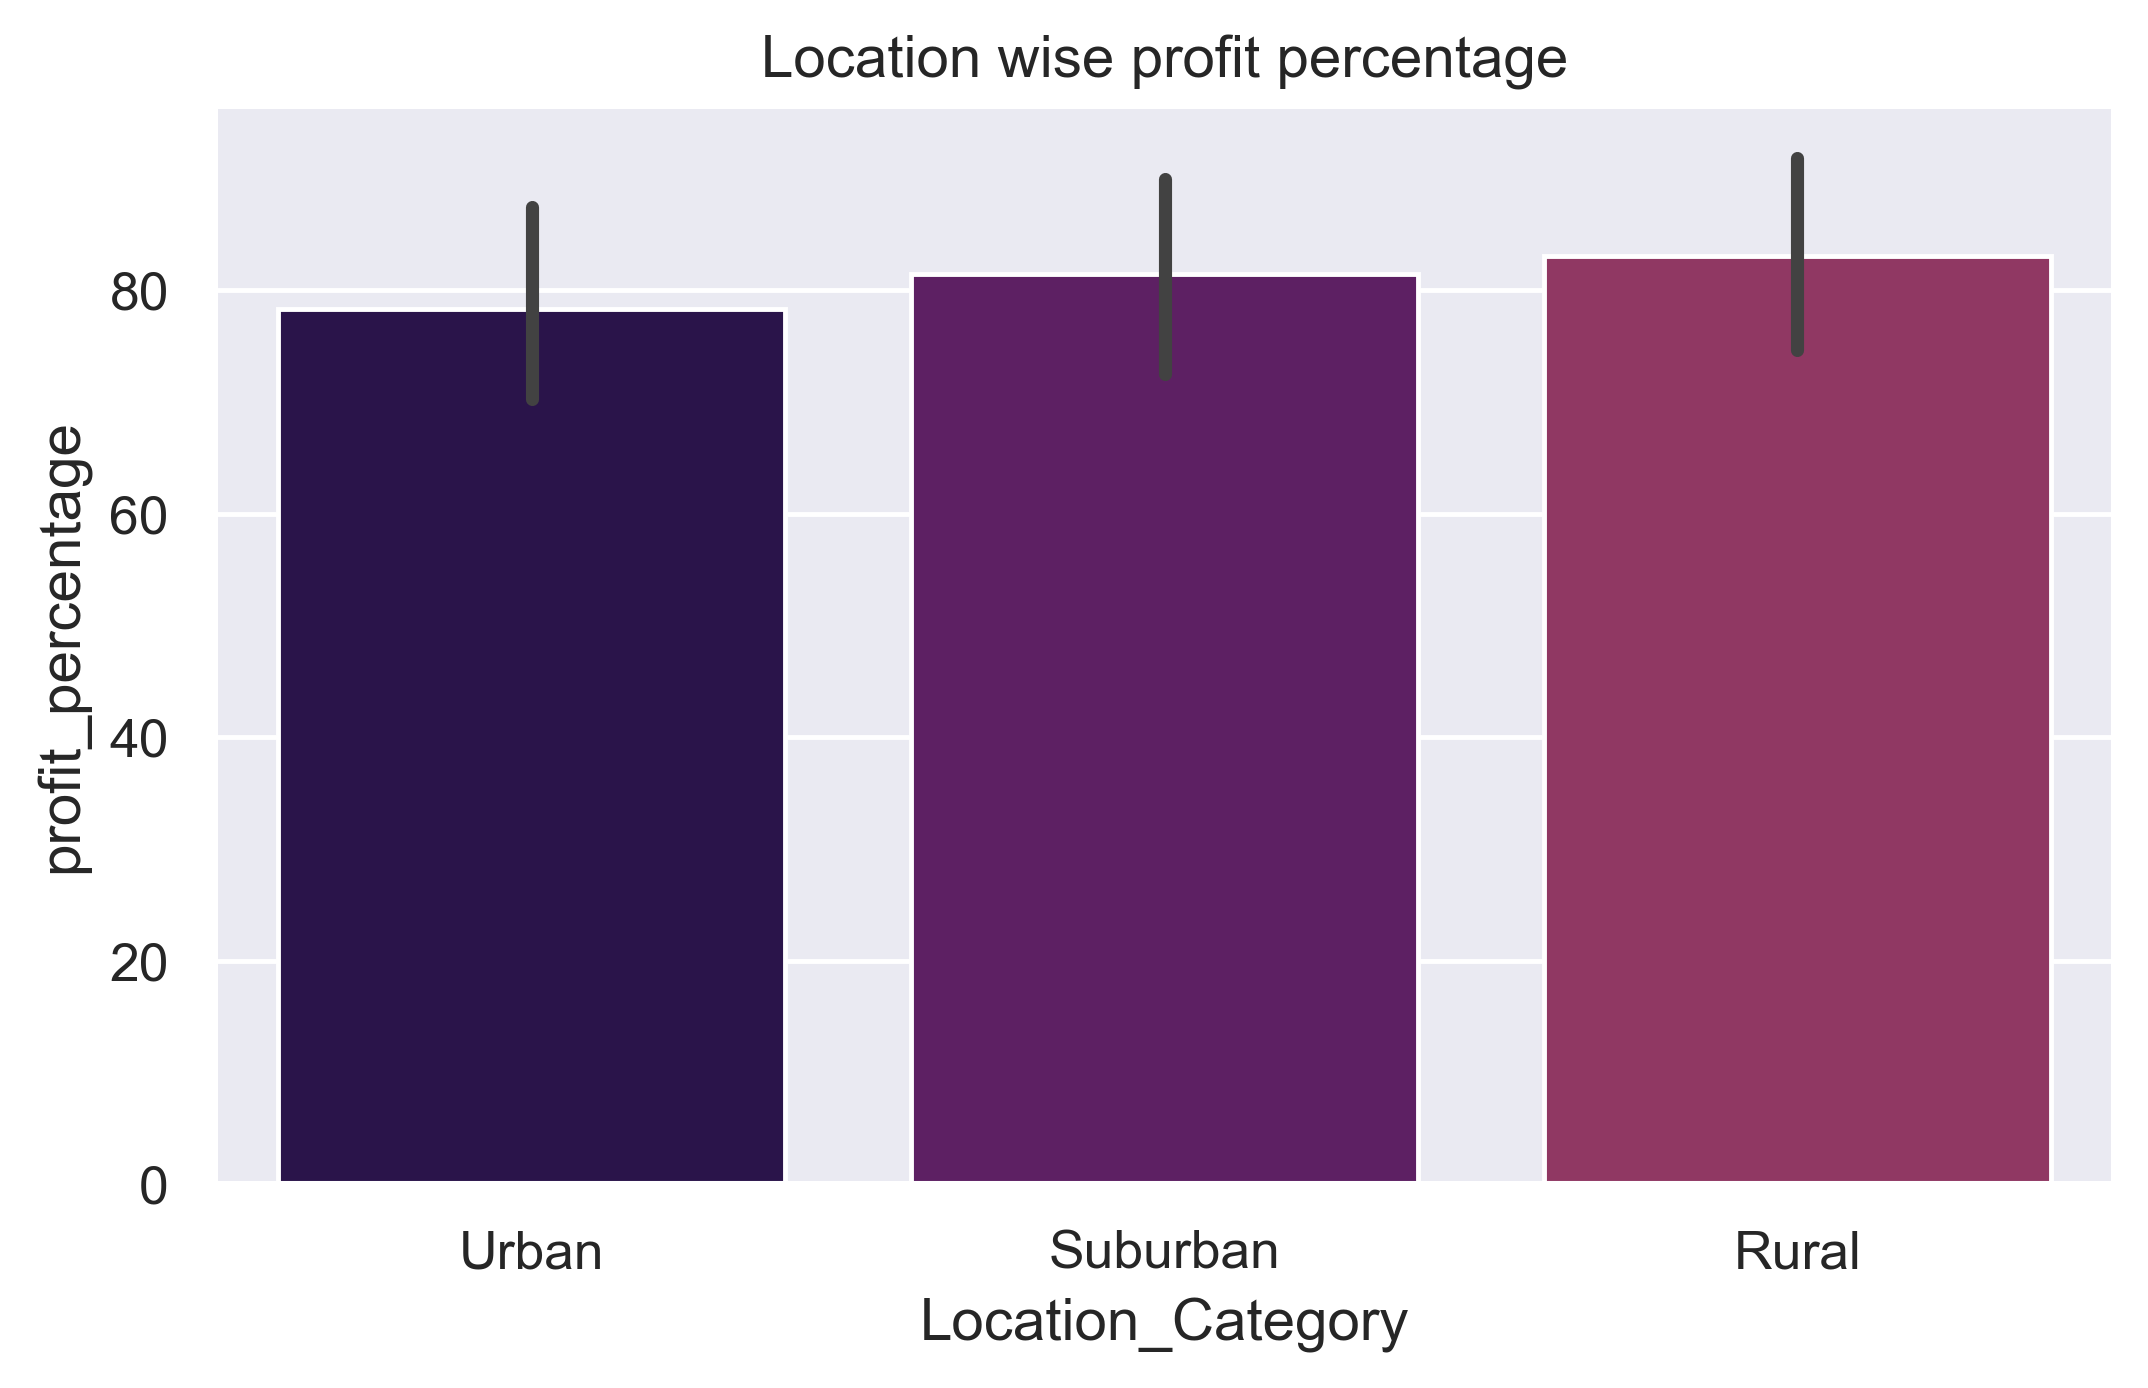

In [32]:
# creating a countplot to look for trend between location category & profit percentage

sns.barplot(data = df, x = 'Location_Category', y = 'profit_percentage')
plt.title('Location wise profit percentage')
plt.show()

**the profitability of rides varies across different location categories. rural & suburban locations give gigher profit percentages as compared to urban location**

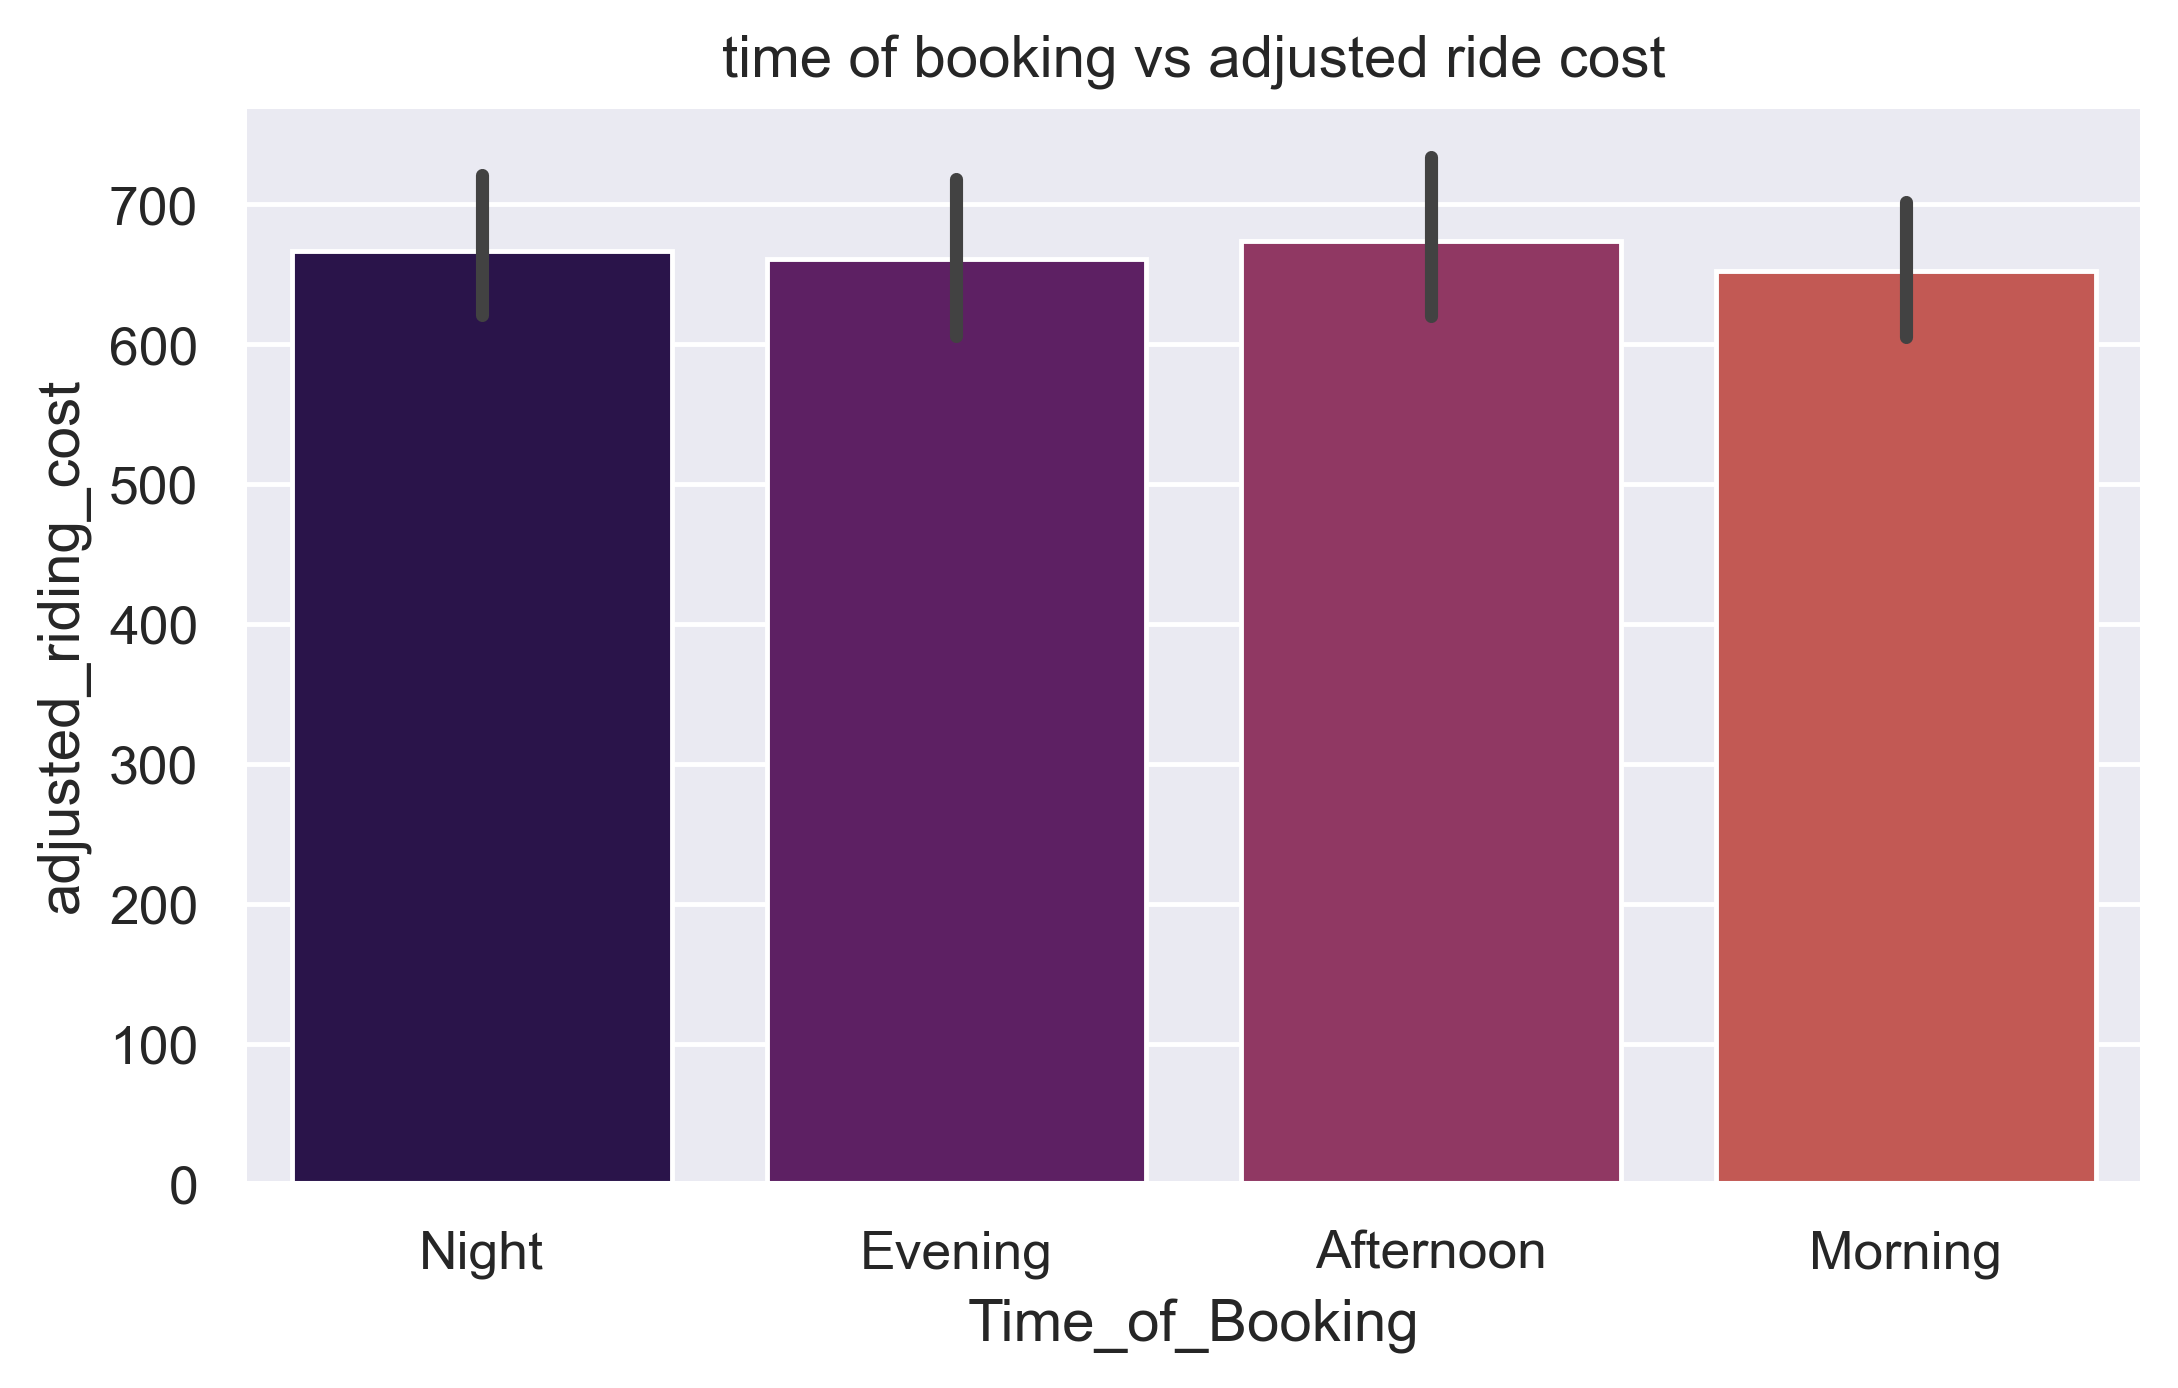

In [33]:
# creating a plot to look for trend in time of booking & adjusted riding cost

sns.barplot(data = df, x = 'Time_of_Booking', y = 'adjusted_riding_cost')
plt.title('time of booking vs adjusted ride cost')
plt.show()

**There is no significant difference in the adjusted riding cost concerning the time of booking. Across various time slots, a consistent trend is observed, indicating a similarity in the adjusted riding costS**

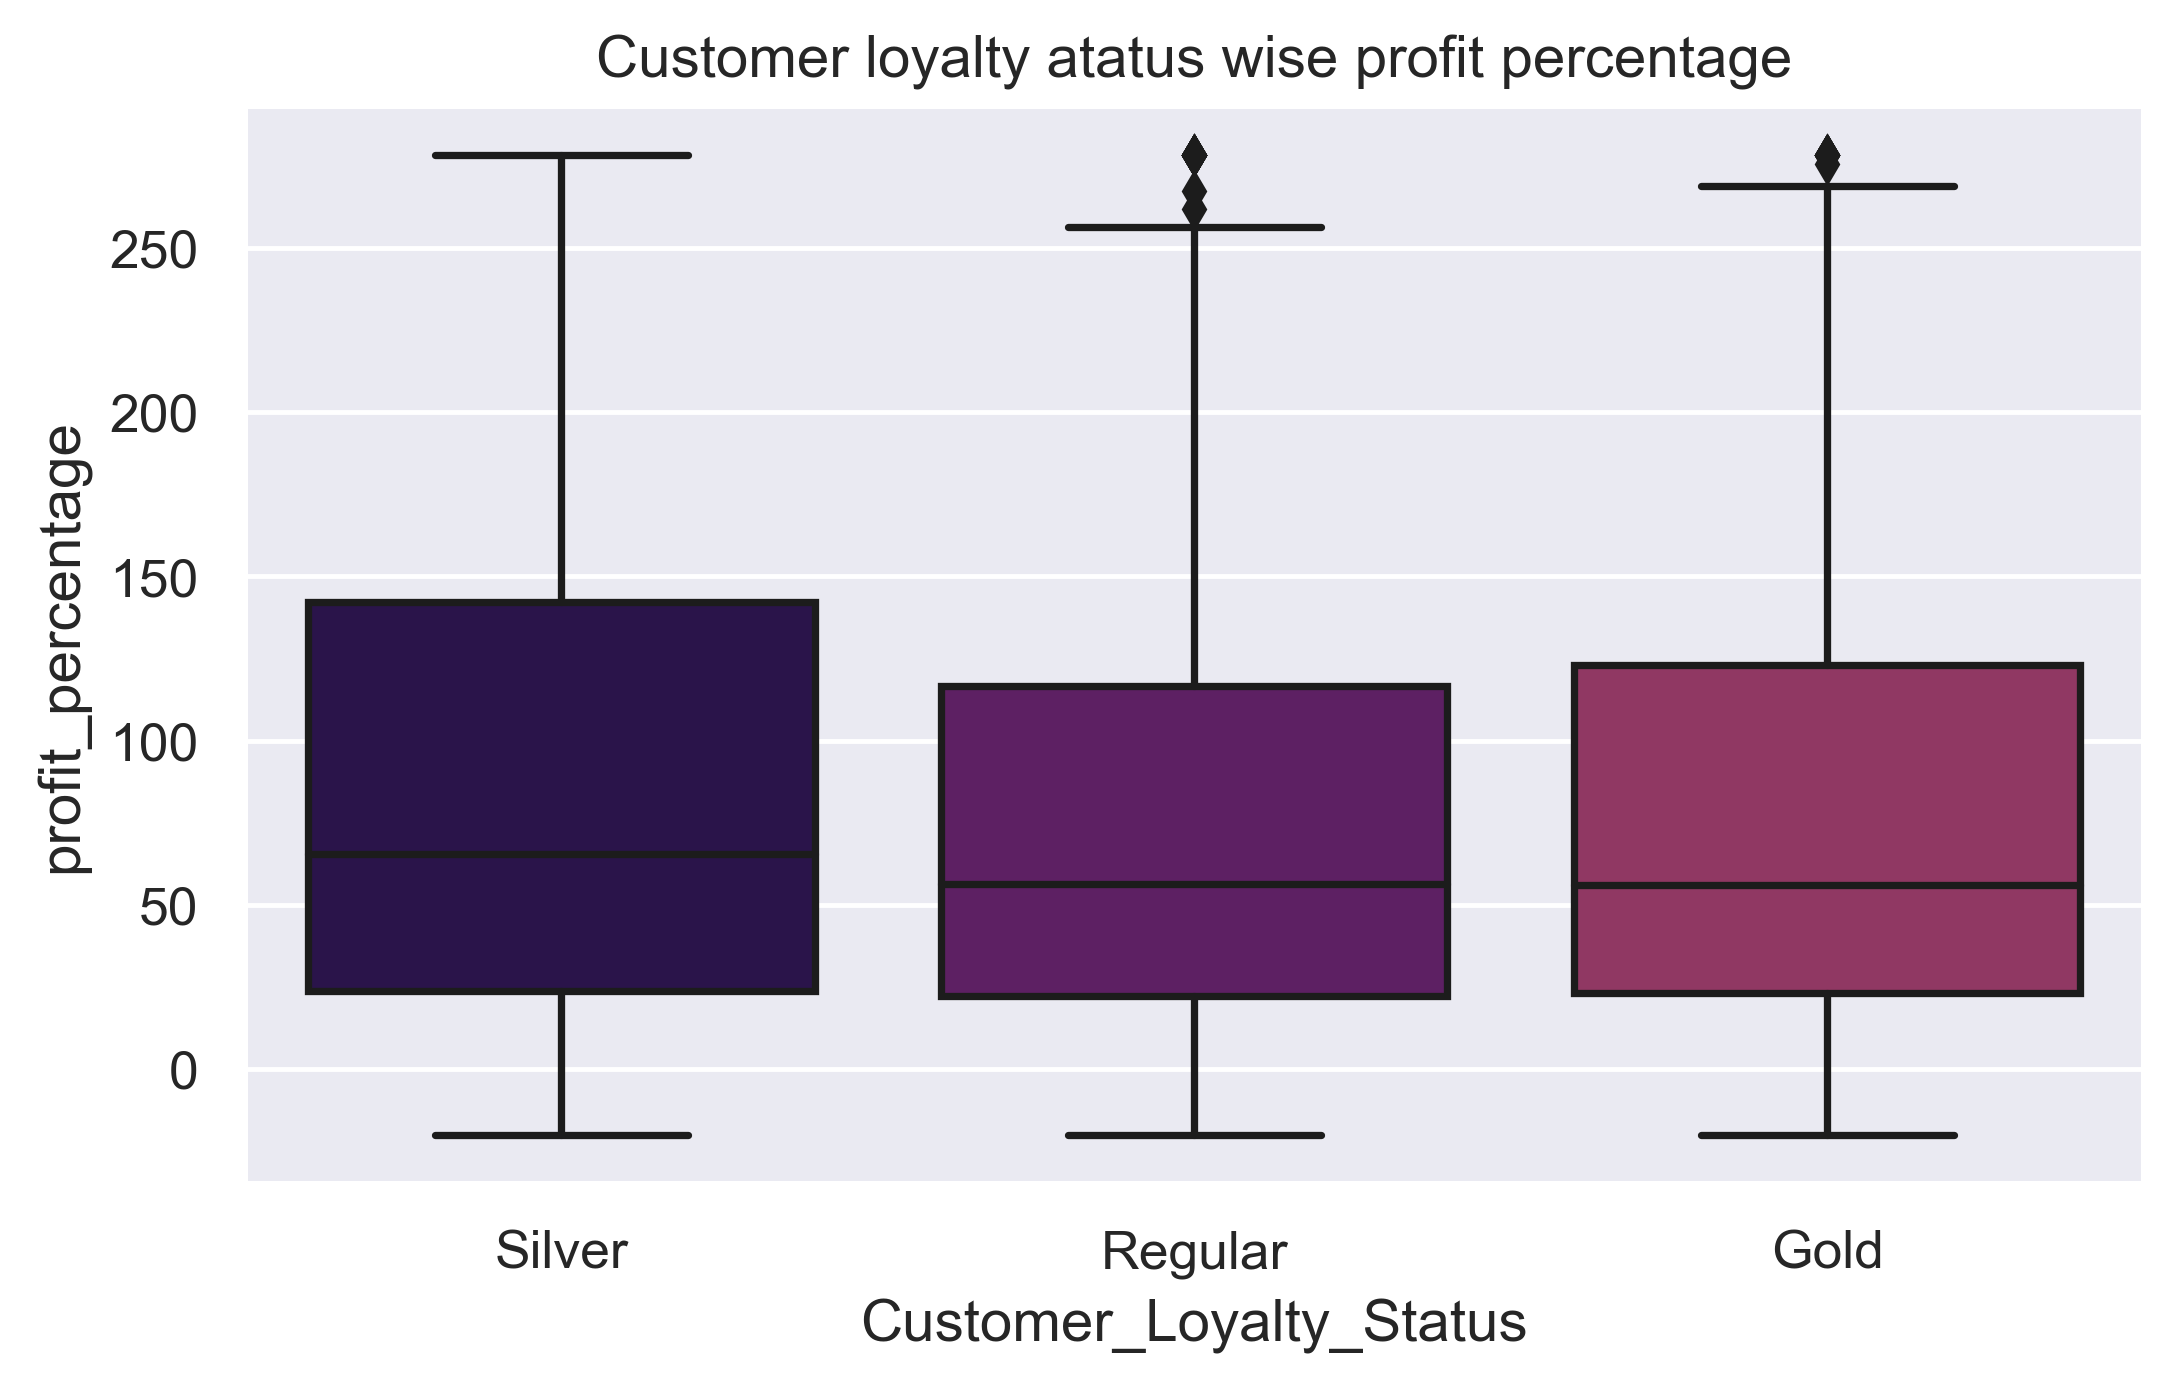

In [34]:
# boxplot ot check for customer loyalty wise profit percentage 

sns.boxplot(data = df, x = 'Customer_Loyalty_Status', y = 'profit_percentage')
plt.title('Customer loyalty atatus wise profit percentage')
plt.show()

**The profit percentage is slightly higher among customers holding a silver loyalty status, with gold members having the second-highest profit percentage**

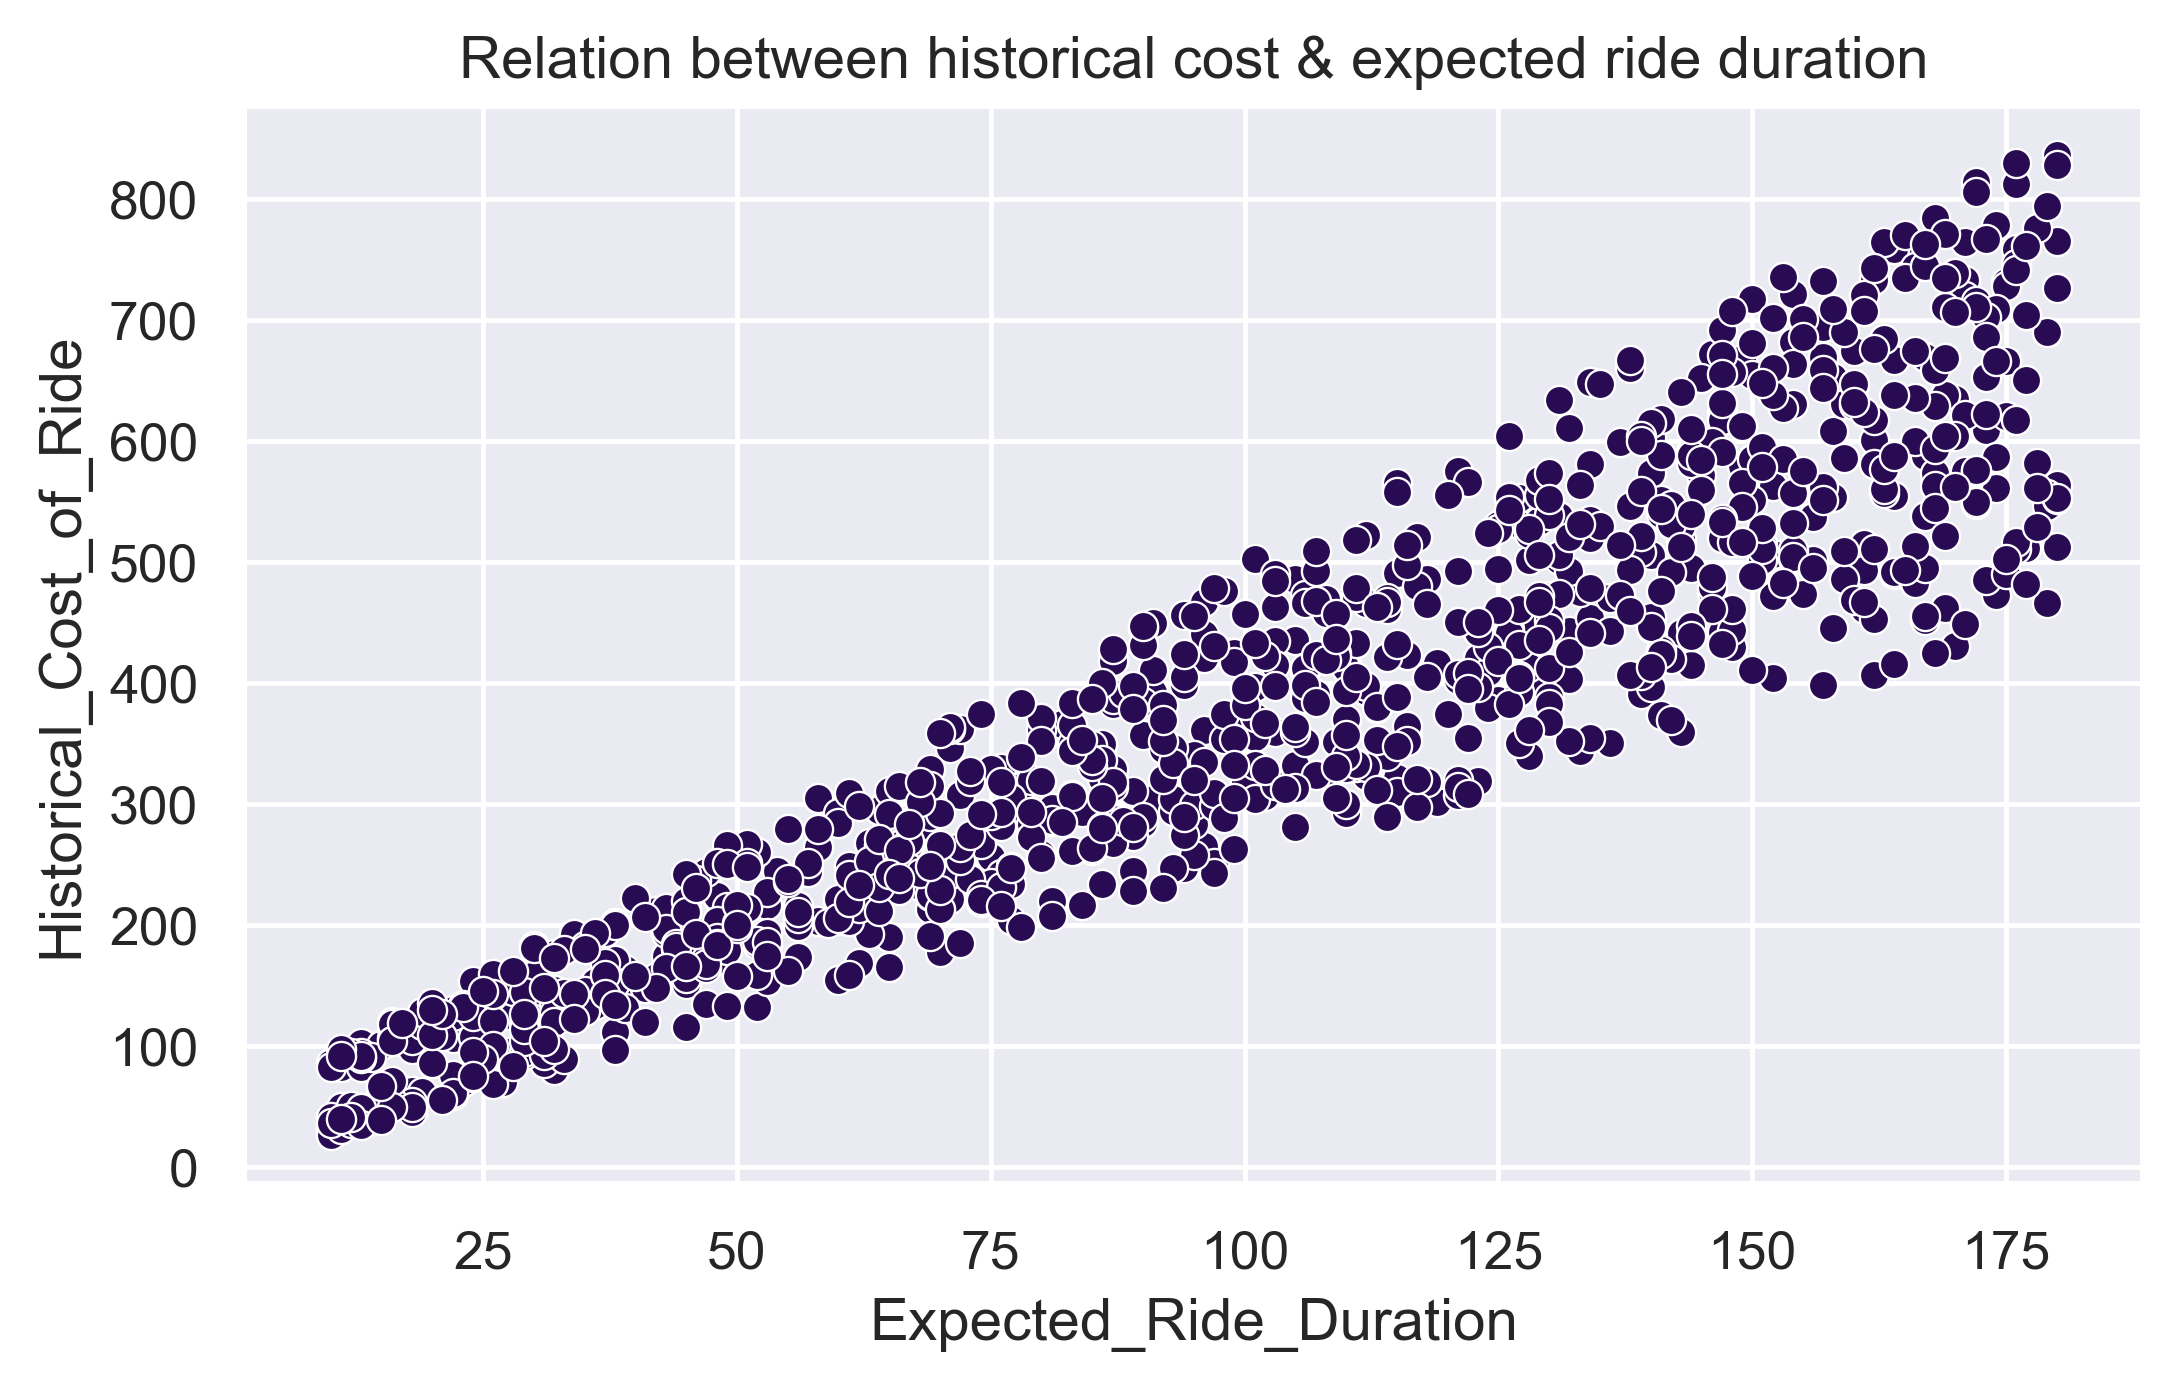

In [35]:
# scatterplot to check for relationship between historical cost & excpected ride duration

sns.scatterplot(data = df, x = 'Expected_Ride_Duration', y = 'Historical_Cost_of_Ride')
plt.title('Relation between historical cost & expected ride duration')
plt.show()

**There exists a strong linear relationship between the historical cost of a ride and its expected duration. As the ride duration increases, there is a corresponding increase in the cost of that ride.**

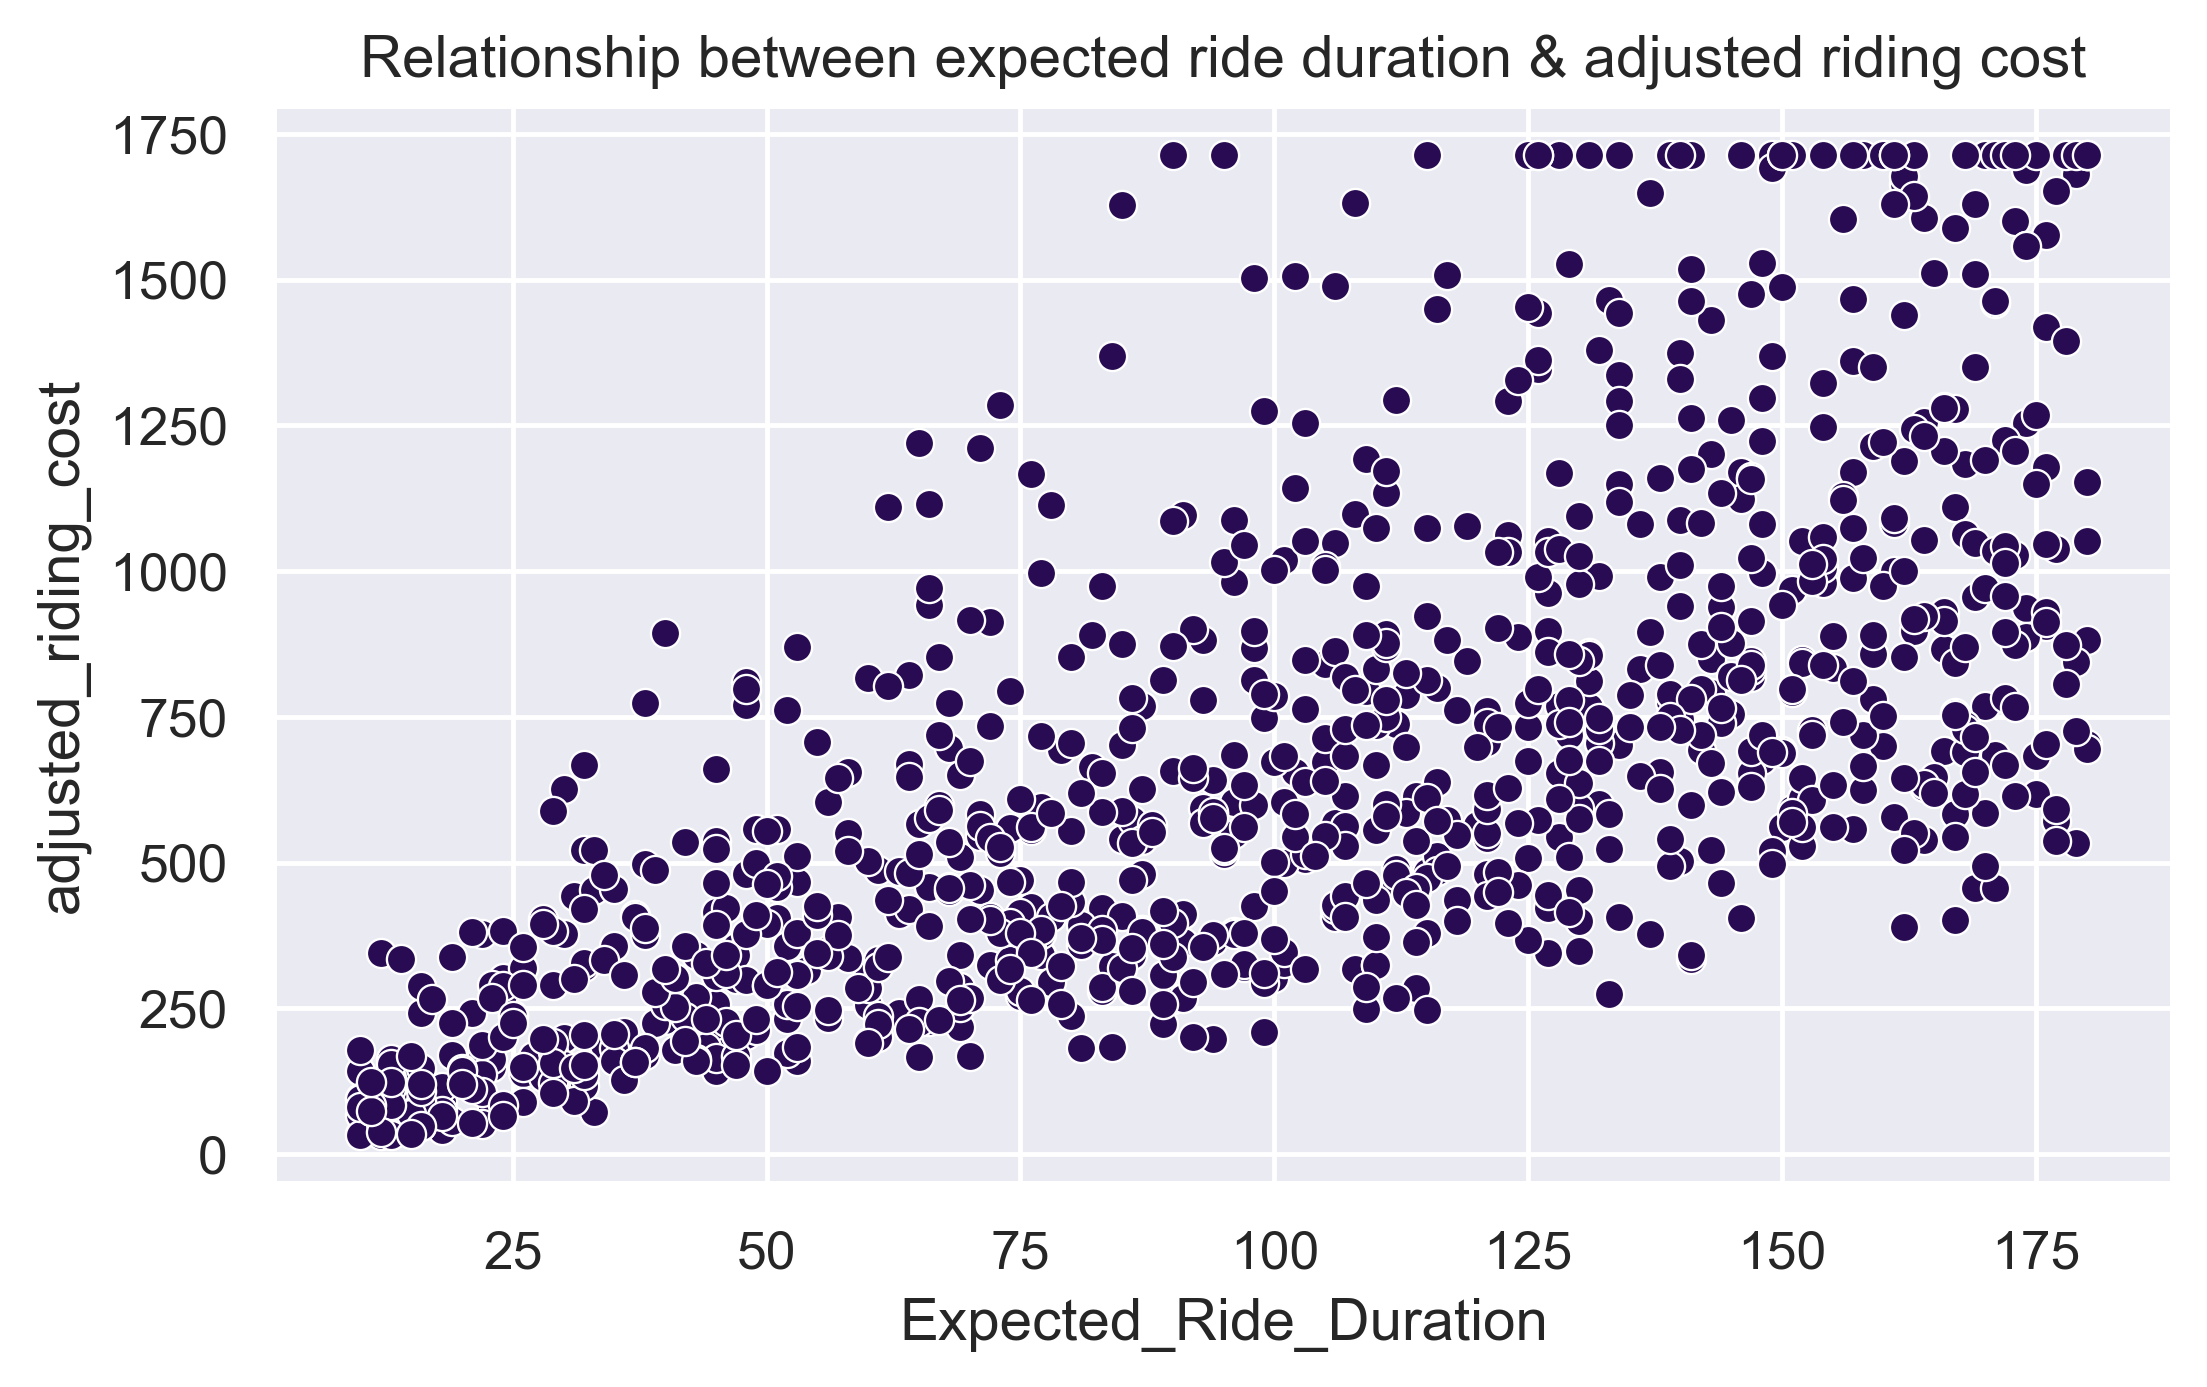

In [36]:
# scatterplot to find the trend between expected ride duration & adjusted riding cost
sns.scatterplot(data = df, x='Expected_Ride_Duration', y='adjusted_riding_cost')
plt.title('Relationship between expected ride duration & adjusted riding cost')
plt.show()

**there is a moderate linear relationship bwrtween adjusted ride cost & Expected ride duration, as the duration increases there is corresponding increase in riding cost**

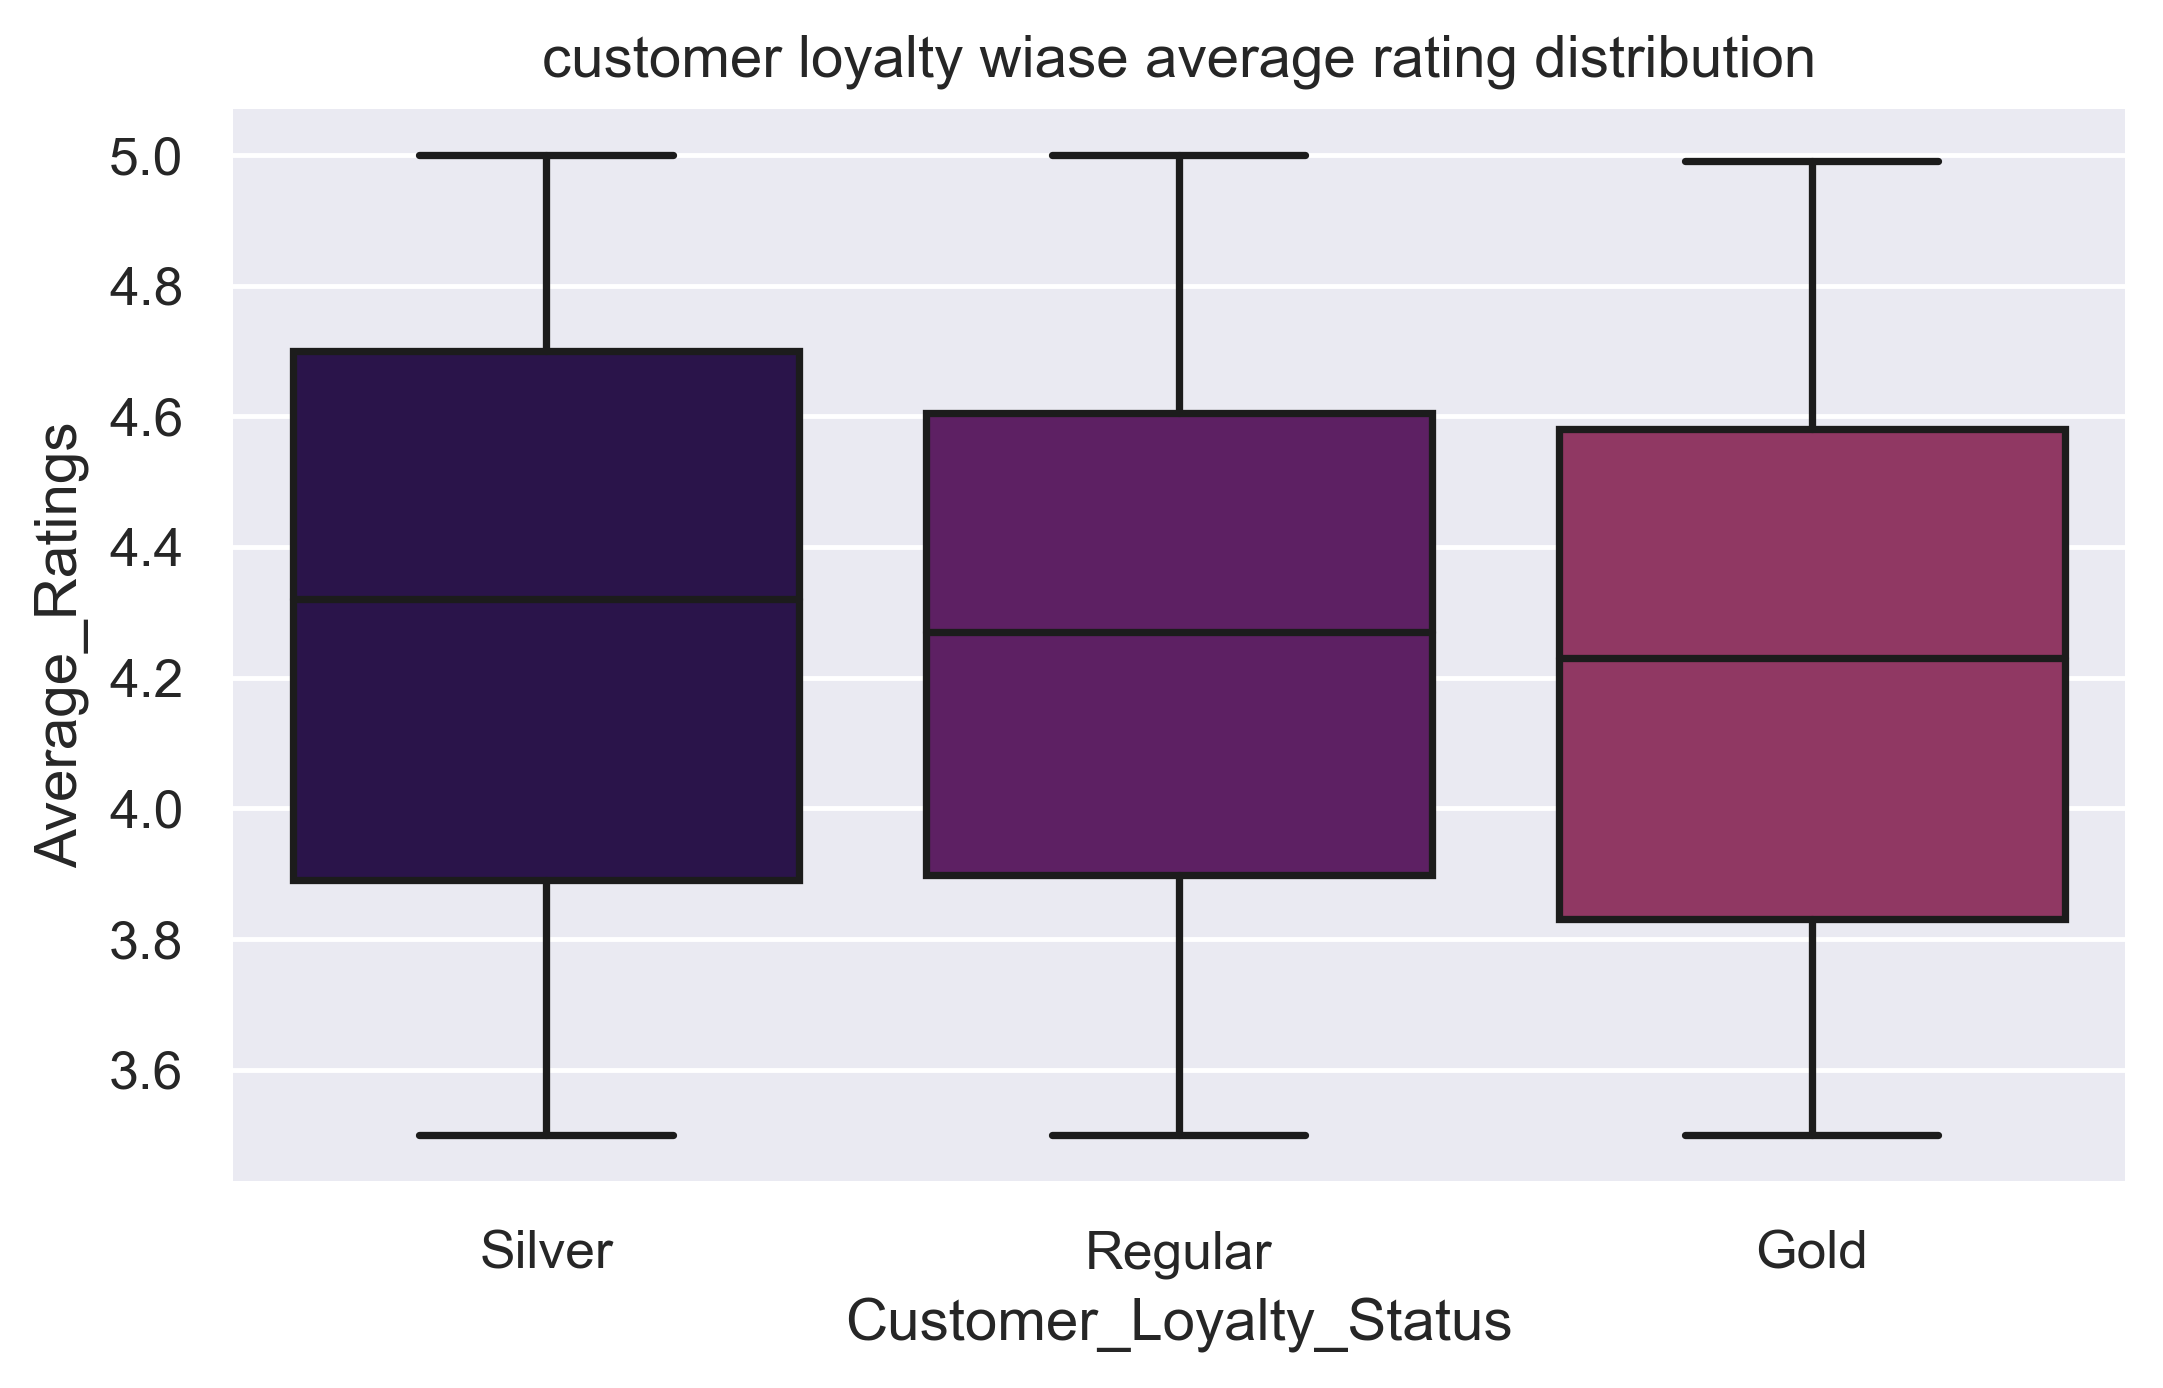

In [37]:
sns.boxplot(data = df, x = 'Customer_Loyalty_Status', y = 'Average_Ratings')
plt.title('customer loyalty wiase average rating distribution')
plt.show()

**Customers across all loyalty programs consistently provide similar ratings for rides, suggesting that the services offered by the company are consistently of high quality across all loyalty program**

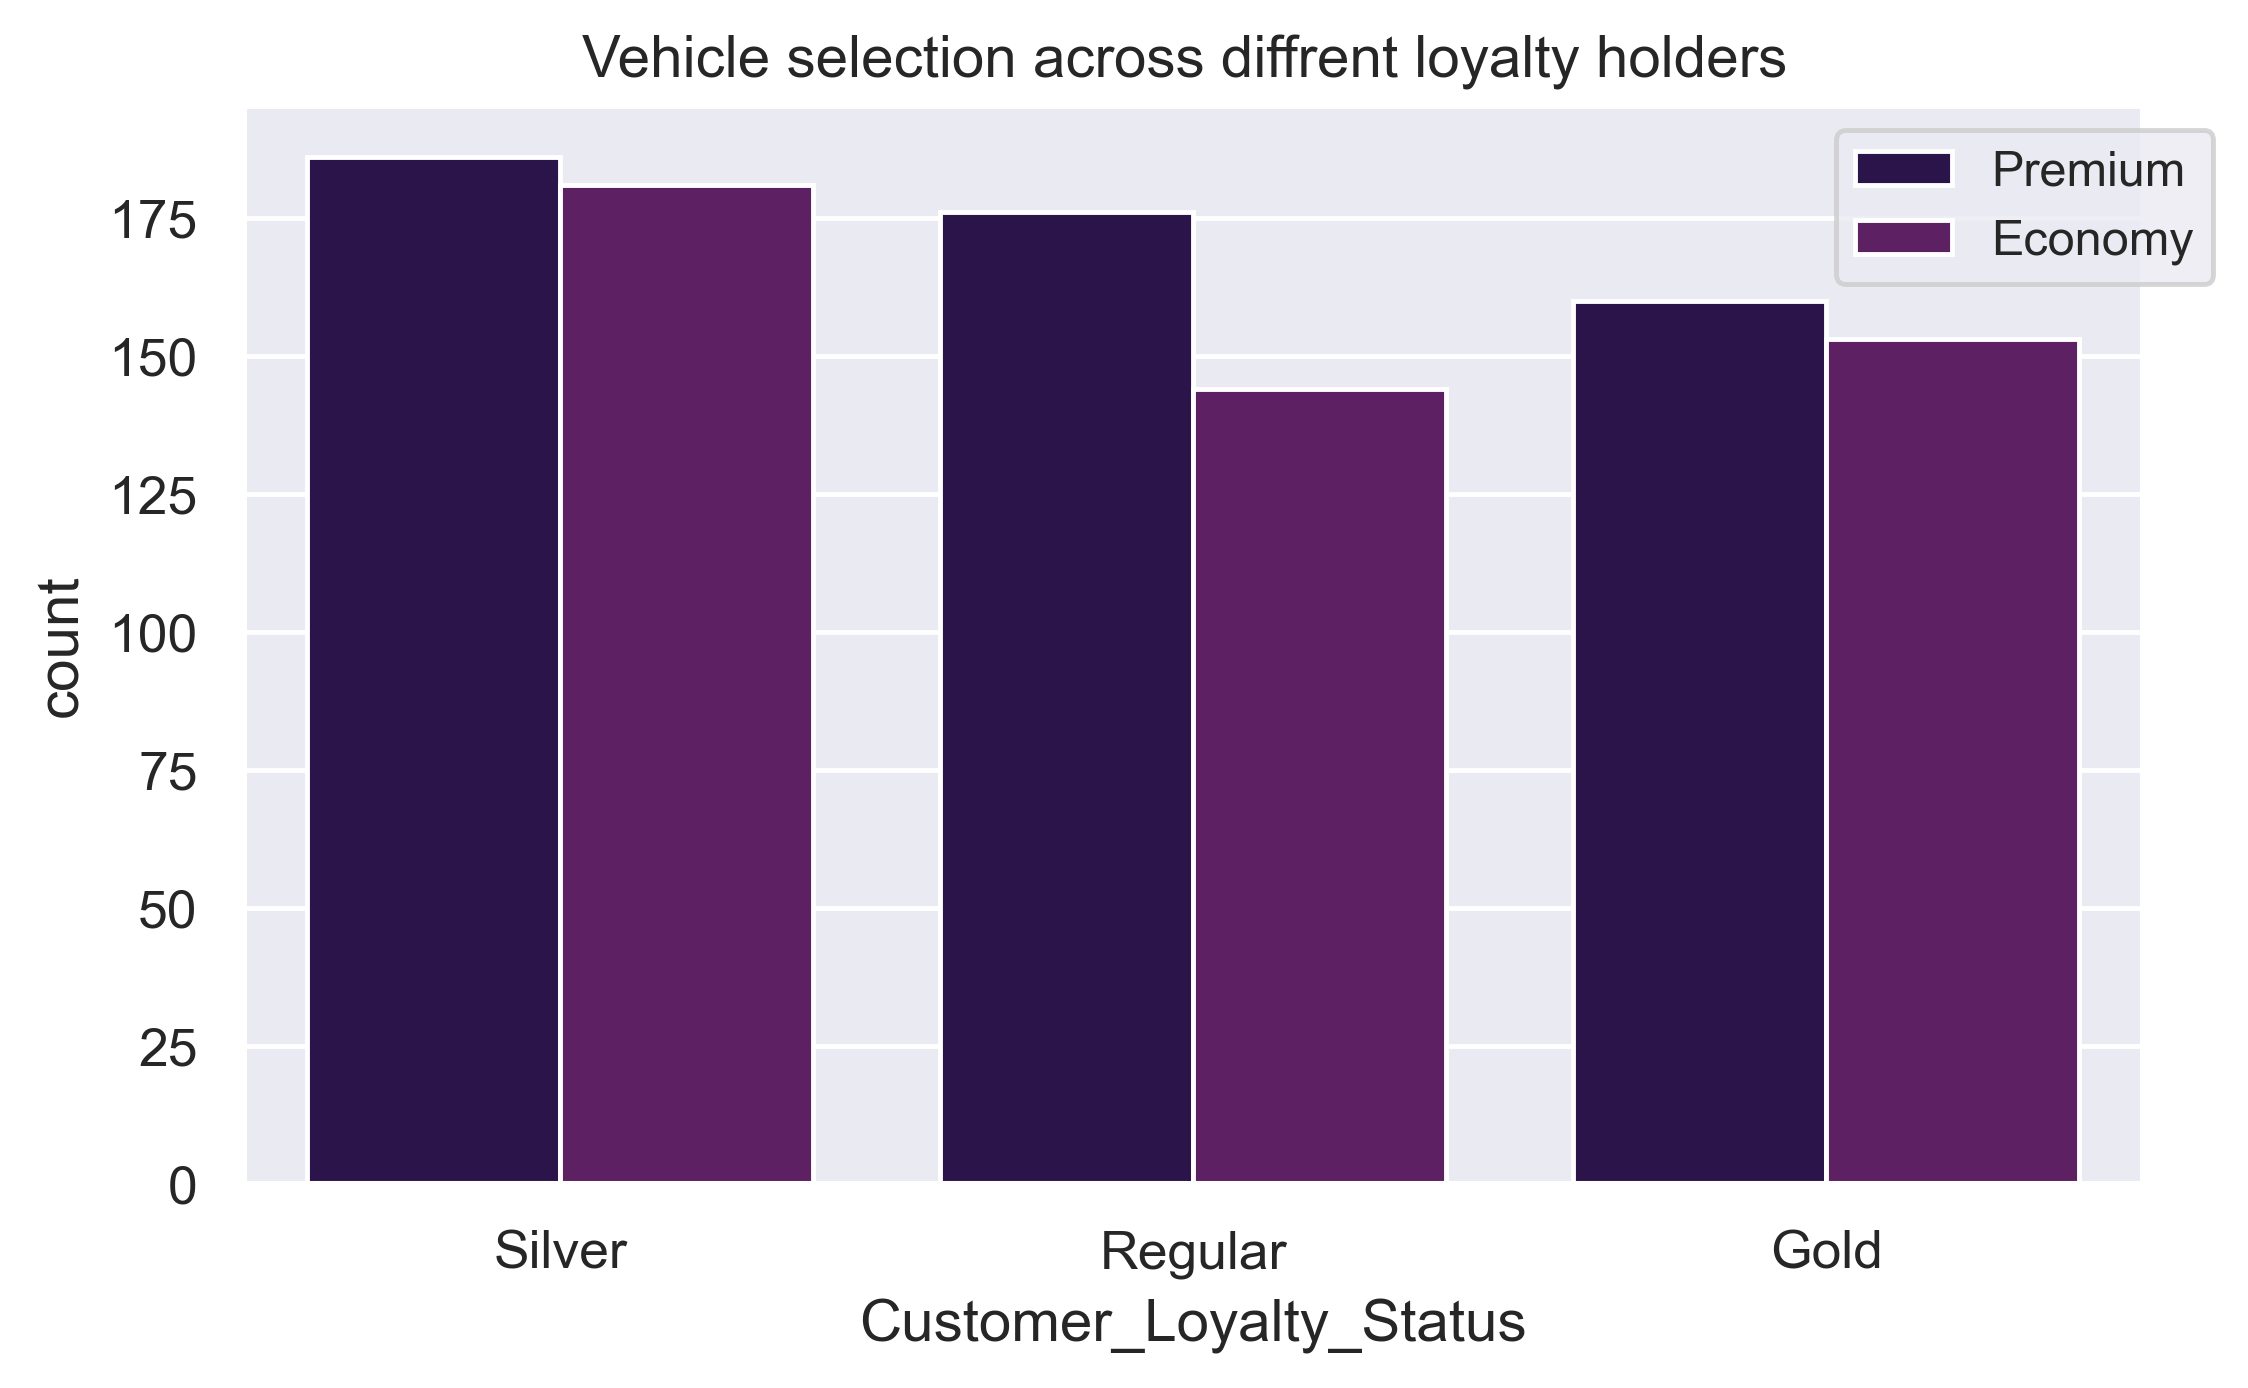

In [38]:
ax = sns.countplot(data = df, x = 'Customer_Loyalty_Status', hue= 'Vehicle_Type')
plt.title('Vehicle selection across diffrent loyalty holders ')
ax.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.5, fontsize='small')
plt.show()

**Customers across all loyalty programs exhibit a preference for premium vehicle types over economy options. Notably, there is a significant difference in the preference for premium over economy vehicle types among regular customers who do not hold any loyalty status**

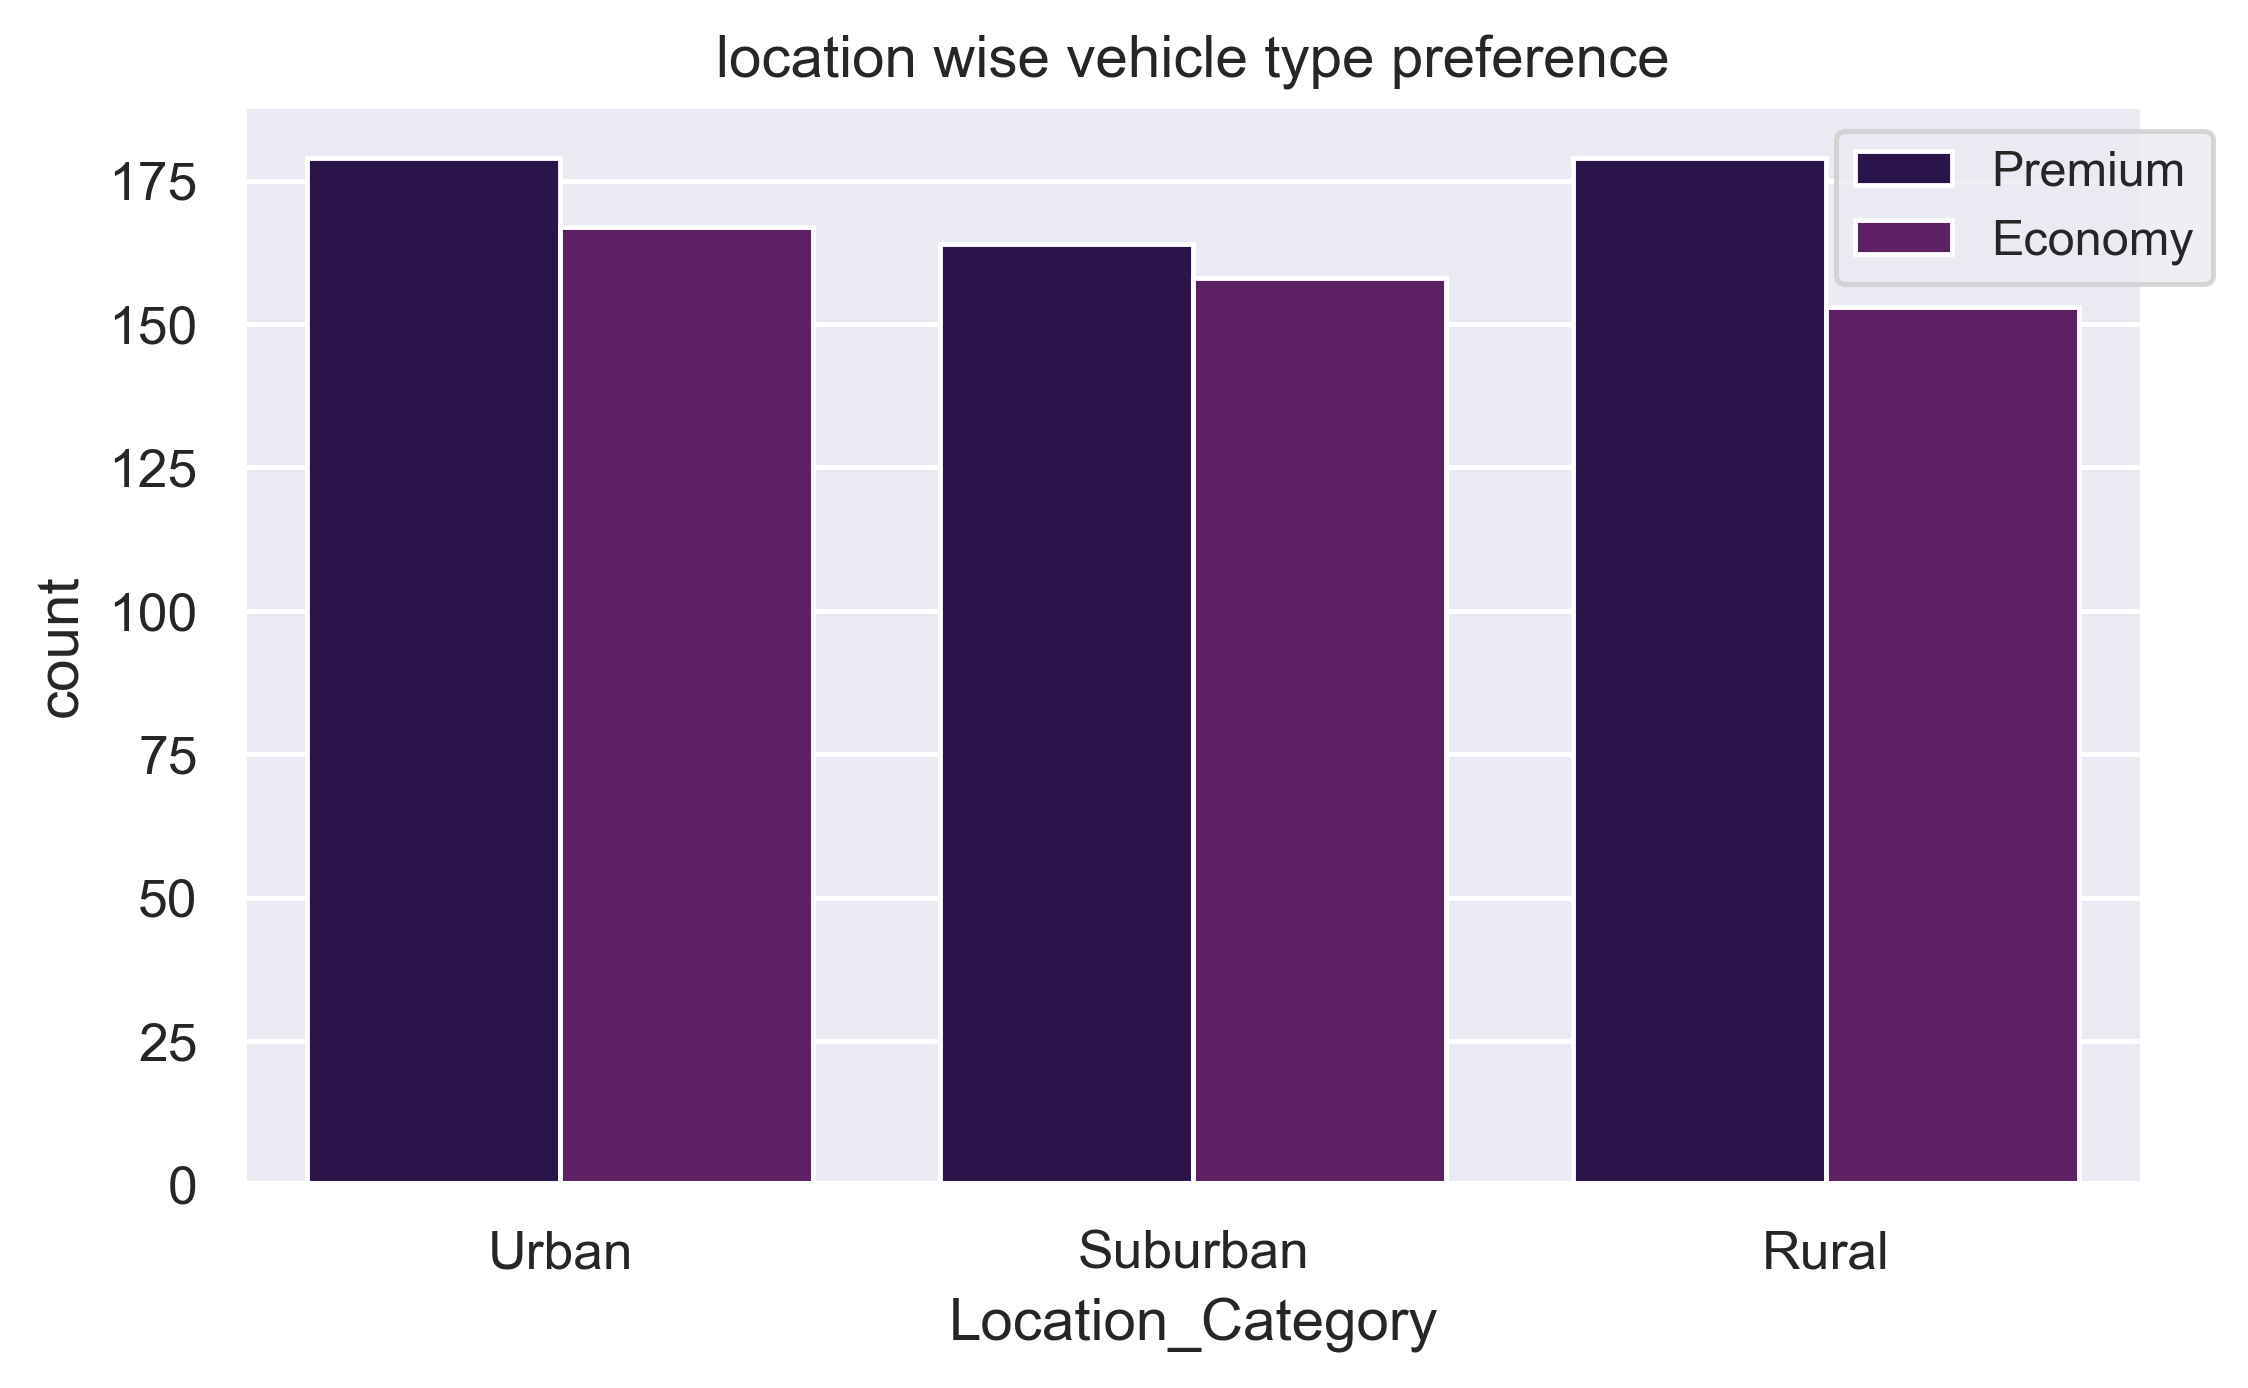

In [39]:
ax = sns.countplot(data = df, x = 'Location_Category', hue= 'Vehicle_Type')
ax.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.5, fontsize='small')
plt.title('location wise vehicle type preference')
plt.show()

**Customers across all location type exhibit a preference for premium vehicle types over economy options.**

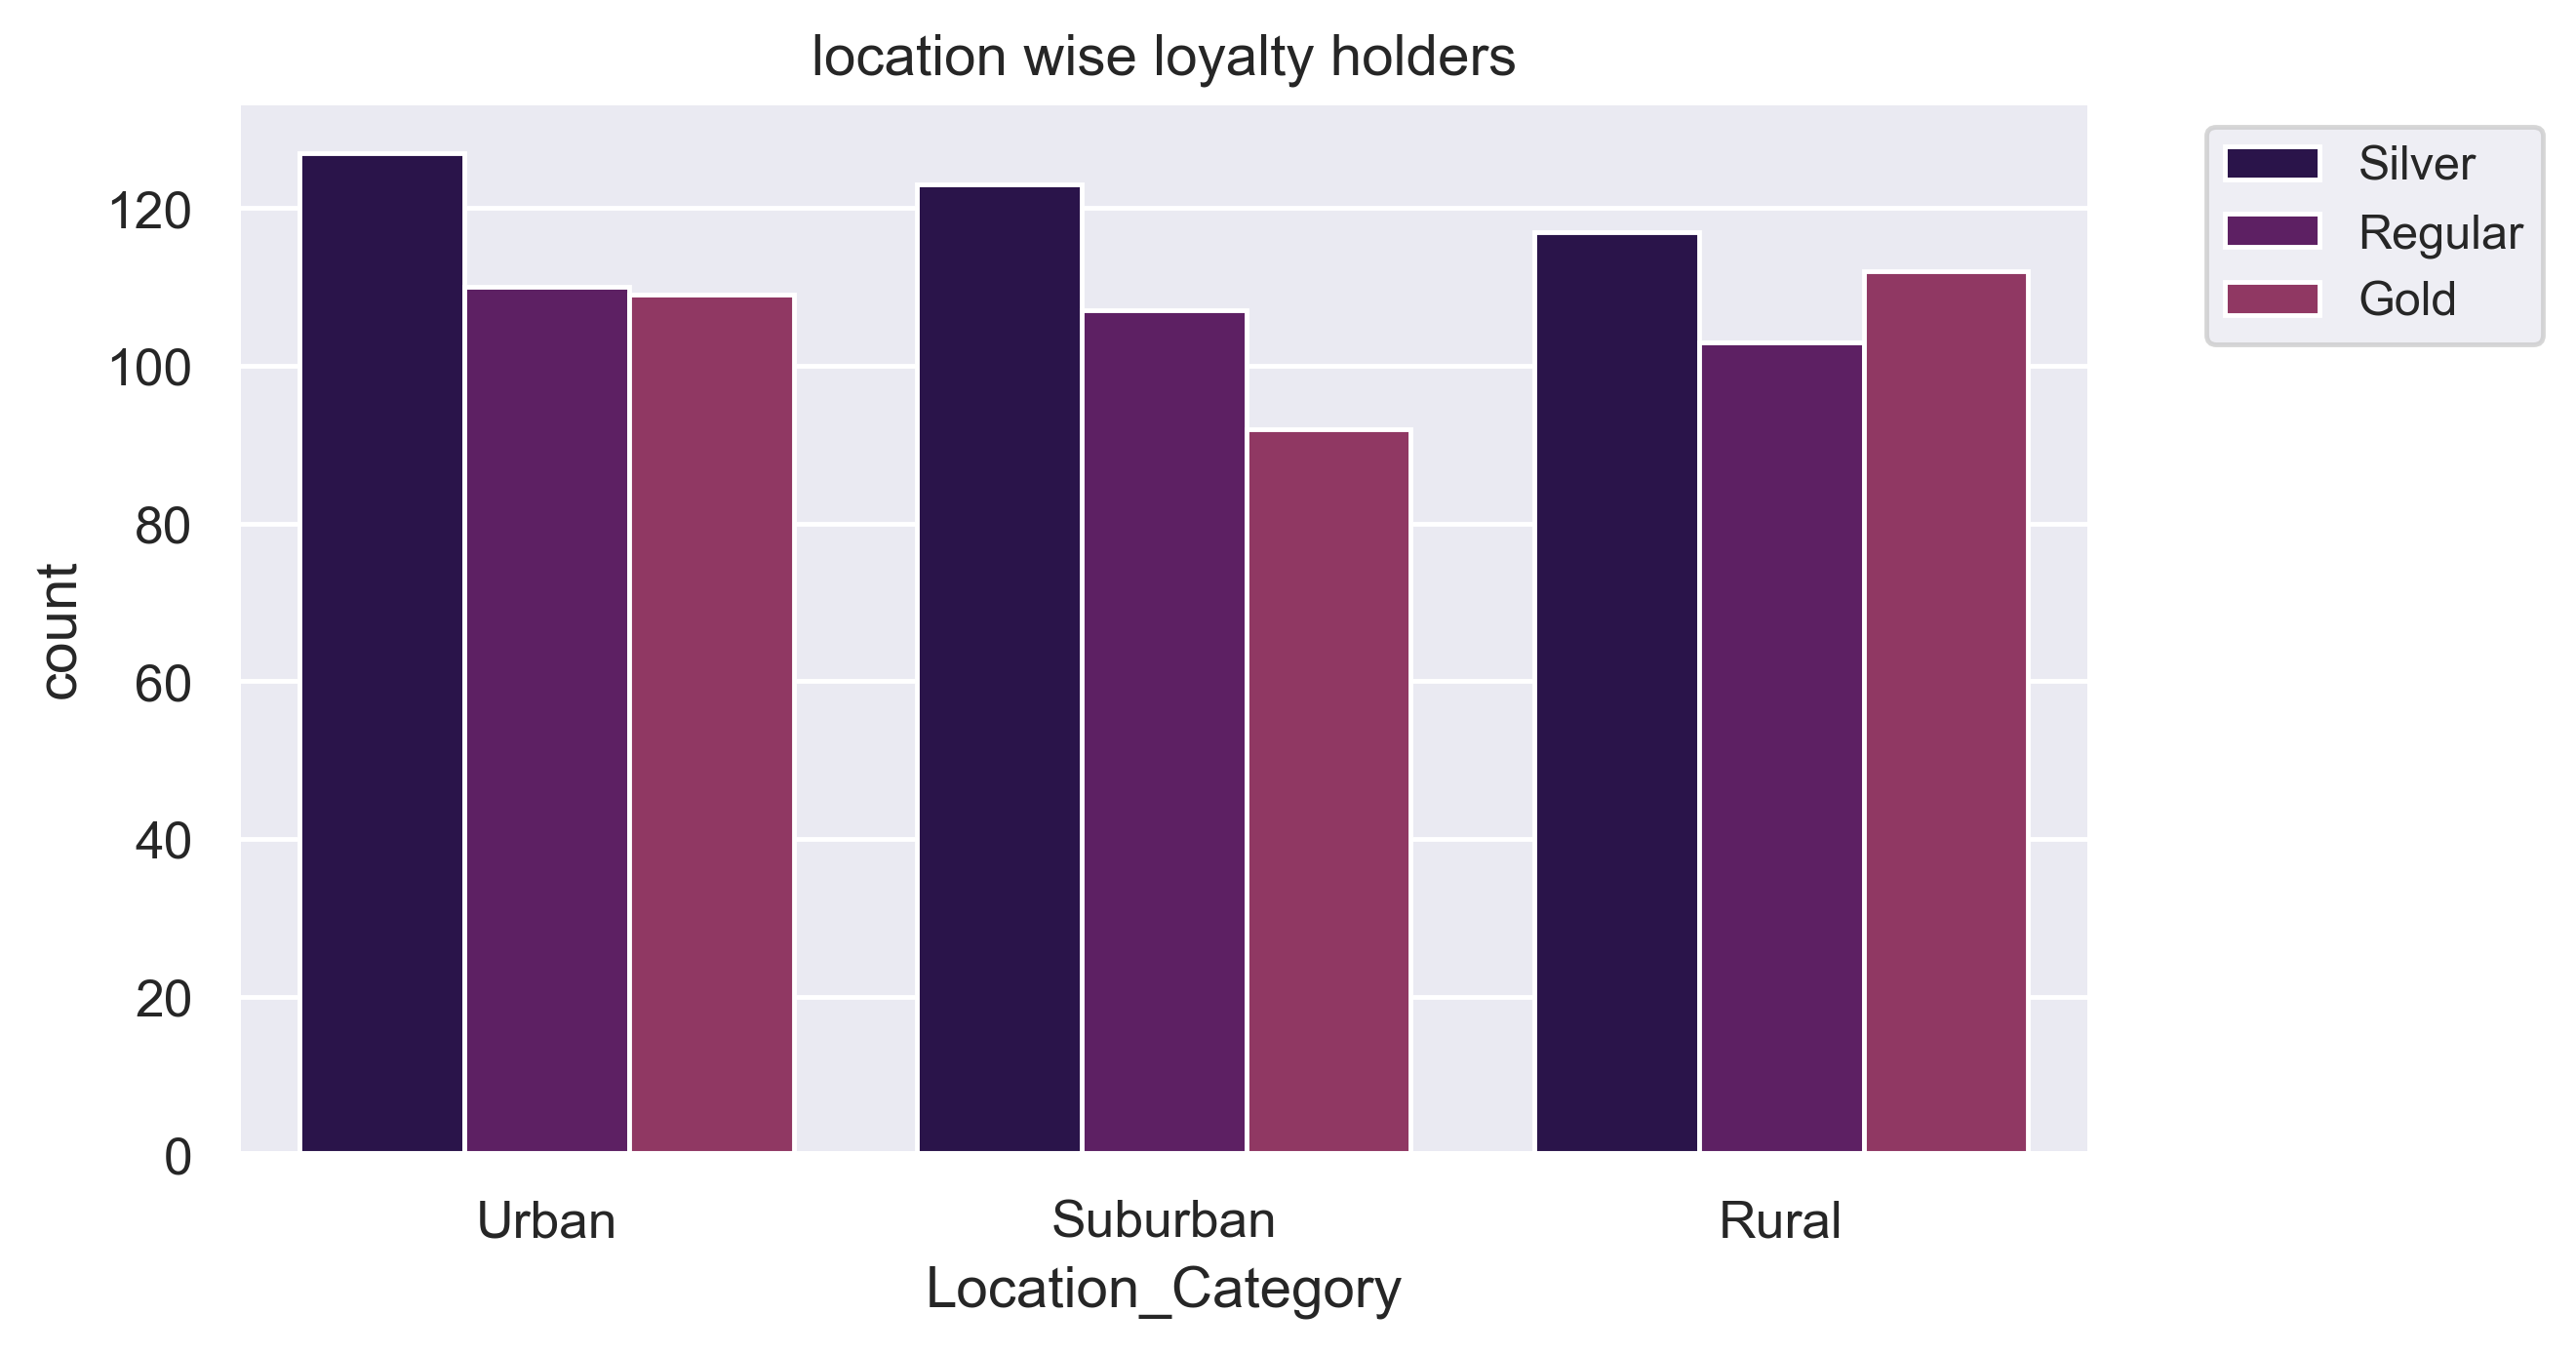

In [40]:
ax = sns.countplot(data = df, x = 'Location_Category', hue= 'Customer_Loyalty_Status')
ax.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.5, fontsize='small')
plt.title('location wise loyalty holders')
plt.show()

**Surprisingly, there is a higher number of Gold membership holders in rural areas compared to urban and suburban areas. Conversely, Silver membership holders dominate in count across all location types.**

In [41]:
# Calculate the count of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)

In [42]:
labels = ['Profitable Rides', 'Loss Rides']
values = [profitable_count, loss_count]

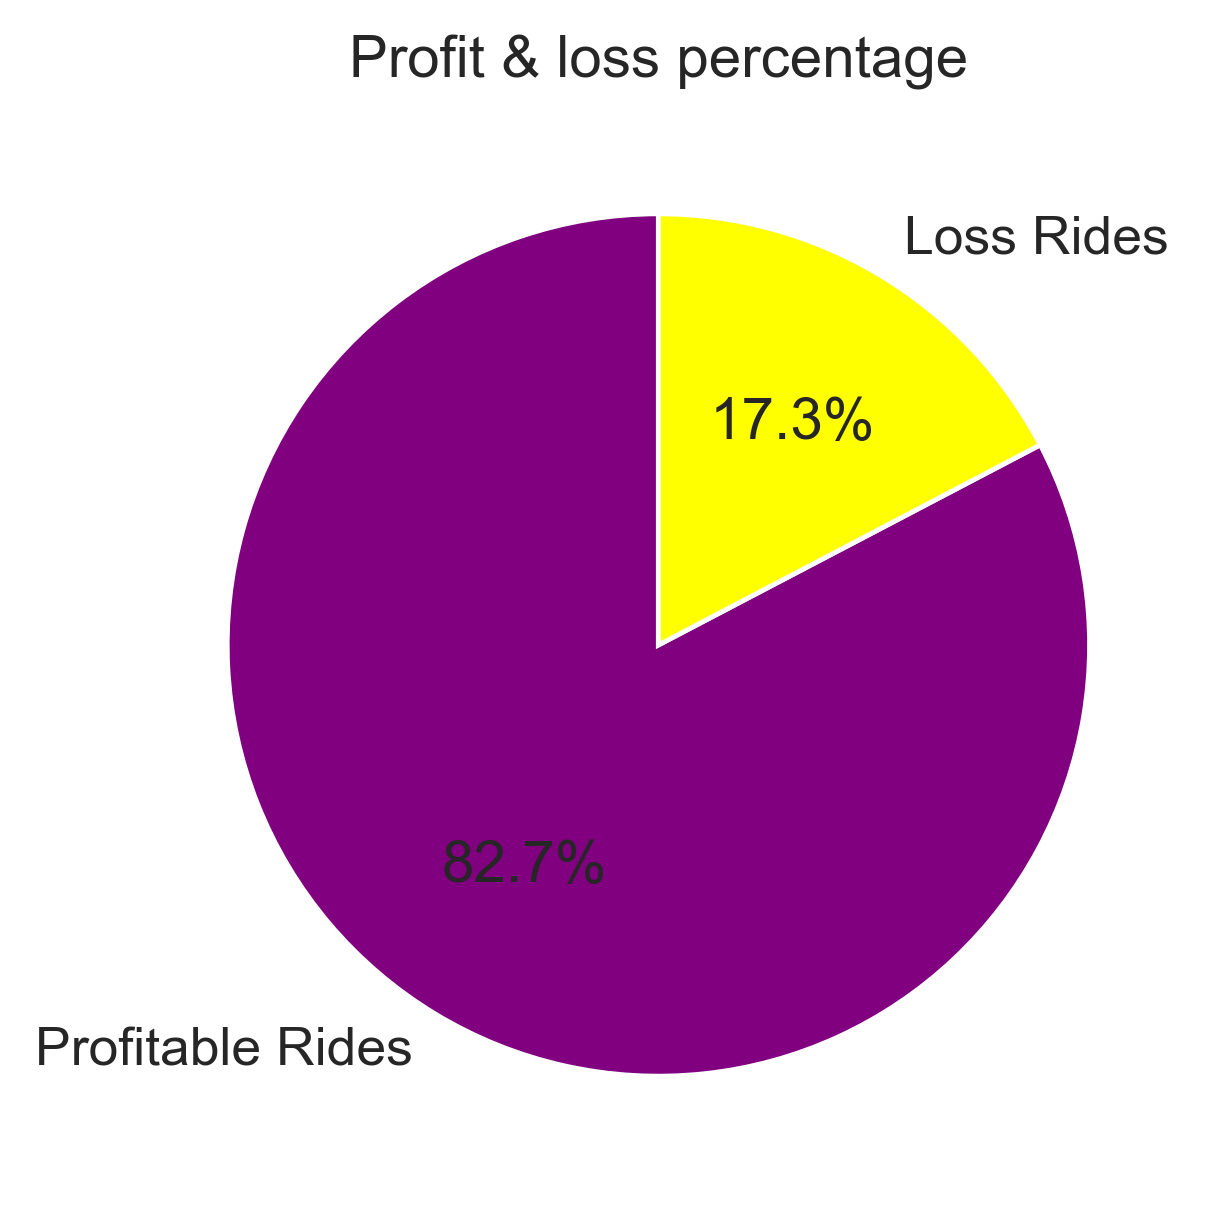

In [43]:
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['purple', 'yellow'])
plt.title('Profit & loss percentage')
plt.show()

**Among all the rides, approximately 82.7% are profitable, indicating that the company generates revenue from these rides. Conversely, the company incurs a loss from approximately 17.3% of rides.**

## Key Insights

Cost Distribution: Adjusted riding costs typically range from 250 to 800, with occasional spikes, potentially indicating outliers or specific influencing factors.

Profitability: Profit percentages range from 25% to 150%, with occasional negative percentages, indicating losses on certain rides despite dynamic pricing.

Location Impact on Profitability:Rural and suburban locations tend to yield higher profit percentages compared to urban areas.

Time of Booking:No significant variation in adjusted riding costs is observed based on the time of booking.
 
Loyalty Status Influence:Silver loyalty status holders show slightly higher profit percentages, and gold members follow closely.

Linear Relationships: Strong linear relationship between historical cost and ride duration.
Moderate linear relationship between adjusted ride cost and expected duration.

Consistent Ratings: Consistent high-quality ratings across all loyalty programs.

Vehicle Type Preference: Consistent preference for premium vehicle types over economy options.

Membership Distribution:Surprising distribution of Gold membership holders in rural areas.

Profitable vs. Loss-Making Rides:About 82.7% of rides are profitable, while approximately 17.3% incur loss

### Data Preprocessing

In [44]:
df['Vehicle_Type'].value_counts()

Premium    522
Economy    478
Name: Vehicle_Type, dtype: int64

### feature encoding

In [45]:
# performing label encoding on revenue (target) column

label_encoder = LabelEncoder()
df['Vehicle_Type'] = label_encoder.fit_transform(df['Vehicle_Type'])

In [46]:
df['Vehicle_Type'].value_counts()

1    522
0    478
Name: Vehicle_Type, dtype: int64

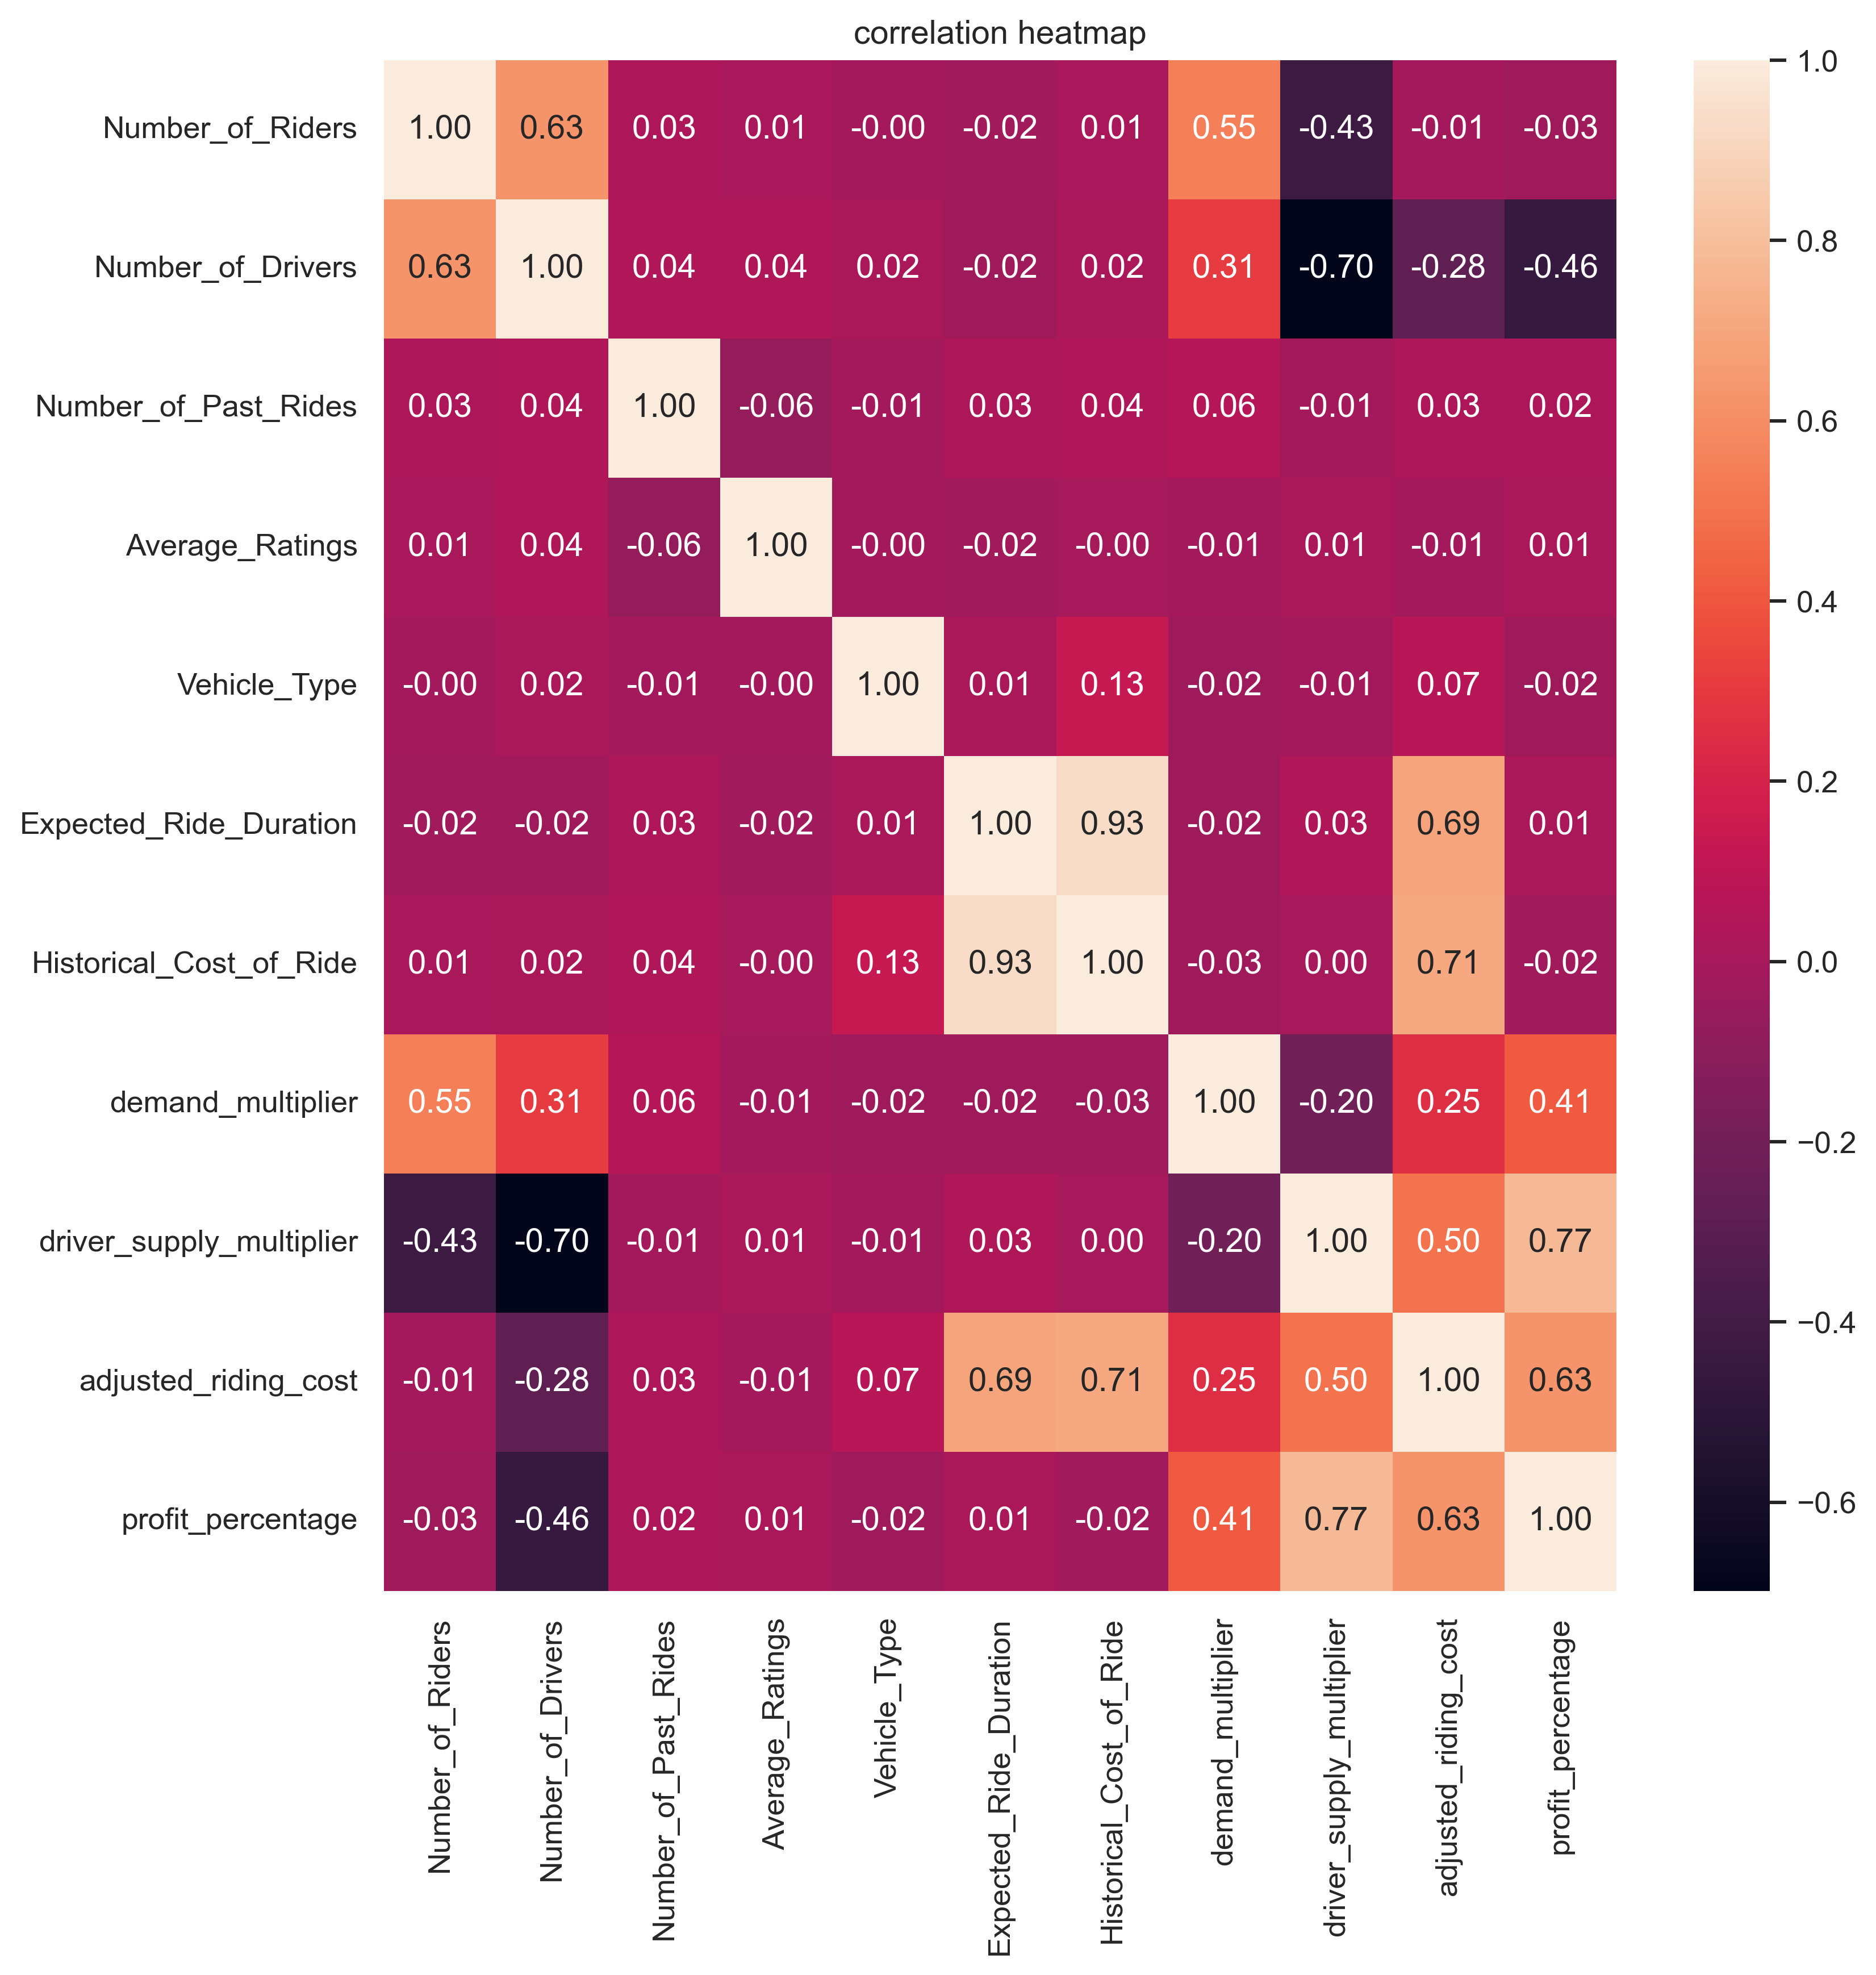

In [73]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True,fmt= ".2f")
plt.title('correlation heatmap')
plt.show()

In [48]:
x = np.array(df[["Number_of_Riders", "Number_of_Drivers", "Vehicle_Type", "Expected_Ride_Duration"]])
y = np.array(df[["adjusted_riding_cost"]])

**Considering both the correlation analysis and domain knowledge, we've selected the following features for further consideration: "Number_of_Riders," "Number_of_Drivers," "Vehicle_Type," and "Expected_Ride_Duration." Notably, we include "Vehicle_Type" as it holds significance in predicting ride prices, aligning with our understanding of its impact on the overall cost estimation for a given ride. These chosen features are expected to contribute meaningfully to our predictive modeling efforts.** 

**Data Splitting**

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
# Reshape y to 1D array
y_train = y_train.ravel()
y_test = y_test.ravel()

#### Feature Scaling

In [51]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Model building

#### Linear Regression

In [52]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [53]:
print('linear train score',lr_model.score(x_train,y_train))
print('linear test score',lr_model.score(x_test,y_test))

linear train score 0.586708947209335
linear test score 0.6445222159267361


#### Ridge Regression

In [54]:
# here we use aplha refers to lambda value
ridge_model = RidgeCV(alphas=(0.1,1,10),scoring='neg_mean_absolute_error')
ridge_model.fit(x_train,y_train)

RidgeCV(alphas=(0.1, 1, 10), scoring='neg_mean_absolute_error')

In [55]:
print('Ridgde train score',ridge_model.score(x_train,y_train))
print('Ridgde test score',ridge_model.score(x_test,y_test))

Ridgde train score 0.5865439773005847
Ridgde test score 0.6434490531186201


#### Lasso Regression

In [56]:
# here we use aplha refers to lambda value
lasso_model = LassoCV(eps = 0.01,n_alphas=100,cv = 10, max_iter=1000)
lasso_model.fit(x_train,y_train)

LassoCV(cv=10, eps=0.01)

In [57]:
print('lasso train score',lasso_model.score(x_train,y_train))
print('lasso test score',lasso_model.score(x_test,y_test))

lasso train score 0.5863673562121731
lasso test score 0.6428727542683745


**After checking the training and testing scores of linear, ridge, and lasso regression models, it's clear that these models aren't quite cutting it for our dataset. So, we're switching gears and giving the Random Forest Regressor a shot. Why? Well, this model is known for its versatility and knack for handling more complex relationships in the data**

#### Random forest Regressor

In [58]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [59]:
rf_pred =  model.predict(x_test)

In [60]:
# Checking for all Evaluation Metrics

MAE = mean_absolute_error(y_test,rf_pred)
MSE = mean_squared_error(y_test,rf_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, rf_pred)
print('Evaluation Metrics for Random Forest Regressor \n')
print ('Random Forest Regressor Mean Absolute Error: ',MAE)
print ('Random Forest Regressor Mean Squared Error: ',MSE)
print ('Random Forest Regressor root Mean squared Error: ',RMSE)
print('Ratundom Forest Regressor R squared: ',r2)

Evaluation Metrics for Random Forest Regressor 

Random Forest Regressor Mean Absolute Error:  109.16731925274878
Random Forest Regressor Mean Squared Error:  22017.45740256515
Random Forest Regressor root Mean squared Error:  148.38280696416666
Ratundom Forest Regressor R squared:  0.885527409872791


In [61]:
# checking for training accuracy

model.score(x_train,y_train)

0.9827657388878446

In [62]:
# checking for testing accuracy

model.score(x_test,y_test)

0.885527409872791

### Hyper Parameter Tuning for Random Forest Regressor model

In [63]:
help(RandomForestRegressor())

Help on RandomForestRegressor in module sklearn.ensemble._forest object:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators

In [64]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor()


In [65]:
#Initialize GridSearchCV

grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose = 2)

# Fit the model

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_d

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20, n_

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=15, n_

[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_e

[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators

[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=20, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=2, n_estimator

[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=15, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=20, n_

[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_sp

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0

[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV

[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[

[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=20, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=20, n_estimators=300; total tim

[CV] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=200; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=200; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=300; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=300; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=6, min_samples_split=15, n_estimators=300; total tim

[CV] END max_depth=5, min_samples_leaf=8, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=8, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=8, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=8, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=8, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=8, min_samples_split=10, n_estimators=300; total tim

[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total tim

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time= 

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total t

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=50; tota

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=15, n_estimators=100; tota

[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total t

[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=5, n_estimators=100; total time=   

[CV] END max_depth=10, min_samples_leaf=8, min_samples_split=20, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; tota

[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=10, min_samples_split=20, n_estimato

[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=15, n_estimators=200; 

[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200;

[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total tim

[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=2, n_estimators=300; total tim

[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=20, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=20, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=20, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=20, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=20, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=20, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=20, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=20, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=20, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=6, min_samples_split=20, n_estimators=300;

[CV] END max_depth=15, min_samples_leaf=8, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=8, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=8, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=8, min_samples_split=15, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=8, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=8, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=8, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=8, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=8, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=8, min_samples_split=20, n_estimators=50; 

[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=15, n_estima

[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total tim

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total tim

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=20, n_estimators=100; tota

[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_split=15, n_estimators=100; tota

[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total 

[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=100; tota

[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=20, n_estimators=300; total time=   0.4s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

**here we set verbose = 2 so that we can visualize all the interations of cross-validation, this is not a mandatory parameter, you can use if you are curious about it**

In [66]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [67]:
tuneed_rf = RandomForestRegressor( max_depth= 10, min_samples_leaf= 1, min_samples_split =  2, n_estimators = 300)
tuneed_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=300)

In [68]:
# checking for training accuracy

tuneed_rf.score(x_train,y_train)

0.9795993703012617

In [69]:
# checking for testing accuracy

tuneed_rf.score(x_test,y_test)

0.8851940729909282

In [70]:
tuned_rf_pred = tuneed_rf.predict(x_test)

In [71]:
# Checking for all Evaluation Metrics

MAE = mean_absolute_error(y_test,tuned_rf_pred)
MSE = mean_squared_error(y_test,tuned_rf_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, tuned_rf_pred)
print('Evaluation Metrics for tuned Random Forest Regressor \n')
print ('Tuned Random Forest Regressor Mean Absolute Error: ',MAE)
print ('Tuned Random Forest Regressor Mean Squared Error: ',MSE)
print ('Tuned Random Forest Regressor root Mean squared Error: ',RMSE)
print('Tuned Ratundom Forest Regressor R squared: ',r2)

Evaluation Metrics for tuned Random Forest Regressor 

Tuned Random Forest Regressor Mean Absolute Error:  109.00998862997461
Tuned Random Forest Regressor Mean Squared Error:  22081.570834339167
Tuned Random Forest Regressor root Mean squared Error:  148.5986905539183
Tuned Ratundom Forest Regressor R squared:  0.8851940729909282


**we explored linear regression, ridge regression, and lasso regression, only to find them falling short. Surprisingly, the default Random Forest Regressor outshone the rest, showcasing its inherent strength in handling the intricacies of our ride data. Even without hyperparameter tuning, the model delivered exceptional accuracy. Subsequent attempts to fine-tune parameters mirrored the default settings, reinforcing the robustness of the initial configuration. With a training score of 98%, testing score of 89& , R2 score of 88%,the model not only captures intricate patterns but also achieves an impressive level of precision. This underscores the Random Forest's prowess in optimizing our dynamic pricing strategy, providing a reliable and accurate solution for our evolving fare adjustments.**

# Final Conclusion

**In our quest for the perfect pricing model, we explored various regression techniques. Ultimately, the default Random Forest Regressor stood out as a star performer. This model showcased an innate ability to navigate the intricacies of our ride data, delivering outstanding accuracy even without hyperparameter tuning. The strength of the default configuration was further underscored by attempts at fine-tuning, which consistently mirrored the initial settings. With a high training score, testing score,R2 score and a mean absolute error, the Random Forest model not only adeptly captures complex patterns but also attains a commendable level of precision. This solidifies its position as a dependable solution for our dynamic pricing strategy, combining technical prowess with real-world**

**KEY FINDING**

**Adjusted Riding Costs Distribution**: Ranges from 250 to 800 with occasional spikes. Suggests potential outliers or specific influencing factors.

**Profitability Variability:** Profit percentages range from 25% to 150%. Rural and suburban locations prove more lucrative than urban areas.

**Loyalty Status Impact:** Silver status holders show slightly higher profits. Loyalty status influences profit percentages.

**Linear Relationships Insights:** Strong linear relationship between historical cost and ride duration. Moderate linear relationship between adjusted ride cost and expected duration.

**Customer Satisfaction Indicators:** Consistently high ratings across loyalty programs. Preference for premium vehicle types indicates customer satisfaction and preferences.

**suggestion for further improvement**

- Loss-Making Ride Analysis
- Cost Dynamics Exploration
- Customer Feedback Integration
- Feature Expansion